### Import necessary libraries

In [1]:
import pandas as pd
import numpy as np

import string
import spacy
from wordcloud import WordCloud, STOPWORDS

from matplotlib import pyplot as plt
from matplotlib.pyplot import imread
%matplotlib inline
import seaborn as sns

import nltk
from nltk import tokenize
from nltk.tokenize import word_tokenize

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer,WordNetLemmatizer
from nltk.corpus import wordnet as wn
from collections import defaultdict
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer


import warnings
warnings.filterwarnings('ignore')

### Import data

In [6]:
data = pd.read_csv("D:\\Downloads\\Amazon.csv")
data.head()

rating       date         variation  \
0       5  31-Jul-18  Charcoal Fabric    
1       5  31-Jul-18  Charcoal Fabric    
2       4  31-Jul-18    Walnut Finish    
3       5  31-Jul-18  Charcoal Fabric    
4       5  31-Jul-18  Charcoal Fabric    

                                    verified_reviews  feedback  
0                                      Love my Echo!         1  
1                                          Loved it!         1  
2  Sometimes while playing a game, you can answer...         1  
3  I have had a lot of fun with this thing. My 4 ...         1  
4                                              Music         1

In [7]:
data = data[['verified_reviews']]
data.head()

verified_reviews
0                                      Love my Echo!
1                                          Loved it!
2  Sometimes while playing a game, you can answer...
3  I have had a lot of fun with this thing. My 4 ...
4                                              Music

In [8]:
data=data.rename({'verified_reviews':'reviews'},axis=1)
data.head()

reviews
0                                      Love my Echo!
1                                          Loved it!
2  Sometimes while playing a game, you can answer...
3  I have had a lot of fun with this thing. My 4 ...
4                                              Music

In [9]:
data=[reviews.strip() for reviews in data.reviews] # remove both the leading and the trailing characters
data=[reviews for reviews in data if reviews] # removes empty strings, because they are considered in Python as False
data[0:10]

['Love my Echo!',
 'Loved it!',
 'Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home.',
 'I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well.',
 'Music',
 'I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do.',
 'Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.  She does not seem to be very smartbon politics yet.',
 "I think this is the 5th one I've

In [12]:
# Joining the list into one string/text
data1 = ' '.join(data)
data1

'Love my Echo! Loved it! Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home. I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well. Music I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do. Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.  She does not seem to be very smartbon politics yet. I think this is the 5th one I\'ve purchased. I\'m working on 

In [14]:
no_punc_text = data1.translate(str.maketrans('', '', string.punctuation)) 
#with arguments (x, y, z) where 'x' and 'y'
# must be equal-length strings and characters in 'x' are replaced by characters in 'y'. 
#'z' is a string (string.punctuation here)
no_punc_text

'Love my Echo Loved it Sometimes while playing a game you can answer a question correctly but Alexa says you got it wrong and answers the same as you  I like being able to turn lights on and off while away from home I have had a lot of fun with this thing My 4 yr old learns about dinosaurs i control the lights and play games like categories Has nice sound when playing music as well Music I received the echo as a gift I needed another Bluetooth or something to play music easily accessible and found this smart speaker Can’t wait to see what else it can do Without having a cellphone I cannot use many of her features I have an iPad but do not see that of any use  It IS a great alarm  If u r almost deaf you can hear her alarm in the bedroom from out in the living room so that is reason enough to keep herIt is fun to ask random questions to hear her response  She does not seem to be very smartbon politics yet I think this is the 5th one Ive purchased Im working on getting one in every room o

In [15]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\prajn\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [16]:
from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(no_punc_text)
print(text_tokens[0:50])

['Love', 'my', 'Echo', 'Loved', 'it', 'Sometimes', 'while', 'playing', 'a', 'game', 'you', 'can', 'answer', 'a', 'question', 'correctly', 'but', 'Alexa', 'says', 'you', 'got', 'it', 'wrong', 'and', 'answers', 'the', 'same', 'as', 'you', 'I', 'like', 'being', 'able', 'to', 'turn', 'lights', 'on', 'and', 'off', 'while', 'away', 'from', 'home', 'I', 'have', 'had', 'a', 'lot', 'of', 'fun']


In [17]:
len(text_tokens)

80526

In [18]:
#Normalize the data
lower_words = [x.lower() for x in text_tokens]
print(lower_words[0:25])

['love', 'my', 'echo', 'loved', 'it', 'sometimes', 'while', 'playing', 'a', 'game', 'you', 'can', 'answer', 'a', 'question', 'correctly', 'but', 'alexa', 'says', 'you', 'got', 'it', 'wrong', 'and', 'answers']


In [19]:
#Remove stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\prajn\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
my_stop_words = stopwords.words('english')
my_stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [21]:
my_stop_words.append('the')
no_stop_tokens = [word for word in lower_words if not word in my_stop_words]
print(no_stop_tokens[0:40])

['love', 'echo', 'loved', 'sometimes', 'playing', 'game', 'answer', 'question', 'correctly', 'alexa', 'says', 'got', 'wrong', 'answers', 'like', 'able', 'turn', 'lights', 'away', 'home', 'lot', 'fun', 'thing', '4', 'yr', 'old', 'learns', 'dinosaurs', 'control', 'lights', 'play', 'games', 'like', 'categories', 'nice', 'sound', 'playing', 'music', 'well', 'music']


In [23]:
len(no_stop_tokens)

40690

In [24]:
len(lower_words)

80526

In [26]:
#Stemming
ps = PorterStemmer()

In [27]:
stemmed_tokens = [ps.stem(word) for word in no_stop_tokens]
print(stemmed_tokens[0:40])

['love', 'echo', 'love', 'sometim', 'play', 'game', 'answer', 'question', 'correctli', 'alexa', 'say', 'got', 'wrong', 'answer', 'like', 'abl', 'turn', 'light', 'away', 'home', 'lot', 'fun', 'thing', '4', 'yr', 'old', 'learn', 'dinosaur', 'control', 'light', 'play', 'game', 'like', 'categori', 'nice', 'sound', 'play', 'music', 'well', 'music']


In [28]:
for w in no_stop_tokens:
    print(w, " : ", ps.stem(w))

love  :  love
echo  :  echo
loved  :  love
sometimes  :  sometim
playing  :  play
game  :  game
answer  :  answer
question  :  question
correctly  :  correctli
alexa  :  alexa
says  :  say
got  :  got
wrong  :  wrong
answers  :  answer
like  :  like
able  :  abl
turn  :  turn
lights  :  light
away  :  away
home  :  home
lot  :  lot
fun  :  fun
thing  :  thing
4  :  4
yr  :  yr
old  :  old
learns  :  learn
dinosaurs  :  dinosaur
control  :  control
lights  :  light
play  :  play
games  :  game
like  :  like
categories  :  categori
nice  :  nice
sound  :  sound
playing  :  play
music  :  music
well  :  well
music  :  music
received  :  receiv
echo  :  echo
gift  :  gift
needed  :  need
another  :  anoth
bluetooth  :  bluetooth
something  :  someth
play  :  play
music  :  music
easily  :  easili
accessible  :  access
found  :  found
smart  :  smart
speaker  :  speaker
’  :  ’
wait  :  wait
see  :  see
else  :  els
without  :  without
cellphone  :  cellphon
use  :  use
many  :  mani
featur

learning  :  learn
features  :  featur
available  :  avail
really  :  realli
know  :  know
could  :  could
use  :  use
device  :  devic
used  :  use
things  :  thing
need  :  need
overview  :  overview
love  :  love
wish  :  wish
built  :  built
hub  :  hub
use  :  use
primarily  :  primarili
play  :  play
music  :  music
works  :  work
wonderfully  :  wonder
still  :  still
getting  :  get
used  :  use
many  :  mani
things  :  thing
amazon  :  amazon
sent  :  sent
several  :  sever
tips  :  tip
since  :  sinc
got  :  got
thanks  :  thank
help  :  help
easy  :  easi
set  :  set
fast  :  fast
response  :  respons
amazing  :  amaz
clear  :  clear
concise  :  concis
answers  :  answer
sound  :  sound
quality  :  qualiti
fantastic  :  fantast
still  :  still
getting  :  get
used  :  use
alexia  :  alexia
usde  :  usd
echo  :  echo
full  :  full
extent  :  extent
’  :  ’
needna  :  needna
na  :  na
nana  :  nana
everything  :  everyth
expected  :  expect
love  :  love
echo  :  echo
works  :

day  :  day
far  :  far
im  :  im
happy  :  happi
seems  :  seem
improved  :  improv
speaker  :  speaker
provides  :  provid
enhanced  :  enhanc
sound  :  sound
music  :  music
love  :  love
echo  :  echo
smart  :  smart
speaker  :  speaker
love  :  love
volume  :  volum
clarity  :  clariti
easy  :  easi
set  :  set
wonderful  :  wonder
gift  :  gift
age  :  age
wonderful  :  wonder
product  :  product
fast  :  fast
delivery  :  deliveri
initially  :  initi
harder  :  harder
set  :  set
called  :  call
tech  :  tech
’  :  ’
knowledgeable  :  knowledg
working  :  work
great  :  great
easy  :  easi
set  :  set
family  :  famili
love  :  love
’  :  ’
great  :  great
sound  :  sound
responsive  :  respons
voice  :  voic
commands  :  command
live  :  live
long  :  long
without  :  without
echo  :  echo
get  :  get
enjoy  :  enjoy
music  :  music
style  :  style
asking  :  ask
alexa  :  alexa
going  :  go
upgreade  :  upgread
wireless  :  wireless
love  :  love
echo  :  echo
love  :  love
al

speakers  :  speaker
high  :  high
quality  :  qualiti
expected  :  expect
great  :  great
investment  :  invest
alexa  :  alexa
helped  :  help
made  :  made
laugh  :  laugh
yet  :  yet
another  :  anoth
exho  :  exho
home  :  home
love  :  love
love  :  love
plan  :  plan
gender  :  gender
music  :  music
big  :  big
band  :  band
jazz  :  jazz
easy  :  easi
find  :  find
local  :  local
radio  :  radio
sound  :  sound
good  :  good
stop  :  stop
voice  :  voic
command  :  command
get  :  get
phone  :  phone
call  :  call
good  :  good
value  :  valu
super  :  super
easy  :  easi
set  :  set
loving  :  love
new  :  new
echo  :  echo
whats  :  what
like  :  like
speaker  :  speaker
ask  :  ask
alexa  :  alexa
best  :  best
fathers  :  father
day  :  day
gift  :  gift
dad  :  dad
joked  :  joke
mom  :  mom
alexa  :  alexa
one  :  one
listening  :  listen
repeated  :  repeat
stories  :  stori
going  :  go
forward  :  forward
great  :  great
addition  :  addit
breakfast  :  breakfast
roo

use  :  use
house  :  hous
like  :  like
third  :  third
echo  :  echo
worth  :  worth
every  :  everi
penny  :  penni
like  :  like
3  :  3
household  :  household
employees  :  employe
small  :  small
flat  :  flat
rate  :  rate
keep  :  keep
bedrooms  :  bedroom
living  :  live
room  :  room
dropin  :  dropin
use  :  use
intercom  :  intercom
listen  :  listen
music  :  music
answer  :  answer
quick  :  quick
questions  :  question
alarms  :  alarm
wake  :  wake
school  :  school
etc  :  etc
listen  :  listen
music  :  music
set  :  set
timer  :  timer
received  :  receiv
echo  :  echo
perfect  :  perfect
condition  :  condit
device  :  devic
easy  :  easi
set  :  set
responds  :  respond
quickly  :  quickli
without  :  without
issues  :  issu
alexa  :  alexa
great  :  great
addition  :  addit
family  :  famili
good  :  good
sound  :  sound
like  :  like
music  :  music
scheduling  :  schedul
like  :  like
get  :  get
random  :  random
thoughts  :  thought
recorded  :  record
think 

sound  :  sound
echo  :  echo
’  :  ’
definitely  :  definit
comparable  :  compar
bose  :  bose
mini  :  mini
gave  :  gave
4  :  4
stars  :  star
’  :  ’
use  :  use
apple  :  appl
music  :  music
account  :  account
technology  :  technolog
small  :  small
device  :  devic
price  :  price
good  :  good
sound  :  sound
amazing  :  amaz
must  :  must
feature  :  featur
home  :  home
mainly  :  mainli
use  :  use
music  :  music
’  :  ’
learning  :  learn
time  :  time
really  :  realli
nothing  :  noth
bad  :  bad
say  :  say
replaced  :  replac
1st  :  1st
gen  :  gen
concerned  :  concern
smaller  :  smaller
unit  :  unit
soundi  :  soundi
wrong  :  wrong
anything  :  anyth
volume  :  volum
clear  :  clear
good  :  good
product  :  product
great  :  great
addition  :  addit
echo  :  echo
plus  :  plu
best  :  best
love  :  love
feature  :  featur
play  :  play
music  :  music
every  :  everi
room  :  room
multiple  :  multipl
echos  :  echo
love  :  love
alexa  :  alexa
surprised  :

one  :  one
package  :  packag
want  :  want
refunds  :  refund
package  :  packag
see  :  see
working  :  work
weird  :  weird
pauses  :  paus
speech  :  speech
pattern  :  pattern
present  :  present
echo  :  echo
devices  :  devic
sure  :  sure
love  :  love
alexa  :  alexa
lol  :  lol
thank  :  thank
great  :  great
price  :  price
product  :  product
works  :  work
im  :  im
echo  :  echo
fan  :  fan
one  :  one
work  :  work
bought  :  bought
bathroom  :  bathroom
listen  :  listen
im  :  im
shower  :  shower
love  :  love
doesnt  :  doesnt
always  :  alway
respond  :  respond
spoken  :  spoken
promp  :  promp
word  :  word
thought  :  thought
would  :  would
connect  :  connect
echo  :  echo
upstairs  :  upstair
use  :  use
like  :  like
intercom  :  intercom
havent  :  havent
able  :  abl
fast  :  fast
shipping  :  ship
works  :  work
well  :  well
love  :  love
love  :  love
love  :  love
love  :  love
new  :  new
free  :  free
assistant  :  assist
six  :  six
words  :  word
3

works  :  work
great  :  great
34never  :  34never
buy  :  buy
certified  :  certifi
refurbished  :  refurbish
echo  :  echo
dot  :  dot
34  :  34
bought  :  bought
34certified  :  34certifi
refurbished  :  refurbish
34  :  34
echo  :  echo
dot  :  dot
unit  :  unit
poor  :  poor
receiving  :  receiv
command  :  command
sometimes  :  sometim
even  :  even
acknowledge  :  acknowledg
command  :  command
never  :  never
buy  :  buy
refurbished  :  refurbish
echo  :  echo
dot  :  dot
unit  :  unit
received  :  receiv
probably  :  probabl
never  :  never
certified  :  certifi
refurbished  :  refurbish
indicated  :  indic
also  :  also
bought  :  bought
new  :  new
echo  :  echo
dot  :  dot
works  :  work
perfectlyvery  :  perfectlyveri
disappointed  :  disappoint
started  :  start
amazon  :  amazon
productsand  :  productsand
regret  :  regret
nothing  :  noth
absolutely  :  absolut
great  :  great
journey  :  journey
products  :  product
continue  :  continu
improve  :  improv
daytoday  : 

love  :  love
two  :  two
echo  :  echo
dots  :  dot
third  :  third
one  :  one
ordered  :  order
give  :  give
gift  :  gift
defective  :  defect
speaker  :  speaker
return  :  return
process  :  process
still  :  still
isnt  :  isnt
done  :  done
already  :  alreadi
taken  :  taken
weeks  :  week
ive  :  ive
already  :  alreadi
returned  :  return
refurbished  :  refurbish
echo  :  echo
wonderful  :  wonder
purchased  :  purchas
mother  :  mother
loves  :  love
ability  :  abil
contact  :  contact
without  :  without
phone  :  phone
listen  :  listen
music  :  music
weather  :  weather
ask  :  ask
questions  :  question
wonderful  :  wonder
gift  :  gift
works  :  work
excellently  :  excel
problems  :  problem
works  :  work
good  :  good
however  :  howev
price  :  price
went  :  went
week  :  week
purchased  :  purchas
works  :  work
amazingly  :  amazingli
bought  :  bought
daughter  :  daughter
loves  :  love
love  :  love
alexa  :  alexa
great  :  great
helping  :  help
making

wifi  :  wifi
range  :  rang
randomly  :  randomli
disconnects  :  disconnect
even  :  even
though  :  though
app  :  app
shows  :  show
range  :  rang
5ghz  :  5ghz
connection  :  connect
strong  :  strong
reconnecting  :  reconnect
pain  :  pain
time  :  time
wellall  :  wellal
said  :  said
alexa  :  alexa
works  :  work
works  :  work
amazingly  :  amazingli
well  :  well
’  :  ’
speaker  :  speaker
hooked  :  hook
one  :  one
thing  :  thing
really  :  realli
enjoy  :  enjoy
mic  :  mic
’  :  ’
range  :  rang
sensitivity  :  sensit
one  :  one
annoying  :  annoy
limitations  :  limit
apple  :  appl
’  :  ’
siri  :  siri
’  :  ’
playing  :  play
audio  :  audio
device  :  devic
speakers  :  speaker
music  :  music
podcasts  :  podcast
etc  :  etc
“  :  “
hey  :  hey
siri  :  siri
”  :  ”
feature  :  featur
useless  :  useless
alexa  :  alexa
problem  :  problem
hearing  :  hear
whatever  :  whatev
playing  :  play
time  :  time
amazingly  :  amazingli
fast  :  fast
responsiveness  

play  :  play
music  :  music
ask  :  ask
questions  :  question
entertained  :  entertain
hours  :  hour
good  :  good
buy  :  buy
honest  :  honest
opinion  :  opinion
issuesworks  :  issueswork
looks  :  look
great  :  great
fun  :  fun
toy  :  toy
daughter  :  daughter
reads  :  read
refurbish  :  refurbish
echo  :  echo
dot  :  dot
received  :  receiv
new  :  new
condition  :  condit
new  :  new
packaging  :  packag
complaints  :  complaint
neat  :  neat
little  :  littl
gadgetdrives  :  gadgetdr
wife  :  wife
nuts  :  nut
received  :  receiv
echo  :  echo
gift  :  gift
loved  :  love
much  :  much
decided  :  decid
get  :  get
dot  :  dot
bedroom  :  bedroom
easy  :  easi
set  :  set
big  :  big
difference  :  differ
sound  :  sound
quality  :  qualiti
would  :  would
still  :  still
buy  :  buy
worked  :  work
advertised  :  advertis
thanks  :  thank
new  :  new
amazon  :  amazon
products  :  product
great  :  great
everything  :  everyth
bought  :  bought
refurbished  :  refurb

way  :  way
get  :  get
work  :  work
app  :  app
sure  :  sure
dot  :  dot
way  :  way
bought  :  bought
go  :  go
nieces  :  niec
room  :  room
cant  :  cant
tell  :  tell
refurbished  :  refurbish
looks  :  look
good  :  good
works  :  work
like  :  like
new  :  new
device  :  devic
working  :  work
followed  :  follow
instructions  :  instruct
alexa  :  alexa
echo  :  echo
dot  :  dot
come  :  come
upsetting  :  upset
sent  :  sent
back  :  back
due  :  due
crackling  :  crackl
noise  :  nois
turning  :  turn
expect  :  expect
refurbished  :  refurbish
item  :  item
best  :  best
price  :  price
could  :  could
find  :  find
useful  :  use
around  :  around
answer  :  answer
questions  :  question
handy  :  handi
find  :  find
phone  :  phone
also  :  also
intercom  :  intercom
system  :  system
never  :  never
satisfied  :  satisfi
product  :  product
perfect  :  perfect
introduction  :  introduct
alexa  :  alexa
works  :  work
well  :  well
speaker  :  speaker
grand  :  grand
get

havent  :  havent
go  :  go
one  :  one
definitely  :  definit
try  :  tri
itwhat  :  itwhat
like  :  like
best  :  best
number  :  number
devices  :  devic
connect  :  connect
purchase  :  purchas
came  :  came
smart  :  smart
plug  :  plug
10  :  10
connect  :  connect
lamp  :  lamp
alexa  :  alexa
turn  :  turn
lights  :  light
husband  :  husband
likes  :  like
able  :  abl
use  :  use
listen  :  listen
music  :  music
wish  :  wish
knew  :  knew
capabilities  :  capabl
android  :  android
would  :  would
allow  :  allow
alexa  :  alexa
connect  :  connect
fortunately  :  fortun
sister  :  sister
apple  :  appl
cell  :  cell
hour  :  hour
tech  :  tech
support  :  support
fixed  :  fix
glitches  :  glitch
running  :  run
far  :  far
good  :  good
tried  :  tri
play  :  play
certain  :  certain
broadway  :  broadway
shows  :  show
like  :  like
camelot  :  camelot
gives  :  give
ne  :  ne
group  :  group
camelot  :  camelot
great  :  great
satisfied  :  satisfi
echo  :  echo
alexa  

props  :  prop
amazon  :  amazon
’  :  ’
still  :  still
great  :  great
productbut  :  productbut
sound  :  sound
quality  :  qualiti
seem  :  seem
worsedon  :  worsedon
’  :  ’
get  :  get
wrong  :  wrong
definitely  :  definit
get  :  get
used  :  use
within  :  within
hour  :  hour
definitely  :  definit
feels  :  feel
like  :  like
echo  :  echo
gen  :  gen
1  :  1
sound  :  sound
quality  :  qualiti
betterbesides  :  betterbesid
’  :  ’
greatwith  :  greatwith
addition  :  addit
able  :  abl
play  :  play
bluetooth  :  bluetooth
wifi  :  wifi
’  :  ’
even  :  even
better  :  better
outlet  :  outlet
work  :  work
disappointed  :  disappoint
great  :  great
device  :  devic
responsive  :  respons
helpful  :  help
sound  :  sound
terrible  :  terribl
u  :  u
want  :  want
good  :  good
music  :  music
get  :  get
bose  :  bose
liked  :  like
sound  :  sound
troubling  :  troubl
paid  :  paid
extra  :  extra
money  :  money
access  :  access
million  :  million
songs  :  song
someti

setup  :  setup
app  :  app
define  :  defin
example  :  exampl
music  :  music
like  :  like
well  :  well
integrated  :  integr
echo  :  echo
tried  :  tri
ask  :  ask
playlist  :  playlist
echo  :  echo
sure  :  sure
even  :  even
though  :  though
set  :  set
play  :  play
list  :  list
settings  :  set
also  :  also
like  :  like
fact  :  fact
words  :  word
exact  :  exact
match  :  match
playlist  :  playlist
names  :  name
never  :  never
rememberi  :  rememberi
like  :  like
ready  :  readi
nature  :  natur
echo  :  echo
respond  :  respond
queries  :  queri
great  :  great
item  :  item
added  :  ad
audible  :  audibl
books  :  book
makes  :  make
even  :  even
better  :  better
thank  :  thank
prime  :  prime
day  :  day
2nd  :  2nd
gen  :  gen
echo  :  echo
sale  :  sale
couldnt  :  couldnt
resist  :  resist
beginning  :  begin
smart  :  smart
home  :  home
set  :  set
couldnt  :  couldnt
happier  :  happier
say  :  say
alexa  :  alexa
done  :  done
amazing  :  amaz
job  : 

advertised  :  advertis
love  :  love
love  :  love
new  :  new
addition  :  addit
house  :  hous
speaker  :  speaker
quality  :  qualiti
great  :  great
love  :  love
alexa  :  alexa
two  :  two
complaints  :  complaint
suggestions  :  suggest
future  :  futur
series  :  seri
would  :  would
better  :  better
communication  :  commun
ability  :  abil
example  :  exampl
smart  :  smart
lights  :  light
house  :  hous
unless  :  unless
specify  :  specifi
kitchen  :  kitchen
light  :  light
1  :  1
kitchen  :  kitchen
light  :  light
2  :  2
prior  :  prior
command  :  command
either  :  either
’  :  ’
respond  :  respond
says  :  say
’  :  ’
recognize  :  recogn
may  :  may
want  :  want
alexa  :  alexa
respond  :  respond
say  :  say
thank  :  thank
afterwards  :  afterward
repeat  :  repeat
alexa  :  alexa
thank  :  thank
times  :  time
’  :  ’
respond  :  respond
husband  :  husband
know  :  know
sounds  :  sound
odd  :  odd
laugh  :  laugh
maybe  :  mayb
’  :  ’
southern  :  southe

decide  :  decid
would  :  would
try  :  tri
echo  :  echo
serve  :  serv
primarily  :  primarili
music  :  music
source  :  sourc
wow  :  wow
amazed  :  amaz
great  :  great
sound  :  sound
weve  :  weve
also  :  also
great  :  great
time  :  time
listening  :  listen
favorite  :  favorit
songs  :  song
buy  :  buy
asking  :  ask
alexa  :  alexa
may  :  may
even  :  even
buy  :  buy
one  :  one
elderly  :  elderli
dad  :  dad
think  :  think
enjoy  :  enjoy
one  :  one
listen  :  listen
music  :  music
even  :  even
place  :  place
calls  :  call
us  :  us
really  :  realli
enjoyed  :  enjoy
changing  :  chang
directv  :  directv
channels  :  channel
plays  :  play
iheartradio  :  iheartradio
pandora  :  pandora
adjusts  :  adjust
ac  :  ac
thermostat  :  thermostat
turns  :  turn
living  :  live
room  :  room
lights  :  light
outside  :  outsid
lights  :  light
wanting  :  want
one  :  one
bought  :  bought
prime  :  prime
day  :  day
absolutely  :  absolut
love  :  love
glad  :  gla

hear  :  hear
upstairs  :  upstair
great  :  great
product  :  product
set  :  set
easy  :  easi
sound  :  sound
wonderful  :  wonder
far  :  far
like  :  like
bought  :  bought
music  :  music
though  :  though
sounds  :  sound
pretty  :  pretti
good  :  good
love  :  love
love  :  love
glad  :  glad
bought  :  bought
like  :  like
types  :  type
funmusic  :  funmus
like  :  like
volume  :  volum
top  :  top
turn  :  turn
quickly  :  quickli
beyond  :  beyond
capabilities  :  capabl
program  :  program
grandkids  :  grandkid
lve  :  lve
love  :  love
new  :  new
echo  :  echo
gives  :  give
hours  :  hour
music  :  music
help  :  help
thingsit  :  thingsit
difficult  :  difficult
set  :  set
help  :  help
tekkie  :  tekki
almost  :  almost
good  :  good
bose  :  bose
love  :  love
whole  :  whole
house  :  hous
music  :  music
alexa  :  alexa
hardly  :  hardli
came  :  came
easy  :  easi
setup  :  setup
using  :  use
app  :  app
also  :  also
easy  :  easi
install  :  instal
phone  : 

gets  :  get
better  :  better
future  :  futur
along  :  along
added  :  ad
functions  :  function
love  :  love
easy  :  easi
use  :  use
put  :  put
night  :  night
stand  :  stand
use  :  use
clock  :  clock
alarm  :  alarm
works  :  work
great  :  great
every  :  everi
morning  :  morn
get  :  get
weather  :  weather
news  :  news
get  :  get
also  :  also
reminds  :  remind
appointments  :  appoint
wife  :  wife
love  :  love
part  :  part
fault  :  fault
thought  :  thought
could  :  could
wireless  :  wireless
though  :  though
price  :  price
still  :  still
feel  :  feel
like  :  like
also  :  also
sound  :  sound
quality  :  qualiti
volume  :  volum
could  :  could
better  :  better
prefer  :  prefer
tap  :  tap
unless  :  unless
really  :  realli
want  :  want
call  :  call
options  :  option
today  :  today
us  :  us
phones  :  phone
computers  :  comput
ipads  :  ipad
worth  :  worth
easy  :  easi
use  :  use
much  :  much
quicker  :  quicker
looking  :  look
everything  

three  :  three
year  :  year
old  :  old
even  :  even
gets  :  get
involved  :  involv
returnef  :  returnef
item  :  item
speak  :  speak
spanish  :  spanish
hardcore  :  hardcor
fan  :  fan
echo  :  echo
infact  :  infact
love  :  love
members  :  member
alexa  :  alexa
family  :  famili
echo  :  echo
echo  :  echo
dot  :  dot
echo  :  echo
plus  :  plu
new  :  new
toddler  :  toddler
echo  :  echo
spot  :  spot
every  :  everi
variant  :  variant
beauty  :  beauti
love  :  love
feel  :  feel
size  :  size
echo  :  echo
spot  :  spot
’  :  ’
fabulous  :  fabul
far  :  far
looks  :  look
concerned  :  concern
great  :  great
audio  :  audio
quality  :  qualiti
expect  :  expect
time  :  time
placing  :  place
order  :  order
compact  :  compact
small  :  small
size  :  size
bought  :  bought
connect  :  connect
bose  :  bose
soundtouch  :  soundtouch
love  :  love
love  :  love
able  :  abl
alexa  :  alexa
sing  :  sing
careless  :  careless
whisper  :  whisper
ear  :  ear
wake  :  

timer  :  timer
go  :  go
like  :  like
tv  :  tv
hcfe  :  hcfe
sleep  :  sleep
mode  :  mode
love  :  love
glad  :  glad
purchased  :  purchas
wanted  :  want
see  :  see
security  :  secur
video  :  video
cameras  :  camera
without  :  without
use  :  use
phone  :  phone
works  :  work
great  :  great
extremely  :  extrem
easy  :  easi
set  :  set
echo  :  echo
spot  :  spot
great  :  great
bot  :  bot
2  :  2
prime  :  prime
day  :  day
one  :  one
use  :  use
clockradio  :  clockradio
bedroom  :  bedroom
one  :  one
family  :  famili
room  :  room
control  :  control
lights  :  light
watch  :  watch
front  :  front
door  :  door
doorbell  :  doorbel
rings  :  ring
music  :  music
sound  :  sound
good  :  good
good  :  good
echo  :  echo
way  :  way
better  :  better
dots  :  dot
could  :  could
buy  :  buy
1  :  1
amazon  :  amazon
device  :  devic
would  :  would
spot  :  spot
bought  :  bought
two  :  two
one  :  one
office  :  offic
one  :  one
bedside  :  bedsid
table  :  tabl


fan  :  fan
lights  :  light
leaving  :  leav
fan  :  fan
running  :  run
gripe  :  gripe
would  :  would
mic  :  mic
sensitivity  :  sensit
doesnt  :  doesnt
appear  :  appear
good  :  good
view  :  view
gen2  :  gen2
get  :  get
little  :  littl
frustrating  :  frustrat
repeat  :  repeat
product  :  product
made  :  made
life  :  life
much  :  much
simpler  :  simpler
little  :  littl
one  :  one
use  :  use
lot  :  lot
music  :  music
hands  :  hand
full  :  full
turning  :  turn
onoff  :  onoff
updown  :  updown
breeze  :  breez
screen  :  screen
great  :  great
novelty  :  novelti
watch  :  watch
news  :  news
works  :  work
well  :  well
easy  :  easi
set  :  set
love  :  love
spot  :  spot
acts  :  act
new  :  new
alarm  :  alarm
one  :  one
favorite  :  favorit
amazon  :  amazon
devices  :  devic
one  :  one
bedroom  :  bedroom
use  :  use
alarm  :  alarm
clock  :  clock
perfect  :  perfect
addition  :  addit
home  :  home
alexa  :  alexa
devices  :  devic
wasnt  :  wasnt
sure 

question  :  question
either  :  either
doesnt  :  doesnt
know  :  know
answer  :  answer
gives  :  give
wrong  :  wrong
answer  :  answer
finds  :  find
information  :  inform
wikipedia  :  wikipedia
honestly  :  honestli
different  :  differ
echo  :  echo
dots  :  dot
already  :  alreadi
occasionally  :  occasion
seeing  :  see
lyrics  :  lyric
song  :  song
im  :  im
listening  :  listen
really  :  realli
dont  :  dont
see  :  see
difference  :  differ
got  :  got
husband  :  husband
prime  :  prime
day  :  day
loves  :  love
alarm  :  alarm
clock  :  clock
smart  :  smart
device  :  devic
3rd  :  3rd
echo  :  echo
device  :  devic
connected  :  connect
throughout  :  throughout
house  :  hous
although  :  although
deactivate  :  deactiv
camera  :  camera
also  :  also
chose  :  chose
cover  :  cover
since  :  sinc
device  :  devic
bedroom  :  bedroom
im  :  im
comfortable  :  comfort
camera  :  camera
room  :  room
dont  :  dont
bring  :  bring
cell  :  cell
phones  :  phone
room  

best  :  best
thing  :  thing
since  :  sinc
sliced  :  slice
bread  :  bread
’  :  ’
used  :  use
baby  :  babi
monitor  :  monitor
purchased  :  purchas
’  :  ’
realize  :  realiz
read  :  read
reviews  :  review
alexa  :  alexa
skill  :  skill
syncing  :  sync
nest  :  nest
cam  :  cam
considering  :  consid
poor  :  poor
reviews  :  review
fact  :  fact
simple  :  simpl
fix  :  fix
surprised  :  surpris
amazon  :  amazon
’  :  ’
upgraded  :  upgrad
software  :  softwar
allow  :  allow
39  :  39
minutes  :  minut
viewing  :  view
alerts  :  alert
like  :  like
get  :  get
nest  :  nest
app  :  app
would  :  would
5  :  5
stars  :  star
could  :  could
turn  :  turn
34things  :  34thing
try34  :  try34
screen  :  screen
read  :  read
buying  :  buy
spot  :  spot
amazon  :  amazon
please  :  pleas
update  :  updat
enable  :  enabl
us  :  us
turn  :  turn
extremely  :  extrem
annoying  :  annoy
look  :  look
see  :  see
time  :  time
instead  :  instead
see  :  see
34things  :  34thing

two  :  two
issues  :  issu
one  :  one
minor  :  minor
one  :  one
majorthe  :  majorth
minor  :  minor
one  :  one
include  :  includ
huge  :  huge
bezel  :  bezel
front  :  front
take  :  take
space  :  space
make  :  make
display  :  display
larger  :  larger
total  :  total
waste  :  wast
usable  :  usabl
spacethe  :  spaceth
major  :  major
one  :  one
also  :  also
involves  :  involv
show  :  show
im  :  im
used  :  use
devices  :  devic
dont  :  dont
need  :  need
see  :  see
34things  :  34thing
try34  :  try34
whenever  :  whenev
use  :  use
voice  :  voic
command  :  command
even  :  even
setting  :  set
rotate  :  rotat
starts  :  start
crap  :  crap
dare  :  dare
actually  :  actual
use  :  use
devices  :  devic
im  :  im
child  :  child
dont  :  dont
need  :  need
told  :  told
hundred  :  hundr
times  :  time
play  :  play
music  :  music
nightstand  :  nightstand
seeing  :  see
highly  :  highli
annoying  :  annoy
tips  :  tip
outrageous  :  outrag
unit  :  unit
meant 

nicely  :  nice
constructed  :  construct
wife  :  wife
wanted  :  want
second  :  second
kitchen  :  kitchen
order  :  order
second  :  second
one  :  one
love  :  love
little  :  littl
gadget  :  gadget
replaces  :  replac
old  :  old
clock  :  clock
basically  :  basic
love  :  love
listen  :  listen
music  :  music
morning  :  morn
get  :  get
weather  :  weather
updates  :  updat
news  :  news
briefs  :  brief
lets  :  let
know  :  know
amazon  :  amazon
order  :  order
arriving  :  arriv
delivered  :  deliv
etc  :  etc
yes  :  ye
little  :  littl
pricey  :  pricey
purchased  :  purchas
amazon  :  amazon
prime  :  prime
prime  :  prime
day  :  day
delivered  :  deliv
day  :  day
99  :  99
httpswwwamazoncomdpb073sqyxtwrefcmcrrypprdttlsol18  :  httpswwwamazoncomdpb073sqyxtwrefcmcrrypprdttlsol18
love  :  love
little  :  littl
echo  :  echo
spot  :  spot
replaced  :  replac
older  :  older
full  :  full
size  :  size
echo  :  echo
little  :  littl
guy  :  guy
round  :  round
screen  :

alexa  :  alexa
repeat  :  repeat
“  :  “
ok  :  ok
alarm  :  alarm
set  :  set
5am  :  5am
”  :  ”
good  :  good
suppose  :  suppos
could  :  could
whisper  :  whisper
fumble  :  fumbl
volume  :  volum
button  :  button
stupid  :  stupid
plain  :  plain
simple  :  simpl
device  :  devic
needs  :  need
brought  :  brought
1990  :  1990
’  :  ’
simple  :  simpl
touch  :  touch
screen  :  screen
interface  :  interfac
added  :  ad
set  :  set
alarm  :  alarm
know  :  know
cumbersome  :  cumbersom
interface  :  interfac
situations  :  situat
one  :  one
set  :  set
alarm  :  alarm
alexa  :  alexa
app  :  app
phone  :  phone
thanks  :  thank
’  :  ’
picking  :  pick
phone  :  phone
set  :  set
alarm  :  alarm
use  :  use
built  :  built
alarm  :  alarm
save  :  save
step  :  step
least  :  least
engineers  :  engin
allow  :  allow
alarm  :  alarm
turned  :  turn
touch  :  touch
screen  :  screen
example  :  exampl
wake  :  wake
minutes  :  minut
early  :  earli
cancel  :  cancel
alarm  :  

would  :  would
facetime  :  facetim
skype  :  skype
cycle  :  cycl
pictures  :  pictur
put  :  put
slideshow  :  slideshow
mode  :  mode
sticks  :  stick
first  :  first
photo  :  photo
leave  :  leav
matter  :  matter
even  :  even
looked  :  look
online  :  onlin
research  :  research
articles  :  articl
find  :  find
solution  :  solut
also  :  also
problems  :  problem
device  :  devic
shutting  :  shut
problems  :  problem
echo  :  echo
devices  :  devic
price  :  price
difference  :  differ
worth  :  worth
tube  :  tube
wouldnt  :  wouldnt
bought  :  bought
known  :  known
second  :  second
echo  :  echo
show  :  show
home  :  home
mexico  :  mexico
one  :  one
usa  :  usa
one  :  one
us  :  us
home  :  home
easily  :  easili
stay  :  stay
touch  :  touch
see  :  see
also  :  also
drop  :  drop
houses  :  hous
’  :  ’
check  :  check
use  :  use
turn  :  turn
lights  :  light
security  :  secur
systems  :  system
homes  :  home
also  :  also
echo  :  echo
dots  :  dot
various  :

middle  :  middl
night  :  night
payed  :  pay
full  :  full
price  :  price
would  :  would
returned  :  return
features  :  featur
nice  :  nice
may  :  may
never  :  never
use  :  use
held  :  held
purchasing  :  purchas
echo  :  echo
couldnt  :  couldnt
resist  :  resist
prime  :  prime
days  :  day
echo  :  echo
works  :  work
great  :  great
nice  :  nice
screen  :  screen
still  :  still
lot  :  lot
need  :  need
learn  :  learn
love  :  love
much  :  much
still  :  still
learning  :  learn
everything  :  everyth
echo  :  echo
really  :  realli
enjoying  :  enjoy
whole  :  whole
process  :  process
love  :  love
still  :  still
learning  :  learn
possibilities  :  possibl
love  :  love
echo  :  echo
show  :  show
awesome  :  awesom
speakers  :  speaker
love  :  love
fact  :  fact
listen  :  listen
music  :  music
words  :  word
come  :  come
around  :  around
liking  :  like
far  :  far
also  :  also
able  :  abl
read  :  read
whats  :  what
shopping  :  shop
list  :  list
list 

love  :  love
echo  :  echo
show  :  show
great  :  great
sound  :  sound
picture  :  pictur
great  :  great
job  :  job
thing  :  thing
entire  :  entir
echo  :  echo
collection  :  collect
’  :  ’
change  :  chang
voice  :  voic
echo  :  echo
everything  :  everyth
could  :  could
ask  :  ask
great  :  great
product  :  product
like  :  like
clear  :  clear
screen  :  screen
hi  :  hi
resolution  :  resolut
easy  :  easi
use  :  use
everything  :  everyth
hoped  :  hope
love  :  love
echo  :  echo
show  :  show
’  :  ’
going  :  go
live  :  live
campus  :  campu
school  :  school
fall  :  fall
got  :  got
two  :  two
serve  :  serv
easy  :  easi
way  :  way
connect  :  connect
people  :  peopl
might  :  might
like  :  like
camera  :  camera
makes  :  make
little  :  littl
sense  :  sens
carry  :  carri
devices  :  devic
cameras  :  camera
time  :  time
difference  :  differ
item  :  item
stationary  :  stationari
family  :  famili
also  :  also
find  :  find
dropin  :  dropin
feature

problem  :  problem
neither  :  neither
amazon  :  amazon
sonos  :  sono
could  :  could
figure  :  figur
far  :  far
like  :  like
better  :  better
expecting  :  expect
doesnt  :  doesnt
always  :  alway
respond  :  respond
wake  :  wake
word  :  word
3rd  :  3rd
echo  :  echo
product  :  product
say  :  say
little  :  littl
disappointed  :  disappoint
alexa  :  alexa
voice  :  voic
assistant  :  assist
great  :  great
comes  :  come
controlling  :  control
connected  :  connect
home  :  home
lot  :  lot
learn  :  learn
google  :  googl
assistant  :  assist
comes  :  come
getting  :  get
answers  :  answer
search  :  search
queries  :  queri
good  :  good
product  :  product
two  :  two
weeks  :  week
sure  :  sure
like  :  like
ever  :  ever
present  :  present
alexa  :  alexa
screen  :  screen
well  :  well
bought  :  bought
abay  :  abay
monitor  :  monitor
combined  :  combin
wifi  :  wifi
camera  :  camera
works  :  work
screen  :  screen
always  :  alway
unless  :  unless
tell 

product  :  product
hoping  :  hope
alexa  :  alexa
would  :  would
pretty  :  pretti
well  :  well
developed  :  develop
far  :  far
enough  :  enough
along  :  along
therefore  :  therefor
expecting  :  expect
responsive  :  respons
100  :  100
piece  :  piec
crap  :  crap
doesnt  :  doesnt
even  :  even
know  :  know
respond  :  respond
question  :  question
amazon  :  amazon
told  :  told
ask  :  ask
echo  :  echo
buttons  :  button
manual  :  manual
see  :  see
step  :  step
3  :  3
device  :  devic
potential  :  potenti
given  :  given
big  :  big
screen  :  screen
decent  :  decent
sound  :  sound
200  :  200
bucks  :  buck
would  :  would
never  :  never
reccomend  :  reccomend
even  :  even
100  :  100
spent  :  spent
feel  :  feel
like  :  like
got  :  got
shorted  :  short
oh  :  oh
lastly  :  lastli
device  :  devic
pretty  :  pretti
useless  :  useless
without  :  without
prime  :  prime
membership  :  membership
linked  :  link
personal  :  person
account  :  account
thin

highly  :  highli
recommend  :  recommend
ease  :  eas
set  :  set
overall  :  overal
functionality  :  function
makes  :  make
echo  :  echo
show  :  show
worth  :  worth
every  :  everi
penny  :  penni
especially  :  especi
like  :  like
setting  :  set
background  :  background
screen  :  screen
able  :  abl
set  :  set
affirmations  :  affirm
use  :  use
personalized  :  person
reminders  :  remind
love  :  love
wanted  :  want
primarily  :  primarili
kitchen  :  kitchen
addition  :  addit
common  :  common
services  :  servic
wanted  :  want
use  :  use
allrecipes  :  allrecip
cooks  :  cook
illustrated  :  illustr
recipes  :  recip
easy  :  easi
use  :  use
great  :  great
recipes  :  recip
listen  :  listen
music  :  music
see  :  see
movies  :  movi
movie  :  movi
trailers  :  trailer
much  :  much
love  :  love
able  :  abl
see  :  see
information  :  inform
alexa  :  alexa
gives  :  give
notifications  :  notif
turned  :  turn
lets  :  let
know  :  know
order  :  order
delive

make  :  make
quotnotificationquot  :  quotnotificationquot
sound  :  sound
ask  :  ask
alexa  :  alexa
read  :  read
notifications  :  notif
tells  :  tell
new  :  new
notifications  :  notif
happened  :  happen
least  :  least
day  :  day
week  :  week
loved  :  love
alexathis  :  alexathi
whole  :  whole
new  :  new
level  :  level
love  :  love
fun  :  fun
watch  :  watch
movie  :  movi
trailers  :  trailer
weather  :  weather
much  :  much
complete  :  complet
listen  :  listen
musicthe  :  musicth
lyrics  :  lyric
appear  :  appear
still  :  still
discovering  :  discov
echo  :  echo
show  :  show
highly  :  highli
recommend  :  recommend
takes  :  take
alexa  :  alexa
completely  :  complet
new  :  new
world  :  world
nice  :  nice
product  :  product
intelligent  :  intellig
thought  :  thought
hoped  :  hope
tech  :  tech
’  :  ’
’  :  ’
understand  :  understand
common  :  common
words  :  word
basically  :  basic
glorified  :  glorifi
radio  :  radio
love  :  love
echoes  : 

echo  :  echo
plus  :  plu
sound  :  sound
quality  :  qualiti
good  :  good
size  :  size
love  :  love
take  :  take
6  :  6
hours  :  hour
set  :  set
galaxy  :  galaxi
s9  :  s9
phone  :  phone
got  :  got
used  :  use
system  :  system
setup  :  setup
seconds  :  second
edit  :  edit
light  :  light
bulbs  :  bulb
adding  :  ad
string  :  string
lights  :  light
simple  :  simpl
easy  :  easi
great  :  great
speaker  :  speaker
great  :  great
microphone  :  microphon
response  :  respons
loving  :  love
purchase  :  purchas
beginning  :  begin
smart  :  smart
home  :  home
3rd  :  3rd
echo  :  echo
built  :  built
hub  :  hub
works  :  work
great  :  great
echo  :  echo
family  :  famili
room  :  room
bedroom  :  bedroom
home  :  home
office  :  offic
donr  :  donr
know  :  know
use  :  use
yet  :  yet
need  :  need
explicit  :  explicit
directions  :  direct
electeonically  :  electeon
challenged  :  challeng
get  :  get
feee  :  feee
lifht  :  lifht
bulb  :  bulb
part  :  part


happy  :  happi
love  :  love
device  :  devic
makes  :  make
life  :  life
easier  :  easier
figure  :  figur
love  :  love
echo  :  echo
plus  :  plu
havent  :  havent
one  :  one
bad  :  bad
thing  :  thing
say  :  say
controller  :  control
music  :  music
need  :  need
great  :  great
sounding  :  sound
360  :  360
speaker  :  speaker
also  :  also
bought  :  bought
4k  :  4k
fire  :  fire
tv  :  tv
open  :  open
amazon  :  amazon
prime  :  prime
video  :  video
netflix  :  netflix
moment  :  moment
included  :  includ
hue  :  hue
lighting  :  light
makes  :  make
product  :  product
even  :  even
better  :  better
found  :  found
whole  :  whole
array  :  array
smart  :  smart
lights  :  light
perfect  :  perfect
house  :  hous
entertainment  :  entertain
room  :  room
addition  :  addit
phone  :  phone
calls  :  call
mic  :  mic
speaker  :  speaker
makes  :  make
practical  :  practic
busy  :  busi
kitchen  :  kitchen
computer  :  comput
alexa  :  alexa
controll  :  control
soon

buy  :  buy
first  :  first
time  :  time
buyers  :  buyer
smart  :  smart
home  :  home
stuff  :  stuff
bought  :  bought
3  :  3
enjoy  :  enjoy
various  :  variou
functions  :  function
device  :  devic
alread  :  alread
echos  :  echo
dots  :  dot
ability  :  abil
control  :  control
philips  :  philip
hue  :  hue
bulbs  :  bulb
nudged  :  nudg
buy  :  buy
prime  :  prime
day  :  day
another  :  anoth
fun  :  fun
product  :  product
amazon  :  amazon
purchased  :  purchas
echo  :  echo
plus  :  plu
buildin  :  buildin
hub  :  hub
could  :  could
convenience  :  conveni
asking  :  ask
alexa  :  alexa
turn  :  turn
lights  :  light
lamps  :  lamp
philips  :  philip
hue  :  hue
light  :  light
bulbs  :  bulb
placed  :  place
fixtures  :  fixtur
wanted  :  want
alexa  :  alexa
control  :  control
work  :  work
great  :  great
already  :  alreadi
echo  :  echo
dot  :  dot
kitchenden  :  kitchenden
area  :  area
placed  :  place
echo  :  echo
plus  :  plu
hub  :  hub
bedroom  :  bedroom


far  :  far
quite  :  quit
pleased  :  pleas
love  :  love
receive  :  receiv
cpr  :  cpr
classical  :  classic
station  :  station
great  :  great
soundwhat  :  soundwhat
like  :  like
least  :  least
learning  :  learn
curve  :  curv
mistakes  :  mistak
sounds  :  sound
well  :  well
find  :  find
useful  :  use
overall  :  overal
frustrating  :  frustrat
’  :  ’
respond  :  respond
forget  :  forget
correct  :  correct
command  :  command
“  :  “
alexa  :  alexa
turn  :  turn
living  :  live
room  :  room
lights  :  light
”  :  ”
oops  :  oop
mean  :  mean
“  :  “
alexa  :  alexa
turn  :  turn
family  :  famili
room  :  room
lights  :  light
”  :  ”
also  :  also
never  :  never
realized  :  realiz
call  :  call
couch  :  couch
sofa  :  sofa
times  :  time
unfortunately  :  unfortun
alexa  :  alexa
confused  :  confus
changing  :  chang
names  :  name
sit  :  sit
broke  :  broke
cant  :  cant
get  :  get
help  :  help
fixing  :  fix
replacing  :  replac
’  :  ’
still  :  still
unabl

bulb  :  bulb
whats  :  what
ship  :  ship
product  :  product
said  :  said
alexa  :  alexa
setup  :  setup
bulb  :  bulb
alexa  :  alexa
find  :  find
new  :  new
bulb  :  bulb
alexa  :  alexa
setup  :  setup
nest  :  nest
fine  :  fine
use  :  use
third  :  third
party  :  parti
apps  :  app
alexa  :  alexa
work  :  work
nothing  :  noth
dislike  :  dislik
love  :  love
new  :  new
toy  :  toy
made  :  made
house  :  hous
smart  :  smart
home  :  home
built  :  built
hub  :  hub
lacks  :  lack
features  :  featur
geo  :  geo
fencing  :  fenc
phillips  :  phillip
hub  :  hub
otherwise  :  otherwis
would  :  would
given  :  given
5  :  5
stars  :  star
echo  :  echo
plus  :  plu
used  :  use
leisure  :  leisur
pleasure  :  pleasur
absolutely  :  absolut
love  :  love
easy  :  easi
set  :  set
connect  :  connect
great  :  great
addition  :  addit
listening  :  listen
pleasure  :  pleasur
used  :  use
yet  :  yet
purposes  :  purpos
arrived  :  arriv
right  :  right
time  :  time
works

finally  :  final
able  :  abl
buy  :  buy
items  :  item
prime  :  prime
day  :  day
event  :  event
really  :  realli
helped  :  help
earn  :  earn
month  :  month
672  :  672
ssdi  :  ssdi
thank  :  thank
im  :  im
sure  :  sure
echo  :  echo
cool  :  cool
everyone  :  everyon
saysbut  :  saysbut
wont  :  wont
get  :  get
try  :  tri
one  :  one
even  :  even
though  :  though
large  :  larg
covered  :  cover
porchthe  :  porchth
package  :  packag
left  :  left
top  :  top
step  :  step
day  :  day
forecast  :  forecast
100  :  100
chance  :  chanc
rainand  :  rainand
rain  :  rain
soaking  :  soak
package  :  packag
im  :  im
even  :  even
going  :  go
open  :  open
see  :  see
bad  :  bad
damage  :  damag
order  :  order
cursed  :  curs
beginning  :  begin
ordered  :  order
birthday  :  birthday
gift  :  gift
delivery  :  deliveri
made  :  made
scheduled  :  schedul
day  :  day
get  :  get
rainsoaked  :  rainsoak
far  :  far
love  :  love
easy  :  easi
set  :  set
anybody  :  any

sounds  :  sound
little  :  littl
better  :  better
original  :  origin
plus  :  plu
interrogated  :  interrog
zigbee  :  zigbe
hub  :  hub
hub  :  hub
compatible  :  compat
ge  :  ge
link  :  link
bulbs  :  bulb
got  :  got
try  :  tri
side  :  side
side  :  side
echo  :  echo
originale  :  original
essentially  :  essenti
dimension  :  dimens
weight  :  weight
woofer  :  woofer
save  :  save
smaller  :  smaller
tweeter  :  tweeter
point  :  point
instead  :  instead
built  :  built
hub  :  hub
many  :  mani
folks  :  folk
already  :  alreadi
pointed  :  point
hub  :  hub
direct  :  direct
replacement  :  replac
philips  :  philip
hue  :  hue
z  :  z
wave  :  wave
anything  :  anyth
else  :  els
provides  :  provid
sub  :  sub
set  :  set
features  :  featur
available  :  avail
stand  :  stand
alone  :  alon
hub  :  hub
ended  :  end
losing  :  lose
functionality  :  function
took  :  took
granted  :  grant
dedicated  :  dedic
hub  :  hub
voice  :  voic
recognition  :  recognit
music 

assigned  :  assign
34first  :  34first
light34  :  light34
34second  :  34second
light34  :  light34
dimmer  :  dimmer
floor  :  floor
lamp  :  lamp
turned  :  turn
onoff  :  onoff
one  :  one
lights  :  light
saying  :  say
34alexa  :  34alexa
turn  :  turn
second  :  second
light34  :  light34
alexa  :  alexa
app  :  app
created  :  creat
group  :  group
34first  :  34first
light34  :  light34
34second  :  34second
light34  :  light34
named  :  name
group  :  group
34the  :  34the
light34  :  light34
turn  :  turn
lamp  :  lamp
bulbs  :  bulb
shining  :  shine
say  :  say
34alexa  :  34alexa
turn  :  turn
light34i  :  light34i
surprised  :  surpris
easily  :  easili
bulbs  :  bulb
connected  :  connect
echo  :  echo
plus  :  plu
built  :  built
hub  :  hub
thought  :  thought
would  :  would
buy  :  buy
hub  :  hub
bridge  :  bridg
connect  :  connect
floor  :  floor
lamp  :  lamp
power  :  power
plug  :  plug
apparently  :  appar
technology  :  technolog
built  :  built
directly  :

truly  :  truli
make  :  make
house  :  hous
smart  :  smart
home  :  home
alexa  :  alexa
learning  :  learn
new  :  new
item  :  item
happier  :  happier
made  :  made
purchase  :  purchas
far  :  far
regret  :  regret
’  :  ’
sooner  :  sooner
get  :  get
white  :  white
bought  :  bought
girlfriend  :  girlfriend
white  :  white
wish  :  wish
white  :  white
alexa  :  alexa
one  :  one
devices  :  devic
always  :  alway
use  :  use
miss  :  miss
around  :  around
find  :  find
new  :  new
uses  :  use
alexa  :  alexa
every  :  everi
day  :  day
ive  :  ive
incorporated  :  incorpor
device  :  devic
many  :  mani
parts  :  part
daily  :  daili
life  :  life
alexa  :  alexa
learns  :  learn
learn  :  learn
shes  :  she
alarm  :  alarm
clock  :  clock
reminds  :  remind
important  :  import
dates  :  date
im  :  im
constantly  :  constantli
asking  :  ask
information  :  inform
like  :  like
travel  :  travel
entertainment  :  entertain
science  :  scienc
history  :  histori
politics 

keeps  :  keep
rebooting  :  reboot
middle  :  middl
shows  :  show
great  :  great
works  :  work
great  :  great
easy  :  easi
use  :  use
4  :  4
year  :  year
old  :  old
navigate  :  navig
live  :  live
item  :  item
bought  :  bought
several  :  sever
room  :  room
house  :  hous
gift  :  gift
mom  :  mom
also  :  also
use  :  use
mine  :  mine
travel  :  travel
love  :  love
push  :  push
microphone  :  microphon
button  :  button
remote  :  remot
ask  :  ask
open  :  open
show  :  show
itll  :  itll
find  :  find
whether  :  whether
hulu  :  hulu
netflix  :  netflix
sign  :  sign
start  :  start
show  :  show
pretty  :  pretti
amazing  :  amaz
new  :  new
technology  :  technolog
sure  :  sure
making  :  make
lazy  :  lazi
lol  :  lol
great  :  great
product  :  product
would  :  would
buy  :  buy
another  :  anoth
power  :  power
cord  :  cord
attachment  :  attach
tends  :  tend
come  :  come
loose  :  loos
outlet  :  outlet
adapter  :  adapt
may  :  may
long  :  long
heavy  

great  :  great
easy  :  easi
usei  :  usei
watch  :  watch
favorite  :  favorit
movies  :  movi
doubtful  :  doubt
first  :  first
works  :  work
lot  :  lot
better  :  better
smart  :  smart
devicesplus  :  devicesplu
alexa  :  alexa
software  :  softwar
include  :  includ
plus  :  plu
love  :  love
fire  :  fire
stickeasy  :  stickeasi
set  :  set
loads  :  load
shows  :  show
free  :  free
plenty  :  plenti
rent  :  rent
buywe  :  buyw
also  :  also
use  :  use
pluto  :  pluto
tv  :  tv
tubi  :  tubi
thats  :  that
even  :  even
tvalexa  :  tvalexa
makes  :  make
easy  :  easi
find  :  find
show  :  show
movie  :  movi
wantwe  :  wantw
love  :  love
money  :  money
save  :  save
perfect  :  perfect
works  :  work
like  :  like
charm  :  charm
netflix  :  netflix
hulu  :  hulu
love  :  love
fire  :  fire
stick  :  stick
installing  :  instal
highly  :  highli
recommended  :  recommend
apps  :  app
discovered  :  discov
lot  :  lot
channels  :  channel
dont  :  dont
cable  :  cabl
pr

great  :  great
speed  :  speed
fast  :  fast
exactly  :  exactli
needed  :  need
additional  :  addit
one  :  one
tv  :  tv
loved  :  love
much  :  much
use  :  use
regular  :  regular
tv  :  tv
easy  :  easi
set  :  set
fairly  :  fairli
easy  :  easi
navigate  :  navig
’  :  ’
waste  :  wast
money  :  money
regular  :  regular
tv  :  tv
cable  :  cabl
anything  :  anyth
else  :  els
enough  :  enough
’  :  ’
watch  :  watch
much  :  much
tv  :  tv
love  :  love
’  :  ’
user  :  user
friendly  :  friendli
better  :  better
streaming  :  stream
device  :  devic
previously  :  previous
used  :  use
wish  :  wish
purchased  :  purchas
sooner  :  sooner
purchased  :  purchas
90  :  90
year  :  year
old  :  old
mom  :  mom
loves  :  love
watch  :  watch
1st  :  1st
season  :  season
blue  :  blue
bloods  :  blood
❤  :  ❤
one  :  one
wish  :  wish
could  :  could
watch  :  watch
csimiamiwithout  :  csimiamiwithout
pay  :  pay
it😥  :  it😥
bill  :  bill
optimum  :  optimum
already  :  alread

inactivity  :  inact
”  :  ”
’  :  ’
“  :  “
wake  :  wake
”  :  ”
fire  :  fire
tv  :  tv
finish  :  finish
watching  :  watch
show  :  show
availability  :  avail
movies  :  movi
nothing  :  noth
dont  :  dont
like  :  like
satisfied  :  satisfi
easy  :  easi
setup  :  setup
great  :  great
product  :  product
highly  :  highli
recommend  :  recommend
like  :  like
better  :  better
roku  :  roku
voice  :  voic
commands  :  command
really  :  realli
work  :  work
easy  :  easi
setup  :  setup
works  :  work
flawlessly  :  flawlessli
easy  :  easi
hook  :  hook
wish  :  wish
knew  :  knew
capabilities  :  capabl
great  :  great
purchase  :  purchas
easy  :  easi
set  :  set
easy  :  easi
use  :  use
bedroom  :  bedroom
tv  :  tv
used  :  use
chromecast  :  chromecast
okay  :  okay
love  :  love
firestick  :  firestick
works  :  work
great  :  great
’  :  ’
lag  :  lag
would  :  would
recommend  :  recommend
bought  :  bought
fire  :  fire
stick  :  stick
another  :  anoth
tv  :  tv
ar

app  :  app
many  :  mani
people  :  peopl
want  :  want
use  :  use
really  :  realli
wanted  :  want
like  :  like
couldnt  :  couldnt
install  :  instal
particular  :  particular
app  :  app
became  :  becam
almost  :  almost
useless  :  useless
almost  :  almost
stuff  :  stuff
fine  :  fine
ill  :  ill
stick  :  stick
roku  :  roku
thing  :  thing
great  :  great
internet  :  internet
amazon  :  amazon
prime  :  prime
awesome  :  awesom
product  :  product
easy  :  easi
set  :  set
nice  :  nice
looking  :  look
interface  :  interfac
like  :  like
new  :  new
slightly  :  slightli
larger  :  larger
remote  :  remot
1st  :  1st
gen  :  gen
little  :  littl
remote  :  remot
misplace  :  misplac
time  :  time
great  :  great
price  :  price
great  :  great
product  :  product
easy  :  easi
use  :  use
great  :  great
gadget  :  gadget
installs  :  instal
works  :  work
easily  :  easili
nice  :  nice
another  :  anoth
box  :  box
taking  :  take
space  :  space
excellent  :  excel
p

great  :  great
product  :  product
helpful  :  help
playing  :  play
music  :  music
setting  :  set
alarms  :  alarm
talking  :  talk
lonely  :  lone
easy  :  easi
set  :  set
control  :  control
kasa  :  kasa
smart  :  smart
plugs  :  plug
problem  :  problem
even  :  even
kids  :  kid
figured  :  figur
stuff  :  stuff
would  :  would
asked  :  ask
alexa  :  alexa
like  :  like
telling  :  tell
jokes  :  joke
singing  :  sing
alexa  :  alexa
app  :  app
controls  :  control
custom  :  custom
spark  :  spark
plug  :  plug
cloud  :  cloud
cam  :  cam
love  :  love
alexa  :  alexa
around  :  around
house  :  hous
favorite  :  favorit
features  :  featur
timers  :  timer
alarms  :  alarm
music  :  music
especially  :  especi
library  :  librari
sleep  :  sleep
sounds  :  sound
got  :  got
product  :  product
gift  :  gift
kids  :  kid
love  :  love
great  :  great
reading  :  read
time  :  time
timing  :  time
30  :  30
minutes  :  minut
itthe  :  itth
thing  :  thing
really  :  realli


handy  :  handi
kitchen  :  kitchen
sets  :  set
timer  :  timer
gives  :  give
extra  :  extra
help  :  help
setting  :  set
oven  :  oven
temps  :  temp
cool  :  cool
little  :  littl
speakeri  :  speakeri
love  :  love
alarms  :  alarm
connected  :  connect
speakers  :  speaker
sounds  :  sound
great  :  great
great  :  great
tool  :  tool
helping  :  help
information  :  inform
used  :  use
twice  :  twice
working  :  work
awesome  :  awesom
piece  :  piec
technology  :  technolog
simplified  :  simplifi
life  :  life
great  :  great
purchase  :  purchas
jumped  :  jump
bandwagon  :  bandwagon
purchasing  :  purchas
echo  :  echo
feel  :  feel
like  :  like
struggle  :  struggl
getting  :  get
connected  :  connect
three  :  three
days  :  day
later  :  later
device  :  devic
sharing  :  share
news  :  news
weather  :  weather
use  :  use
tapped  :  tap
options  :  option
still  :  still
testing  :  test
love  :  love
alexa  :  alexa
love  :  love
echo  :  echo
dot  :  dot
trouble 

review  :  review
love  :  love
echo  :  echo
dot  :  dot
price  :  price
paid  :  paid
prime  :  prime
day  :  day
comparable  :  compar
buying  :  buy
new  :  new
digital  :  digit
clock  :  clock
bells  :  bell
whistles  :  whistl
much  :  much
play  :  play
music  :  music
set  :  set
alarms  :  alarm
call  :  call
friends  :  friend
play  :  play
games  :  game
set  :  set
timersthe  :  timersth
list  :  list
goes  :  goe
definitely  :  definit
worth  :  worth
money  :  money
sound  :  sound
terrible  :  terribl
pair  :  pair
echo  :  echo
play  :  play
simultaneously  :  simultan
must  :  must
upgrade  :  upgrad
amazon  :  amazon
music  :  music
want  :  want
play  :  play
one  :  one
device  :  devic
time  :  time
easy  :  easi
installation  :  instal
set  :  set
better  :  better
sound  :  sound
echo  :  echo
dot  :  dot
smart  :  smart
speaker  :  speaker
satisified  :  satisifi
purchase  :  purchas
spoiled  :  spoil
one  :  one
downstairsso  :  downstairsso
got  :  got
one  :

two  :  two
plus  :  plu
echo  :  echo
spot  :  spot
one  :  one
favorite  :  favorit
features  :  featur
ability  :  abil
listen  :  listen
music  :  music
amazon  :  amazon
iheart  :  iheart
radio  :  radio
pandora  :  pandora
great  :  great
play  :  play
music  :  music
throughout  :  throughout
house  :  hous
great  :  great
easily  :  easili
fits  :  fit
decor  :  decor
home  :  home
im  :  im
obsessed  :  obsess
alexa  :  alexa
tells  :  tell
weather  :  weather
every  :  everi
morning  :  morn
play  :  play
games  :  game
love  :  love
guess  :  guess
song  :  song
one  :  one
one  :  one
upstairs  :  upstair
turn  :  turn
tv  :  tv
downstairs  :  downstair
cool  :  cool
walk  :  walk
stairs  :  stair
alexa  :  alexa
works  :  work
well  :  well
disappointed  :  disappoint
speaker  :  speaker
quality  :  qualiti
hooked  :  hook
old  :  old
computer  :  comput
speakers  :  speaker
easy  :  easi
setup  :  setup
easy  :  easi
use  :  use
work  :  work
smart  :  smart
products  :  

loved  :  love
exactly  :  exactli
says  :  say
used  :  use
control  :  control
smart  :  smart
home  :  home
devices  :  devic
works  :  work
great  :  great
convenient  :  conveni
este  :  est
producto  :  producto
llegó  :  llegó
la  :  la
semana  :  semana
se  :  se
quedó  :  quedó
sin  :  sin
olor  :  olor
perdió  :  perdió
toda  :  toda
su  :  su
escencia  :  escencia
huele  :  huel
solo  :  solo
alcohol  :  alcohol
easy  :  easi
set  :  set
ready  :  readi
use  :  use
minutes  :  minut
barry  :  barri
three  :  three
year  :  year
old  :  old
loves  :  love
good  :  good
basic  :  basic
household  :  household
tasks  :  task
going  :  go
add  :  add
smart  :  smart
outlets  :  outlet
bulbs  :  bulb
awesome  :  awesom
device  :  devic
wish  :  wish
bought  :  bought
one  :  one
ages  :  age
ago  :  ago
love  :  love
perfect  :  perfect
kids  :  kid
adults  :  adult
everyone  :  everyon
listening  :  listen
music  :  music
searching  :  search
locations  :  locat
checking  :  che

devices  :  devic
sensitive  :  sensit
information  :  inform
handled  :  handl
great  :  great
product  :  product
helpful  :  help
playing  :  play
music  :  music
setting  :  set
alarms  :  alarm
talking  :  talk
lonely  :  lone
easy  :  easi
set  :  set
control  :  control
kasa  :  kasa
smart  :  smart
plugs  :  plug
problem  :  problem
even  :  even
kids  :  kid
figured  :  figur
stuff  :  stuff
would  :  would
asked  :  ask
alexa  :  alexa
like  :  like
telling  :  tell
jokes  :  joke
singing  :  sing
alexa  :  alexa
app  :  app
controls  :  control
custom  :  custom
spark  :  spark
plug  :  plug
cloud  :  cloud
cam  :  cam
love  :  love
alexa  :  alexa
around  :  around
house  :  hous
favorite  :  favorit
features  :  featur
timers  :  timer
alarms  :  alarm
music  :  music
especially  :  especi
library  :  librari
sleep  :  sleep
sounds  :  sound
got  :  got
product  :  product
gift  :  gift
kids  :  kid
love  :  love
great  :  great
reading  :  read
time  :  time
timing  :  ti

add  :  add
alexa  :  alexa
additional  :  addit
room  :  room
everything  :  everyth
big  :  big
guy  :  guy
great  :  great
product  :  product
understands  :  understand
accent  :  accent
love  :  love
cant  :  cant
stop  :  stop
using  :  use
really  :  realli
like  :  like
availability  :  avail
get  :  get
instant  :  instant
music  :  music
throughout  :  throughout
house  :  hous
handy  :  handi
kitchen  :  kitchen
sets  :  set
timer  :  timer
gives  :  give
extra  :  extra
help  :  help
setting  :  set
oven  :  oven
temps  :  temp
cool  :  cool
little  :  littl
speakeri  :  speakeri
love  :  love
alarms  :  alarm
connected  :  connect
speakers  :  speaker
sounds  :  sound
great  :  great
great  :  great
tool  :  tool
helping  :  help
information  :  inform
used  :  use
twice  :  twice
working  :  work
awesome  :  awesom
piece  :  piec
technology  :  technolog
simplified  :  simplifi
life  :  life
great  :  great
purchase  :  purchas
jumped  :  jump
bandwagon  :  bandwagon
purc

set  :  set
use  :  use
new  :  new
features  :  featur
skills  :  skill
added  :  ad
time  :  time
love  :  love
product  :  product
dislike  :  dislik
’  :  ’
sync  :  sync
apple  :  appl
music  :  music
alexa  :  alexa
play  :  play
one  :  one
week  :  week
far  :  far
say  :  say
blast  :  blast
love  :  love
works  :  work
like  :  like
charm  :  charm
good  :  good
speaker  :  speaker
bedroom  :  bedroom
office  :  offic
small  :  small
speaker  :  speaker
tin  :  tin
sound  :  sound
great  :  great
good  :  good
bluetooth  :  bluetooth
speaker  :  speaker
fun  :  fun
information  :  inform
dislikes  :  dislik
far  :  far
like  :  like
convenience  :  conveni
easy  :  easi
set  :  set
affordable  :  afford
love  :  love
love  :  love
shut  :  shut
microphone  :  microphon
night  :  night
children  :  children
’  :  ’
talk  :  talk
bed  :  bed
time  :  time
automatic  :  automat
sleep  :  sleep
timer  :  timer
lullaby  :  lullabi
music  :  music
sure  :  sure
survived  :  surviv


dot  :  dot
great  :  great
item  :  item
im  :  im
glad  :  glad
made  :  made
purchase  :  purchas
prime  :  prime
day  :  day
im  :  im
still  :  still
learning  :  learn
use  :  use
figured  :  figur
read  :  read
kindle  :  kindl
books  :  book
real  :  real
bonus  :  bonu
love  :  love
one  :  one
bedroom  :  bedroom
kitchen  :  kitchen
great  :  great
drop  :  drop
family  :  famili
around  :  around
house  :  hous
far  :  far
good  :  good
tech  :  tech
savvy  :  savvi
im  :  im
still  :  still
trying  :  tri
figure  :  figur
easy  :  easi
set  :  set
far  :  far
easy  :  easi
use  :  use
lots  :  lot
apps  :  app
use  :  use
play  :  play
fun  :  fun
echo  :  echo
dot  :  dot
responds  :  respond
us  :  us
arent  :  arent
even  :  even
talking  :  talk
ive  :  ive
unplugged  :  unplug
feels  :  feel
like  :  like
34spying34  :  34spying34
us  :  us
connected  :  connect
phone  :  phone
playlist  :  playlist
put  :  put
awhile  :  awhil
finally  :  final
got  :  got
around  :  

thought  :  thought
going  :  go
enjoy  :  enjoy
still  :  still
discovering  :  discov
new  :  new
uses  :  use
able  :  abl
add  :  add
speakers  :  speaker
plus  :  plu
take  :  take
deck  :  deck
outside  :  outsid
love  :  love
big  :  big
alexia  :  alexia
bedroom  :  bedroom
excellent  :  excel
device  :  devic
works  :  work
great  :  great
problems  :  problem
concerns  :  concern
pretty  :  pretti
fun  :  fun
nice  :  nice
speaker  :  speaker
responds  :  respond
questions  :  question
doesnt  :  doesnt
understand  :  understand
commands  :  command
time  :  time
like  :  like
hands  :  hand
free  :  free
operation  :  oper
vs  :  vs
tap  :  tap
use  :  use
controlling  :  control
smart  :  smart
plugs  :  plug
dislike  :  dislik
confuses  :  confus
requests  :  request
time  :  time
love  :  love
alexa  :  alexa
actually  :  actual
3  :  3
throughout  :  throughout
house  :  hous
favorite  :  favorit
function  :  function
lists  :  list
great  :  great
time  :  time
manageme

In [30]:
!python -m spacy download en_core_web_sm
nlp = spacy.load('en_core_web_sm')

2022-10-17 18:07:53.981863: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-10-17 18:07:53.981915: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-10-17 18:07:58.569101: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'nvcuda.dll'; dlerror: nvcuda.dll not found
2022-10-17 18:07:58.569129: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-10-17 18:07:58.573299: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: Prajnya
2022-10-17 18:07:58.573408: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: Prajnya


[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [31]:
# lemmas being one of them, but mostly POS, which will follow later
doc = nlp(' '.join(stemmed_tokens))
print(doc[0:40])

love echo love sometim play game answer question correctli alexa say got wrong answer like abl turn light away home lot fun thing 4 yr old learn dinosaur control light play game like categori nice sound play music well music


In [32]:
lemmas = [token.lemma_ for token in doc]
print(lemmas[0:25])

['love', 'echo', 'love', 'sometim', 'play', 'game', 'answer', 'question', 'correctli', 'alexa', 'say', 'get', 'wrong', 'answer', 'like', 'abl', 'turn', 'light', 'away', 'home', 'lot', 'fun', 'thing', '4', 'yr']


In [33]:
lemmatizer = WordNetLemmatizer()
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\prajn\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### Feature extraction

In [34]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(stemmed_tokens)

In [35]:
print(vectorizer.vocabulary_)

{'love': 1759, 'echo': 979, 'sometim': 2663, 'play': 2167, 'game': 1251, 'answer': 279, 'question': 2293, 'correctli': 739, 'alexa': 224, 'say': 2475, 'got': 1303, 'wrong': 3255, 'like': 1715, 'abl': 142, 'turn': 3017, 'light': 1706, 'away': 364, 'home': 1432, 'lot': 1753, 'fun': 1231, 'thing': 2908, 'yr': 3281, 'old': 2014, 'learn': 1686, 'dinosaur': 891, 'control': 721, 'categori': 565, 'nice': 1951, 'sound': 2684, 'music': 1893, 'well': 3190, 'receiv': 2341, 'gift': 1278, 'need': 1925, 'anoth': 278, 'bluetooth': 459, 'someth': 2662, 'easili': 976, 'access': 150, 'found': 1213, 'smart': 2629, 'speaker': 2704, 'wait': 3151, 'see': 2513, 'els': 1013, 'without': 3229, 'cellphon': 576, 'use': 3093, 'mani': 1794, 'featur': 1148, 'ipad': 1572, 'great': 1322, 'alarm': 216, 'almost': 240, 'deaf': 809, 'hear': 1395, 'bedroom': 408, 'live': 1727, 'room': 2439, 'reason': 2337, 'enough': 1032, 'keep': 1631, 'herit': 1410, 'ask': 328, 'random': 2315, 'respons': 2413, 'seem': 2514, 'smartbon': 263

In [36]:
print(vectorizer.get_feature_names()[1:20])
print(X.toarray()[0:50])

['10', '100', '1000', '100x', '1010', '1030pm', '11', '1100sf', '1220', '129', '12am', '15', '150', '19', '1964', '1990', '1gb', '1rst', '1st']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [37]:
print(X.toarray().shape)

(40690, 3290)


In [38]:
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

### Bigrams and trigrams

In [39]:
vectorizer_ngram_range = CountVectorizer(analyzer='word',ngram_range=(1,4),
                                         max_features = 100)
bow_matrix_ngram =vectorizer_ngram_range.fit_transform(data)

In [40]:
print(vectorizer_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['34', 'alexa', 'all', 'also', 'am', 'amazon', 'an', 'and', 'are', 'as', 'at', 'be', 'better', 'bought', 'but', 'can', 'day', 'device', 'do', 'don', 'dot', 'easy', 'easy to', 'echo', 'echo dot', 'for', 'from', 'fun', 'get', 'good', 'great', 'had', 'has', 'have', 'home', 'if', 'in', 'in the', 'is', 'it', 'it is', 'just', 'like', 'love', 'love it', 'me', 'more', 'much', 'music', 'my', 'new', 'no', 'not', 'now', 'of', 'of the', 'on', 'one', 'or', 'other', 'our', 'out', 'play', 'prime', 'product', 'quality', 'really', 'set', 'set up', 'she', 'show', 'smart', 'so', 'sound', 'speaker', 'still', 'than', 'that', 'the', 'the echo', 'this', 'time', 'to', 'to set', 'to use', 'up', 'use', 'very', 'was', 'we', 'well', 'what', 'when', 'will', 'with', 'with the', 'work', 'works', 'would', 'you']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 3]
 ...
 [0 0 1 ... 0 0 3]
 [0 0 0 ... 0 0 2]
 [0 0 0 ... 0 0 0]]


### TFidf vectorizer

In [41]:
tfidf_vectorizer = TfidfVectorizer(norm="l2",analyzer='word', 
                                                 ngram_range=(1,3), 
                                                 max_features = 500)

In [42]:
tf_idf_matrix =tfidf_vectorizer.fit_transform(data)

In [43]:
print(tfidf_vectorizer.get_feature_names())
print(tf_idf_matrix.toarray())

['2nd', '34', 'able', 'able to', 'about', 'absolutely', 'add', 'after', 'again', 'alarm', 'alarm clock', 'alexa', 'alexa is', 'alexa to', 'all', 'all the', 'already', 'also', 'always', 'am', 'amazing', 'amazon', 'an', 'an echo', 'and', 'and have', 'and it', 'and my', 'and the', 'and use', 'another', 'any', 'anything', 'app', 'apps', 'are', 'around', 'as', 'as well', 'ask', 'at', 'at the', 'awesome', 'back', 'be', 'because', 'bedroom', 'been', 'being', 'being able', 'being able to', 'best', 'better', 'better than', 'big', 'bluetooth', 'both', 'bought', 'bought this', 'built', 'bulb', 'bulbs', 'but', 'but it', 'but the', 'buy', 'by', 'call', 'came', 'can', 'can do', 'clock', 'come', 'command', 'commands', 'connect', 'connected', 'control', 'cool', 'could', 'day', 'definitely', 'device', 'devices', 'did', 'didn', 'different', 'disappointed', 'do', 'does', 'does not', 'doesn', 'don', 'dot', 'dots', 'easy', 'easy to', 'easy to set', 'easy to use', 'echo', 'echo dot', 'echo plus', 'echo show

### Generating world cloud

In [44]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

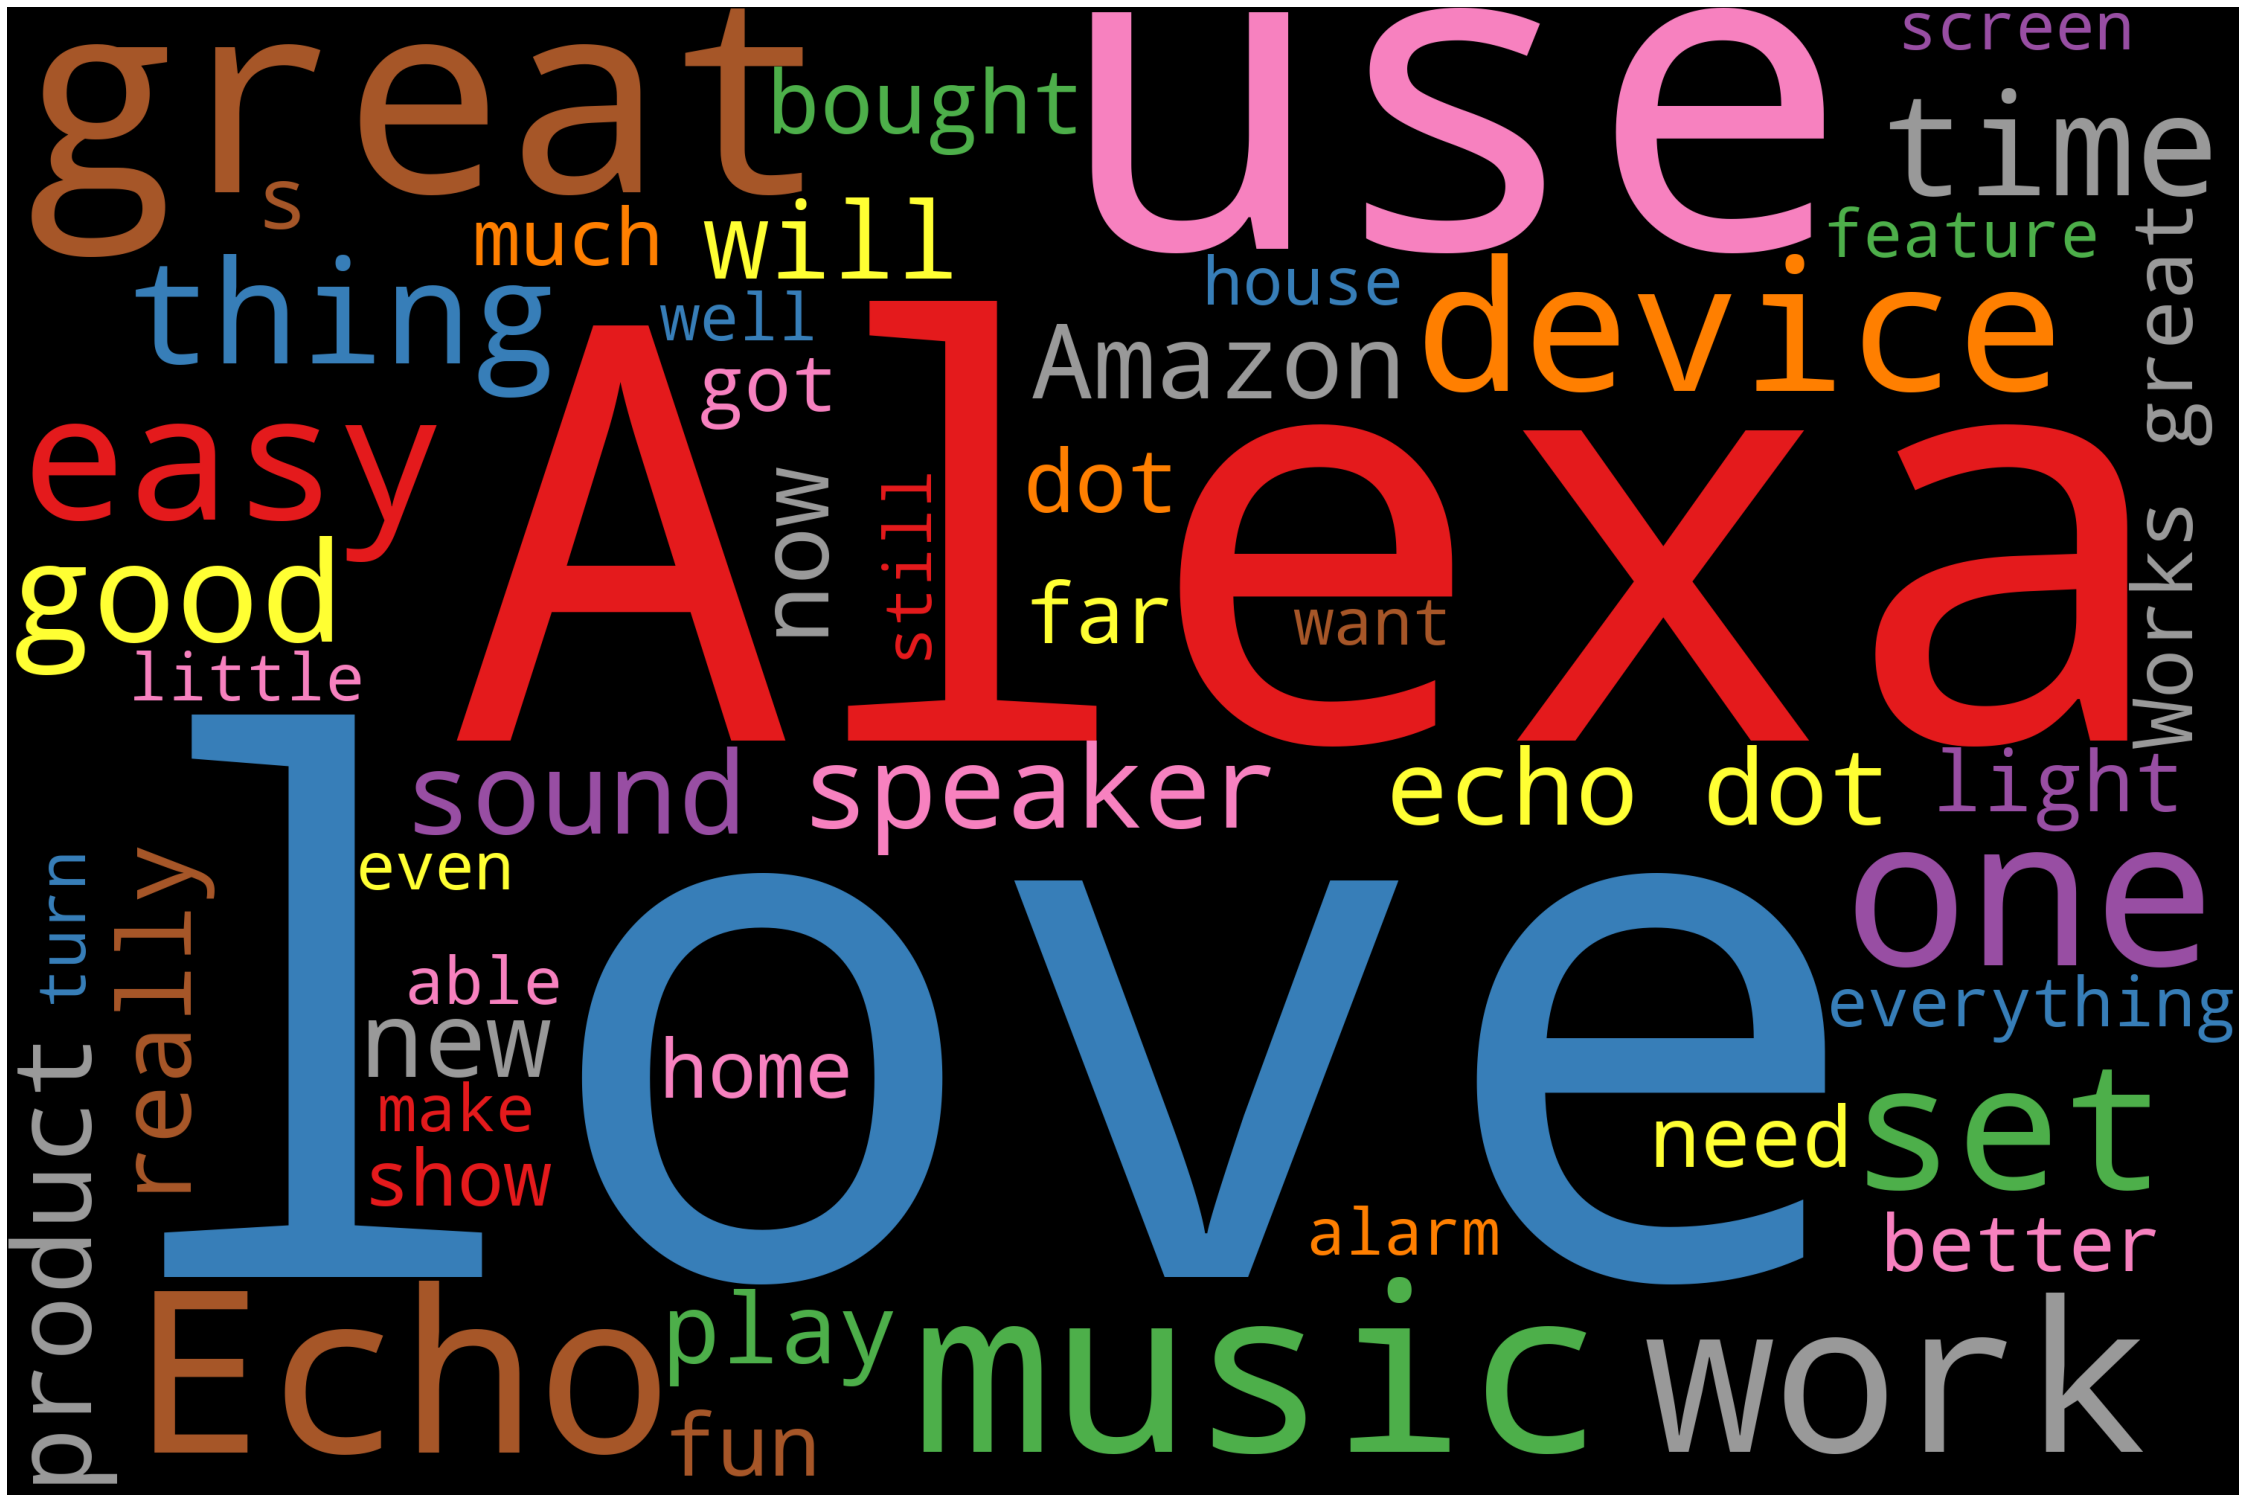

In [46]:
wordcloud=WordCloud(width=3000,height=2000,background_color='black',max_words=50,
                   colormap='Set1',stopwords=STOPWORDS).generate(data1)
plot_cloud(wordcloud)

### Named Entity Recognition

In [48]:
one_block=data1
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [49]:
one_block

'Love my Echo! Loved it! Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home. I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well. Music I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do. Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.  She does not seem to be very smartbon politics yet. I think this is the 5th one I\'ve purchased. I\'m working on 

In [50]:
doc_block

Love my Echo! Loved it! Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home. I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well. Music I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do. Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.  She does not seem to be very smartbon politics yet. I think this is the 5th one I've purchased. I'm working on get

In [51]:
for token in doc_block:
    print(token, token.pos_)

Love VERB
my PRON
Echo PROPN
! PUNCT
Loved VERB
it PRON
! PUNCT
Sometimes ADV
while SCONJ
playing VERB
a DET
game NOUN
, PUNCT
you PRON
can AUX
answer VERB
a DET
question NOUN
correctly ADV
but CCONJ
Alexa PROPN
says VERB
you PRON
got VERB
it PRON
wrong ADJ
and CCONJ
answers VERB
the DET
same ADJ
as ADP
you PRON
. PUNCT
  SPACE
I PRON
like VERB
being AUX
able ADJ
to PART
turn VERB
lights NOUN
on ADP
and CCONJ
off ADV
while ADV
away ADV
from ADP
home NOUN
. PUNCT
I PRON
have AUX
had VERB
a DET
lot NOUN
of ADP
fun NOUN
with ADP
this DET
thing NOUN
. PUNCT
My PRON
4 NUM
yr NOUN
old ADJ
learns NOUN
about ADP
dinosaurs NOUN
, PUNCT
i PRON
control VERB
the DET
lights NOUN
and CCONJ
play VERB
games NOUN
like ADP
categories NOUN
. PUNCT
Has VERB
nice ADJ
sound NOUN
when SCONJ
playing VERB
music NOUN
as ADV
well ADV
. PUNCT
Music NOUN
I PRON
received VERB
the DET
echo NOUN
as ADP
a DET
gift NOUN
. PUNCT
I PRON
needed VERB
another DET
Bluetooth PROPN
or CCONJ
something PRON
to PART
play VERB
mus

with ADP
Echo PROPN
) PUNCT
. PUNCT
If SCONJ
you PRON
have AUX
n't PART
had VERB
a DET
go NOUN
with ADP
one NUM
then ADV
definitely ADV
try VERB
it!What ADP
I PRON
like INTJ
best ADV
is AUX
the DET
number NOUN
of ADP
other ADJ
devices NOUN
that SCONJ
it PRON
can AUX
connect VERB
with ADP
. PUNCT
My PRON
purchase NOUN
came VERB
with ADP
a DET
Smart PROPN
Plug PROPN
for ADP
$ SYM
10 NUM
which PRON
I PRON
connect VERB
my PRON
lamp NOUN
to ADP
. PUNCT
Alexa ADJ
, PUNCT
turn NOUN
of ADP
the DET
lights NOUN
! PUNCT
My PRON
husband NOUN
likes VERB
being AUX
able ADJ
to PART
use VERB
it PRON
to PART
listen VERB
to ADP
music NOUN
. PUNCT
  SPACE
I PRON
wish VERB
we PRON
knew VERB
all PRON
it PRON
's AUX
capabilities NOUN
My PRON
Android PROPN
would AUX
not PART
allow VERB
Alexa PROPN
to PART
connect VERB
. PUNCT
Fortunately ADV
, PUNCT
my PRON
sister NOUN
was AUX
here ADV
with ADP
her PRON
Apple PROPN
cell NOUN
. PUNCT
After SCONJ
an DET
hour+ NOUN
tech NOUN
support NOUN
fixed VERB
the DET
glit

yet ADV
. PUNCT
Love VERB
it PRON
- PUNCT
am AUX
using VERB
it PRON
strictly ADV
for ADP
music NOUN
now ADV
and CCONJ
it PRON
's AUX
great ADJ
! PUNCT
Love VERB
the DET
Echo PROPN
! PUNCT
! PUNCT
! PUNCT
I PRON
love VERB
the DET
size NOUN
, PUNCT
material NOUN
and CCONJ
speaker NOUN
quality NOUN
. PUNCT
I PRON
have VERB
it PRON
hooked VERB
up ADP
to ADP
one NUM
light NOUN
easily ADV
and CCONJ
will AUX
work VERB
on ADP
additional ADJ
lights NOUN
and CCONJ
thermostat PROPN
. PUNCT
Next ADV
is AUX
Echo PROPN
Dot PROPN
for ADP
bedroom NOUN
. PUNCT
There PRON
is VERB
a DET
lot NOUN
more ADJ
to PART
do VERB
with ADP
Echo PROPN
that SCONJ
you PRON
think VERB
. PUNCT
Traffic NOUN
, PUNCT
Weather PROPN
, PUNCT
Trivia PROPN
, PUNCT
etc X
. X
Love VERB
it PRON
! PUNCT
The DET
entire ADJ
family NOUN
loves VERB
Alexa PROPN
Echo PROPN
. PUNCT
She PRON
’s VERB
now ADV
a DET
part NOUN
of ADP
this DET
family NOUN
. PUNCT
Great ADJ
fun NOUN
getting VERB
to PART
know VERB
all DET
the DET
functions NOUN
o

lists NOUN
and CCONJ
grocery NOUN
lists NOUN
, PUNCT
which PRON
I PRON
love VERB
. PUNCT
  SPACE
I PRON
do AUX
n’t PART
have VERB
to PART
search VERB
for ADP
paper NOUN
and CCONJ
pencil NOUN
. PUNCT
  SPACE
Getting VERB
time NOUN
and CCONJ
temperature NOUN
are AUX
great ADJ
, PUNCT
do AUX
not PART
have VERB
to PART
wait VERB
for ADP
weather NOUN
reports NOUN
. PUNCT
  SPACE
The DET
sound NOUN
is AUX
good ADJ
. PUNCT
  SPACE
I PRON
am AUX
not PART
fussy ADJ
about ADP
woofers NOUN
, PUNCT
tweeters NOUN
, PUNCT
base NOUN
, PUNCT
etc X
. X
  SPACE
the DET
Echo PROPN
is AUX
fine ADJ
for ADP
me PRON
. PUNCT
  SPACE
This DET
afternoon NOUN
I PRON
am AUX
going VERB
to PART
try VERB
“ PUNCT
dropping VERB
in”.on NOUN
my PRON
son NOUN
when SCONJ
he PRON
gets VERB
home ADV
. PUNCT
  SPACE
Going VERB
to PART
surprise VERB
him PRON
. PUNCT
Not PART
much ADJ
features NOUN
. PUNCT
Great ADJ
sound NOUN
quality NOUN
, PUNCT
great ADJ
features NOUN
, PUNCT
great ADJ
product NOUN
. PUNCT
Multi ADJ
room NO

a DET
few ADJ
Echo PROPN
Dots PROPN
and CCONJ
repeated VERB
ask VERB
me PRON
to PART
take VERB
one NUM
of ADP
hers PRON
because SCONJ
it PRON
was AUX
so ADV
great ADJ
. PUNCT
I PRON
told VERB
her PRON
“ PUNCT
no INTJ
” PUNCT
for ADP
two NUM
days NOUN
. PUNCT
When SCONJ
she PRON
made VERB
me PRON
take VERB
it PRON
, PUNCT
6 NUM
hours NOUN
later ADV
I PRON
could AUX
not PART
live VERB
my PRON
life NOUN
without ADP
it PRON
! PUNCT
  SPACE
It PRON
’s VERB
that PRON
amazing ADJ
, PUNCT
so ADV
now ADV
we PRON
have VERB
four NUM
large ADJ
speakers NOUN
and CCONJ
only ADV
the DET
small ADJ
Echo PROPN
Dot PROPN
, PUNCT
that SCONJ
I PRON
will AUX
be AUX
returning VERB
to ADP
her PRON
. PUNCT
I PRON
say VERB
if SCONJ
you PRON
’re AUX
going VERB
to PART
order VERB
an DET
Alexa ADJ
speaker NOUN
, PUNCT
go VERB
big ADJ
and CCONJ
get VERB
the DET
Echo PROPN
, PUNCT
otherwise ADV
tou’ll AUX
Be AUX
returning VERB
the DET
two NUM
Echo PROPN
Dots PROPN
you PRON
could AUX
n’t PART
live VERB
without ADP
. 

TV NOUN
, PUNCT
but CCONJ
that PRON
's AUX
mainly ADV
the DET
TV NOUN
manufacturers(LG NOUN
) PUNCT
fault NOUN
due ADJ
to ADP
not PART
supporting VERB
anything PRON
older ADJ
than ADP
TVs NOUN
from ADP
this DET
year NOUN
. PUNCT
My PRON
smart ADJ
locks NOUN
also ADV
need VERB
an DET
additional ADJ
piece NOUN
of ADP
equipment NOUN
in ADP
order NOUN
to PART
connect VERB
as ADV
well ADV
. PUNCT
Speakers NOUN
sound VERB
great ADJ
and CCONJ
works VERB
very ADV
well ADV
. PUNCT
Great ADJ
sound NOUN
from ADP
a DET
little ADJ
speaker NOUN
We PRON
enjoy VERB
it PRON
Cool PROPN
Good ADJ
quality NOUN
, PUNCT
great ADJ
sound NOUN
quality NOUN
Works NOUN
perfectly ADV
Great ADJ
product NOUN
. PUNCT
Sometimes ADV
Alexa PROPN
does AUX
not PART
understand VERB
some DET
commands NOUN
for ADP
my PRON
Fire PROPN
TV PROPN
. PUNCT
All PRON
in ADV
all ADV
, PUNCT
this PRON
is AUX
a DET
fabulous ADJ
speaker NOUN
. PUNCT
Love VERB
my PRON
Echo PROPN
great ADJ
sound NOUN
very ADV
smart ADJ
! PUNCT
Sure ADV
did

. PUNCT
I PRON
'm AUX
too ADV
busy ADJ
listening VERB
to ADP
music NOUN
. PUNCT
Speaker PROPN
is AUX
pretty ADJ
goo NOUN
for ADP
its PRON
size NOUN
. PUNCT
All DET
the DET
fun NOUN
skills NOUN
really ADV
make VERB
the DET
echo NOUN
fun NOUN
for ADP
my PRON
whole ADJ
family NOUN
. PUNCT
Enjoyed VERB
entire ADJ
echo NOUN
experience NOUN
Easy PROPN
to PART
set VERB
up ADP
. PUNCT
The DET
Echo PROPN
is AUX
an DET
amazing ADJ
device NOUN
. PUNCT
  SPACE
Many ADJ
times NOUN
it PRON
seems VERB
very ADV
intuitive ADJ
. PUNCT
  SPACE
But CCONJ
at ADP
other ADJ
times NOUN
I PRON
ask VERB
for ADP
something PRON
that PRON
seems VERB
clear ADJ
and CCONJ
simple ADJ
and CCONJ
get VERB
no DET
result NOUN
. PUNCT
  SPACE
Installation NOUN
was AUX
fairly ADV
straightforward ADJ
, PUNCT
but CCONJ
I PRON
messed VERB
up ADP
several ADJ
times NOUN
simply ADV
because SCONJ
I PRON
thought VERB
a DET
step NOUN
was AUX
complete ADJ
when SCONJ
it PRON
was AUX
n't PART
. PUNCT
  SPACE
This PRON
actually ADV
made 

same ADJ
except SCONJ
the DET
sound ADJ
quality NOUN
, PUNCT
which PRON
I PRON
really ADV
did AUX
n't PART
feel VERB
I PRON
needed VERB
. PUNCT
However ADV
, PUNCT
I PRON
am AUX
so ADV
glad ADJ
I PRON
got VERB
it PRON
. PUNCT
What PRON
a DET
difference NOUN
! PUNCT
The DET
sound NOUN
really ADV
is AUX
far ADV
superior ADJ
to ADP
the DET
Echo PROPN
Dot PROPN
! PUNCT
Now ADV
I PRON
can AUX
listen VERB
to ADP
The DET
Greatest PROPN
Showman PROPN
with ADP
a DET
little ADJ
more ADJ
power NOUN
! PUNCT
Sound ADJ
quality NOUN
is AUX
great ADJ
. PUNCT
Still ADV
learning VERB
about ADP
all DET
the DET
different ADJ
things NOUN
I PRON
can AUX
do VERB
with ADP
it PRON
. PUNCT
FUN PROPN
! PUNCT
! PUNCT
! PUNCT
Got VERB
a DET
good ADJ
deal NOUN
and CCONJ
works VERB
great ADJ
with ADP
Prime PROPN
. PUNCT
  SPACE
Setup PROPN
was AUX
a DET
bit NOUN
of ADP
a DET
pain NOUN
but CCONJ
more ADJ
the DET
fault NOUN
of ADP
crappy ADJ
internet NOUN
service NOUN
. PUNCT
  SPACE
Has AUX
worked VERB
great ADJ
with

it PRON
quite ADV
inconvenient ADJ
. PUNCT
more ADV
compact ADJ
and CCONJ
a DET
bit NOUN
better ADJ
than ADP
the DET
original ADJ
I PRON
love VERB
it PRON
pretty ADV
cool ADJ
. PUNCT
I PRON
having VERB
it PRON
in ADP
my PRON
living NOUN
room NOUN
. PUNCT
Music NOUN
sounds VERB
really ADV
good ADJ
in ADP
my PRON
living NOUN
room NOUN
. PUNCT
I PRON
can AUX
hear VERB
it PRON
upstairs ADV
. PUNCT
This PRON
is AUX
a DET
great ADJ
product NOUN
! PUNCT
  SPACE
Set VERB
up ADP
was AUX
easy ADJ
. PUNCT
  SPACE
Sound PROPN
is AUX
wonderful ADJ
. PUNCT
So ADV
far ADV
I PRON
like VERB
it PRON
. PUNCT
  SPACE
I PRON
bought VERB
it PRON
just ADV
for ADP
some DET
music NOUN
though ADV
, PUNCT
and CCONJ
it PRON
sounds VERB
pretty ADV
good ADJ
. PUNCT
Love VERB
it PRON
Love VERB
it PRON
. PUNCT
Glad PROPN
I PRON
bought VERB
this PRON
. PUNCT
Like INTJ
, PUNCT
all DET
types NOUN
of ADP
fun NOUN
, PUNCT
music NOUN
, PUNCT
and CCONJ
more ADJ
I PRON
like VERB
the DET
volume NOUN
up ADV
and CCONJ
down ADV


and CCONJ
background NOUN
music NOUN
. PUNCT
Awesome PROPN
. PUNCT
I PRON
love VERB
Alexa PROPN
. PUNCT
I PRON
was AUX
n't PART
sure ADJ
I PRON
really ADV
wanted VERB
one NUM
of ADP
these PRON
, PUNCT
but CCONJ
now ADV
that SCONJ
I PRON
have VERB
it PRON
, PUNCT
it PRON
is AUX
extremely ADV
useful ADJ
. PUNCT
  SPACE
Get VERB
one NUM
, PUNCT
you PRON
'll AUX
love VERB
it PRON
! PUNCT
Initially ADV
, PUNCT
this DET
echo NOUN
dot NOUN
worked VERB
very ADV
well ADV
. PUNCT
Over ADP
time NOUN
, PUNCT
the DET
dot NOUN
stopped VERB
responding VERB
to ADP
' PUNCT
alexa ADJ
' PUNCT
unless SCONJ
you PRON
were AUX
within ADP
one NUM
foot NOUN
of ADP
it PRON
yelling VERB
. PUNCT
The DET
other ADJ
echos NOUN
/ SYM
echo NOUN
dots NOUN
in ADP
other ADJ
rooms NOUN
would AUX
respond VERB
without ADP
a DET
response NOUN
from ADP
this DET
echo NOUN
dot NOUN
. PUNCT
Would AUX
not PART
recommend VERB
buying NOUN
refurbished VERB
. PUNCT
Great PROPN
Product PROPN
fast ADJ
shipping NOUN
I PRON
bought VERB
a

this DET
one NOUN
for ADP
another DET
portion NOUN
of ADP
the DET
house NOUN
since SCONJ
we PRON
have VERB
several ADJ
wifi NOUN
home NOUN
devices NOUN
and CCONJ
we PRON
wanted VERB
to PART
voice AUX
control VERB
them PRON
from ADP
all ADV
over ADP
the DET
house NOUN
. PUNCT
Love VERB
the DET
product NOUN
. PUNCT
  SPACE
Use VERB
to PART
turn VERB
on ADP
my PRON
lights NOUN
and CCONJ
answer VERB
some DET
quick ADJ
questions NOUN
. PUNCT
A DET
great ADJ
buy NOUN
Was AUX
Leary PROPN
about ADP
refurbished VERB
but CCONJ
work VERB
great ADJ
. PUNCT
Very ADV
puny ADJ
sound NOUN
, PUNCT
but CCONJ
works VERB
great ADJ
. PUNCT
Great INTJ
Exactly ADV
like ADP
new ADJ
, PUNCT
can AUX
tell VERB
the DET
difference NOUN
from ADP
my PRON
new ADJ
dot NOUN
I PRON
got VERB
prior ADV
to ADP
this DET
one NOUN
, PUNCT
works VERB
perfectly ADV
. PUNCT
LOVE NOUN
Alexa PROPN
Works PROPN
perfect VERB
no DET
wear NOUN
and CCONJ
tear VERB
on ADP
the DET
device NOUN
I PRON
love VERB
Alexa PROPN
working VERB
on A

up ADP
! PUNCT
it PRON
was AUX
a DET
refurbished VERB
amazon NOUN
echo NOUN
dot PROPN
it PRON
was AUX
above ADV
and CCONJ
beyond ADP
what PRON
I PRON
expected VERB
! PUNCT
Alexa INTJ
and CCONJ
I PRON
have AUX
become VERB
buddies NOUN
she PRON
is AUX
a DET
great ADJ
assistant ADJ
Works NOUN
as SCONJ
advertised VERB
. PUNCT
Speak VERB
clearly ADV
, PUNCT
and CCONJ
research VERB
the DET
commands NOUN
. PUNCT
Also ADV
. PUNCT
Get VERB
the DET
wall NOUN
holder NOUN
, PUNCT
it PRON
keeps VERB
it PRON
out ADP
of ADP
the DET
way NOUN
. PUNCT
Set VERB
up ADP
is AUX
a DET
breeze NOUN
, PUNCT
just ADV
make VERB
sure ADJ
you PRON
are AUX
close ADJ
to ADP
the DET
device NOUN
initially ADV
when SCONJ
connecting VERB
your PRON
phone NOUN
. PUNCT
For ADP
some DET
reason NOUN
it PRON
made VERB
set VERB
up ADP
easier ADJ
... PUNCT
though SCONJ
it PRON
could AUX
be AUX
psychological ADJ
haha ADJ
Love VERB
my PRON
two NUM
echo NOUN
dots NOUN
but CCONJ
the DET
third ADJ
one NOUN
we PRON
ordered VERB
to PAR

music NOUN
... PUNCT
prime ADJ
videos NOUN
... PUNCT
even ADV
buy VERB
my PRON
online ADJ
games NOUN
, PUNCT
music NOUN
, PUNCT
and CCONJ
movies NOUN
through ADP
Amazon PROPN
. PUNCT
This DET
app NOUN
I PRON
have AUX
tried VERB
to PART
use VERB
it PRON
make VERB
simple ADJ
purchases NOUN
-- PUNCT
to PART
do VERB
anything PRON
. PUNCT
It PRON
is AUX
useless ADJ
. PUNCT
Works NOUN
very ADV
well ADV
, PUNCT
but CCONJ
the DET
microphone NOUN
don&#34;t NOUN
pick NOUN
up ADP
as ADV
well ADV
as ADP
the DET
full ADJ
size NOUN
echo PROPN
. PUNCT
  SPACE
Audio ADJ
quality NOUN
is AUX
okay ADJ
for ADP
the DET
size NOUN
. PUNCT
I PRON
bought VERB
two NUM
refurbished VERB
ones NOUN
for ADP
work NOUN
and CCONJ
home NOUN
. PUNCT
They PRON
both PRON
work VERB
perfectly ADV
and CCONJ
appear VERB
brand NOUN
new ADJ
Amazon PROPN
does AUX
n't PART
disappoint VERB
. PUNCT
Works NOUN
great ADJ
as ADP
a DET
BT PROPN
receiver NOUN
with ADP
output NOUN
connected VERB
to ADP
vintage ADJ
stereo NOUN
equipment NO

not PART
gotten VERB
a DET
decent ADJ
price NOUN
on ADP
this DET
item NOUN
. PUNCT
If SCONJ
the DET
connectivity NOUN
problems NOUN
persist VERB
, PUNCT
I PRON
may AUX
have VERB
to PART
exchange VERB
/ SYM
return VERB
this DET
item NOUN
. PUNCT
I PRON
do AUX
n’t PART
want VERB
to PART
though ADV
— PUNCT
Alexa ADP
’s PART
kind NOUN
of ADV
growing VERB
on ADP
me PRON
. PUNCT
I PRON
bought VERB
it PRON
because SCONJ
everyone PRON
was AUX
saying VERB
how SCONJ
much ADJ
they PRON
love VERB
theirs PRON
. PUNCT
But CCONJ
I PRON
have VERB
no DET
need NOUN
for ADP
it PRON
. PUNCT
I PRON
only ADV
used VERB
it PRON
once ADV
. PUNCT
The DET
volume NOUN
was AUX
not PART
loud ADJ
enough ADV
for ADP
me PRON
when SCONJ
I PRON
played VERB
music NOUN
while SCONJ
I PRON
was AUX
on ADP
my PRON
treadmill NOUN
. PUNCT
So ADV
I PRON
rather ADV
use VERB
my PRON
tower NOUN
speaker NOUN
which PRON
is AUX
3xs ADJ
louder ADJ
. PUNCT
Worked VERB
like ADP
new ADJ
. PUNCT
  SPACE
Will AUX
do VERB
it PRON
again ADV
.

what PRON
can AUX
you PRON
expect VERB
. PUNCT
The DET
Echo PROPN
Plus PROPN
has VERB
much ADV
better ADJ
audio NOUN
but CCONJ
that PRON
is AUX
what PRON
you PRON
get VERB
with ADP
the DET
larger ADJ
more ADV
expensive ADJ
Echo PROPN
. PUNCT
Works VERB
great ADJ
! PUNCT
Was AUX
n't PART
sure ADJ
if SCONJ
I PRON
'd AUX
like VERB
this DET
product NOUN
but CCONJ
after ADP
having VERB
it PRON
for ADP
a DET
little ADJ
while SCONJ
I PRON
want VERB
one NUM
in ADP
every DET
room NOUN
! PUNCT
My PRON
daughter NOUN
is AUX
constantly ADV
asking VERB
alexa ADP
how SCONJ
to PART
spell VERB
words NOUN
. PUNCT
We PRON
've AUX
barely ADV
tapped VERB
into ADP
all DET
the DET
things NOUN
this DET
product NOUN
is AUX
capable ADJ
of ADP
and CCONJ
I PRON
'm AUX
looking VERB
forward ADV
to ADP
learning VERB
all PRON
of ADP
its PRON
capabilities NOUN
! PUNCT
A++++ X
Great ADJ
product NOUN
. PUNCT
Works NOUN
well ADV
Absolutly ADV
love VERB
it PRON
! PUNCT
Bought VERB
my PRON
first ADJ
echo NOUN
dot NOUN
and 

my PRON
echo NOUN
dot NOUN
! PUNCT
! PUNCT
! PUNCT
I PRON
like VERB
that SCONJ
it PRON
knows VERB
my PRON
music NOUN
type NOUN
. PUNCT
The DET
least ADJ
is AUX
that SCONJ
it PRON
is AUX
n't PART
wireless ADJ
and CCONJ
the DET
volume NOUN
is AUX
not PART
that ADV
high ADJ
. PUNCT
great ADJ
product NOUN
! PUNCT
It PRON
works VERB
great ADJ
, PUNCT
but CCONJ
the DET
reason NOUN
I PRON
'm AUX
leaving VERB
3 NUM
stars NOUN
is AUX
because SCONJ
it PRON
wo AUX
nt PART
play VERB
unless SCONJ
it PRON
plugged VERB
in ADP
the DET
whole ADJ
time NOUN
. PUNCT
Pretty ADV
irritating VERB
especially ADV
when SCONJ
there PRON
is VERB
no DET
outlet NOUN
available ADJ
. PUNCT
Works VERB
great ADJ
! PUNCT
I PRON
love VERB
it PRON
ita NOUN
like ADP
having VERB
a DET
personal ADJ
assistant NOUN
and CCONJ
computer NOUN
and CCONJ
everything PRON
else ADV
in ADP
one NUM
. PUNCT
The DET
problem NOUN
I PRON
have VERB
with ADP
this DET
item NOUN
could AUX
just ADV
be AUX
my PRON
inexperience NOUN
. PUNCT
I PRON
o

up ADP
every DET
morning NOUN
on ADP
time NOUN
! PUNCT
Like ADP
new ADJ
. PUNCT
  SPACE
No DET
difference NOUN
from ADP
new ADJ
unused ADJ
original NOUN
. PUNCT
I PRON
have VERB
no DET
complaints NOUN
. PUNCT
As ADV
far ADV
as SCONJ
I PRON
know VERB
, PUNCT
these PRON
are AUX
exactly ADV
like ADP
new ADJ
, PUNCT
just ADV
a DET
little ADV
cheaper ADJ
. PUNCT
Great ADJ
! PUNCT
Perfect ADJ
condition NOUN
! PUNCT
Like ADP
new ADJ
It PRON
works VERB
just ADV
as ADV
well ADV
as ADP
the DET
new ADJ
version NOUN
I PRON
got VERB
as ADP
a DET
discount NOUN
with ADP
my PRON
Echo PROPN
speaker NOUN
. PUNCT
I PRON
decided VERB
to PART
purchase VERB
this DET
version NOUN
because SCONJ
Amazon PROPN
states VERB
it PRON
has VERB
the DET
same ADJ
warranty NOUN
. PUNCT
I PRON
received VERB
the DET
echo NOUN
as ADP
a DET
gift NOUN
. PUNCT
I PRON
needed VERB
another DET
Bluetooth PROPN
or CCONJ
something PRON
to PART
play VERB
music NOUN
easily ADV
accessible ADJ
, PUNCT
and CCONJ
found VERB
this DET
smart

group NOUN
Camelot PROPN
. PUNCT
Great ADJ
Very ADV
satisfied ADJ
with ADP
the DET
Echo PROPN
. PUNCT
Alexa PROPN
now ADV
controls VERB
the DET
lights NOUN
in ADP
my PRON
family NOUN
room NOUN
and CCONJ
my PRON
wife NOUN
can AUX
listen VERB
to ADP
Jimmy PROPN
Buffet PROPN
by ADP
just ADV
asking VERB
Alexa PROPN
. PUNCT
It PRON
's AUX
like ADP
Siri PROPN
, PUNCT
in ADP
fact NOUN
, PUNCT
Siri PROPN
answers VERB
more ADV
accurately ADV
then ADV
Alexa PROPN
. PUNCT
  SPACE
I PRON
do AUX
n't PART
see VERB
a DET
real ADJ
need NOUN
for ADP
it PRON
in ADP
my PRON
household NOUN
, PUNCT
though SCONJ
it PRON
was AUX
a DET
good ADJ
bargain NOUN
on ADP
prime ADJ
day NOUN
deals NOUN
. PUNCT
Love VERB
my PRON
Echo PROPN
. PUNCT
Still ADV
learning VERB
how SCONJ
every DET
thing NOUN
works VERB
but CCONJ
having VERB
tons NOUN
of ADP
fun NOUN
. PUNCT
I PRON
love VERB
you PRON
so ADV
much ADV
No INTJ
different ADJ
than ADP
Apple PROPN
. PUNCT
To PART
play VERB
a DET
specific ADJ
list NOUN
of ADP
music N

Echo PROPN
, PUNCT
is AUX
a DET
HUGE ADJ
bonus NOUN
. PUNCT
  SPACE
Ca AUX
n't PART
wait VERB
to PART
learn VERB
more ADJ
and CCONJ
more ADJ
and CCONJ
more ADJ
Love VERB
it PRON
! PUNCT
awesome ADJ
thing NOUN
, PUNCT
love NOUN
Alexa PROPN
It PRON
worked VERB
exactly ADV
as SCONJ
expected VERB
and CCONJ
the DET
speaker NOUN
has VERB
great ADJ
sound NOUN
. PUNCT
It PRON
is AUX
perfect ADJ
for ADP
my PRON
classroom NOUN
! PUNCT
LOVE NOUN
, PUNCT
LOVE PROPN
this DET
new ADJ
little ADJ
gadget NOUN
. PUNCT
  SPACE
Has AUX
  SPACE
made VERB
our PRON
lives NOUN
so ADV
much ADV
easier ADJ
. PUNCT
  SPACE
it PRON
's AUX
like ADP
having VERB
our PRON
own ADJ
personal ADJ
secretary NOUN
living VERB
here ADV
in ADP
the DET
home NOUN
. PUNCT
  SPACE
We PRON
hardly ADV
need VERB
our PRON
CD PROPN
's PART
anymore ADV
, PUNCT
since SCONJ
ALEXA PROPN
plays VERB
everything PRON
we PRON
need VERB
. PUNCT
  SPACE
Going VERB
to PART
get VERB
the DET
Alexa PROPN
DOTS PROPN
soon ADV
for ADP
more ADJ
rooms NOU

. PUNCT
it PRON
's AUX
annoying ADJ
that SCONJ
everything PRON
they PRON
show VERB
Alexa PROPN
as ADP
being AUX
able ADJ
to PART
do VERB
has VERB
to PART
be AUX
downloaded VERB
. PUNCT
You PRON
spend VERB
so ADV
  SPACE
much ADJ
time NOUN
trying VERB
to PART
figure VERB
out ADP
how SCONJ
to PART
phrase VERB
it PRON
for ADP
the DET
machine NOUN
that PRON
you PRON
may AUX
as ADV
well ADV
just ADV
look VERB
it PRON
up ADP
yourself PRON
I PRON
have AUX
had VERB
Alexa PROPN
since SCONJ
the DET
beginning NOUN
. PUNCT
  SPACE
I PRON
accidentally ADV
spilled VERB
water NOUN
on ADP
her PRON
and CCONJ
have AUX
replaced VERB
it PRON
with ADP
the DET
2nd ADJ
generation NOUN
. PUNCT
  SPACE
I PRON
decided VERB
I PRON
could AUX
n't PART
be AUX
without ADP
an DET
Echo PROPN
. PUNCT
  SPACE
Setup PROPN
was AUX
easy ADJ
and CCONJ
had VERB
it PRON
working VERB
within ADP
minutes NOUN
. PUNCT
I PRON
like VERB
being AUX
able ADJ
to PART
tell VERB
Alexia PROPN
the DET
music NOUN
I PRON
want VERB
to PART
he

an DET
Alexa ADJ
speaker NOUN
, PUNCT
go VERB
big ADJ
and CCONJ
get VERB
the DET
Echo PROPN
, PUNCT
otherwise ADV
tou’ll AUX
Be AUX
returning VERB
the DET
two NUM
Echo PROPN
Dots PROPN
you PRON
could AUX
n’t PART
live VERB
without ADP
. PUNCT
Love VERB
it PRON
! PUNCT
! PUNCT
Great ADJ
product NOUN
! PUNCT
! PUNCT
! PUNCT
Easy ADJ
set VERB
up ADP
very ADV
user NOUN
friendly ADJ
Really ADV
disappointed ADJ
Alexa PROPN
has VERB
to PART
be AUX
plug VERB
- PUNCT
in NOUN
to PART
wall NOUN
socket VERB
all DET
the DET
time NOUN
. PUNCT
  SPACE
My PRON
fault NOUN
for ADP
not PART
checking VERB
this PRON
, PUNCT
but CCONJ
made VERB
the DET
assumption NOUN
that SCONJ
a DET
company NOUN
has AUX
technologically ADV
advanced VERB
as SCONJ
Amazon PROPN
would AUX
sell VERB
this DET
product NOUN
with ADP
a DET
rechargeable ADJ
battery NOUN
. PUNCT
  SPACE
If SCONJ
I PRON
could AUX
return VERB
it PRON
, PUNCT
I PRON
would AUX
as SCONJ
my PRON
Apple PROPN
music NOUN
and CCONJ
boom NOUN
speaker NOUN
give

it PRON
's AUX
more ADJ
than ADP
great ADJ
for ADP
our PRON
family NOUN
. PUNCT
Easy ADJ
to PART
use VERB
, PUNCT
minor ADJ
learning NOUN
curve NOUN
as SCONJ
it PRON
learns VERB
your PRON
voice NOUN
. PUNCT
It PRON
integrates VERB
seamlessly ADV
with ADP
my PRON
other ADJ
amazon NOUN
services NOUN
. PUNCT
Can't NOUN
wait VERB
to PART
get VERB
for ADP
my PRON
classroom NOUN
too ADV
! PUNCT
It PRON
's AUX
a DET
lot NOUN
of ADP
fun NOUN
even ADV
just ADV
as ADP
a DET
speaker NOUN
, PUNCT
let VERB
alone ADV
what PRON
I PRON
plan VERB
to PART
do VERB
with ADP
it PRON
. PUNCT
I PRON
love VERB
my PRON
Echo PROPN
show NOUN
! PUNCT
  SPACE
and CCONJ
now ADV
i PRON
have VERB
this PRON
in ADP
my PRON
bedroom NOUN
and CCONJ
it PRON
's AUX
wonderful ADJ
! PUNCT
, PUNCT
music NOUN
, PUNCT
info NOUN
, PUNCT
sleeping VERB
sounds NOUN
! PUNCT
Awesome ADJ
life NOUN
changer NOUN
! PUNCT
Seriously ADV
, PUNCT
I PRON
am AUX
able ADJ
to PART
start VERB
my PRON
morning NOUN
with ADP
Alexa PROPN
, PUNCT
by AD

have VERB
an DET
elderly ADJ
loved VERB
one NOUN
, PUNCT
this PRON
would AUX
be AUX
a DET
great ADJ
gift NOUN
. PUNCT
Once ADV
connected VERB
to ADP
wifi PROPN
, PUNCT
it PRON
is AUX
very ADV
simple ADJ
to PART
use VERB
. PUNCT
  SPACE
If SCONJ
you PRON
want VERB
unlimited ADJ
music NOUN
control NOUN
, PUNCT
be AUX
sure ADJ
to PART
have VERB
amazon ADJ
prime NOUN
or CCONJ
premium NOUN
spotify NOUN
and CCONJ
you PRON
will AUX
be AUX
blown VERB
away ADV
with ADP
your PRON
personal ADJ
dj NOUN
! PUNCT
You PRON
can AUX
even ADV
have VERB
conversations NOUN
with ADP
the DET
echo NOUN
. PUNCT
I PRON
am AUX
not PART
embarrassed ADJ
to PART
say VERB
, PUNCT
that DET
echo NOUN
has AUX
made VERB
me PRON
laugh VERB
a DET
couple NOUN
times NOUN
when SCONJ
I PRON
ask VERB
it PRON
to PART
tell VERB
me PRON
a DET
joke NOUN
. PUNCT
It PRON
tells VERB
me PRON
where SCONJ
my PRON
packages NOUN
are AUX
since SCONJ
I PRON
am AUX
an DET
amazon ADJ
prime NOUN
addict NOUN
, PUNCT
it PRON
comes VERB
in ADP
ex

. PUNCT
So ADV
I PRON
purchased VERB
one NUM
on ADP
prime ADJ
day NOUN
for ADP
my PRON
bathroom NOUN
for ADP
when SCONJ
I PRON
’m AUX
getting VERB
ready ADJ
for ADP
work NOUN
. PUNCT
I PRON
listen VERB
to ADP
music NOUN
at ADP
4 NUM
am NOUN
and CCONJ
the DET
base NOUN
it PRON
’s VERB
metro PROPN
booming PROPN
.. PUNCT
Replacement NOUN
for ADP
my PRON
clock NOUN
radio NOUN
, PUNCT
plus CCONJ
I PRON
have VERB
the DET
echo NOUN
dot NOUN
on ADP
my PRON
night NOUN
stand NOUN
as ADP
my PRON
alarm NOUN
clock NOUN
.. PUNCT
Very ADV
impressed ADJ
with ADP
look NOUN
, PUNCT
clarity NOUN
of ADP
sound NOUN
and CCONJ
color NOUN
. PUNCT
Alexa ADJ
is AUX
amazing ADJ
! PUNCT
Great ADJ
speaker NOUN
. PUNCT
Still ADV
getting AUX
used VERB
to ADP
Alexa PROPN
, PUNCT
do AUX
n't PART
have VERB
her PRON
connected VERB
to ADP
our PRON
TV NOUN
yet ADV
or CCONJ
other ADJ
things NOUN
right ADV
now ADV
use VERB
her PRON
for ADP
music NOUN
and CCONJ
information NOUN
, PUNCT
which PRON
she PRON
is AUX
great ADJ
! 

name NOUN
choices NOUN
( PUNCT
not PART
enough ADJ
for ADP
me PRON
but CCONJ
just ADV
enough ADJ
to PART
avoid VERB
confusion).I PROPN
named VERB
him PRON
“ PUNCT
Echo PROPN
. PUNCT
” PUNCT
Now ADV
if SCONJ
I PRON
could AUX
only ADV
choose VERB
a DET
male ADJ
voice NOUN
. PUNCT
I PRON
loved VERB
that SCONJ
I PRON
could AUX
link VERB
it PRON
tomy VERB
security NOUN
camera NOUN
and CCONJ
my PRON
new ADJ
doorbell NOUN
. PUNCT
So ADV
many ADJ
more ADJ
features NOUN
. PUNCT
Do AUX
n’t PART
forget VERB
to PART
buy VERB
thestand NOUN
/ SYM
base NOUN
. PUNCT
So ADV
many ADJ
advantages NOUN
to ADP
having VERB
that PRON
. PUNCT
Read VERB
the DET
reviews NOUN
. PUNCT
Highly ADV
recommend VERB
. PUNCT
I PRON
love VERB
this DET
little ADJ
Spot PROPN
more ADV
than SCONJ
I PRON
thought VERB
I PRON
would AUX
. PUNCT
The DET
sound NOUN
is AUX
great ADJ
for ADP
such DET
a DET
little ADJ
thing NOUN
... PUNCT
my PRON
music NOUN
plays VERB
nice ADJ
and CCONJ
loud ADJ
and CCONJ
clear ADJ
. PUNCT
The DET
vid

great ADJ
. PUNCT
Every DET
morning NOUN
I PRON
get VERB
the DET
weather NOUN
and CCONJ
news NOUN
when SCONJ
I PRON
get VERB
up ADP
. PUNCT
Also ADV
reminds VERB
me PRON
of ADP
all DET
the DET
appointments NOUN
my PRON
wife NOUN
and CCONJ
I PRON
have VERB
. PUNCT
Love VERB
it PRON
Part NOUN
of ADP
it PRON
is AUX
my PRON
fault NOUN
, PUNCT
I PRON
thought VERB
it PRON
could AUX
be AUX
wireless ADJ
. PUNCT
  SPACE
Though SCONJ
for ADP
the DET
price NOUN
, PUNCT
I PRON
still ADV
feel VERB
like SCONJ
it PRON
should AUX
be AUX
. PUNCT
Also ADV
the DET
sound ADJ
quality NOUN
and CCONJ
volume NOUN
could AUX
be AUX
better ADJ
. PUNCT
I PRON
prefer VERB
the DET
tap NOUN
. PUNCT
Unless SCONJ
you PRON
really ADV
want VERB
to PART
have VERB
the DET
call NOUN
options NOUN
but CCONJ
today NOUN
most ADJ
of ADP
us PRON
have VERB
phones NOUN
, PUNCT
computers NOUN
or CCONJ
iPads NOUN
. PUNCT
Just ADV
not PART
worth ADJ
it PRON
. PUNCT
Very ADV
easy ADJ
to PART
use VERB
and CCONJ
much ADV
quicker ADV
the

a DET
down ADJ
side NOUN
is AUX
that SCONJ
it PRON
does AUX
n't PART
always ADV
perfectly ADV
understand VERB
which DET
song NOUN
I PRON
want VERB
to PART
hear VERB
, PUNCT
but CCONJ
I PRON
do AUX
have VERB
a DET
deep ADJ
southern ADJ
accent NOUN
, PUNCT
lower ADJ
Alabama PROPN
, PUNCT
so SCONJ
I PRON
do AUX
n't PART
speak VERB
English PROPN
anyways ADV
. PUNCT
Smaller ADJ
than SCONJ
I PRON
thought VERB
it PRON
would AUX
be AUX
. PUNCT
Happy ADJ
I PRON
got VERB
a DET
stand NOUN
so SCONJ
it PRON
sits VERB
up ADP
higher ADV
on ADP
the DET
bedside NOUN
table NOUN
. PUNCT
Echo PROPN
Spot PROPN
works VERB
well ADV
except SCONJ
it PRON
does AUX
not PART
work VERB
with ADP
the DET
Ring PROPN
doorbell NOUN
as SCONJ
it PRON
states VERB
on ADP
the DET
website NOUN
. PUNCT
Since SCONJ
they PRON
were AUX
sold VERB
as ADP
a DET
pair NOUN
I PRON
thought VERB
that SCONJ
it PRON
would AUX
be AUX
app ADV
ready ADJ
. PUNCT
  SPACE
Unfortunately ADV
that PRON
is AUX
not PART
case NOUN
. PUNCT
  SPACE
Per

in ADP
the DET
kitchen NOUN
and CCONJ
in ADP
my PRON
bedroom NOUN
as ADP
my PRON
alarm NOUN
clock NOUN
. PUNCT
I PRON
'm AUX
no ADV
longer ADV
searching VERB
for ADP
a DET
pen NOUN
and CCONJ
paper NOUN
to PART
make VERB
lists NOUN
! PUNCT
! PUNCT
! PUNCT
! PUNCT
Love VERB
my PRON
Amazon PROPN
products NOUN
Love VERB
this DET
Love VERB
my PRON
spot NOUN
. PUNCT
Have VERB
that PRON
, PUNCT
a DET
dot NOUN
, PUNCT
and CCONJ
a DET
regular ADJ
echo NOUN
Nice PROPN
upgrade NOUN
from ADP
an DET
Echo PROPN
Dot PROPN
. PUNCT
Works VERB
decent ADJ
, PUNCT
wish VERB
it PRON
was AUX
able ADJ
to PART
answer VERB
more ADJ
questions NOUN
.... PUNCT
need VERB
a DET
better ADJ
source NOUN
for ADP
info NOUN
but CCONJ
the DET
rest NOUN
works VERB
great ADJ
! PUNCT
I PRON
ca AUX
n't PART
live VERB
without ADP
Alexa PROPN
. PUNCT
Really ADV
like ADP
it PRON
. PUNCT
The DET
screen NOUN
is AUX
a DET
major ADJ
plus NOUN
. PUNCT
Did AUX
nt PART
think VERB
i PRON
d NOUN
get VERB
an DET
Alexa ADJ
device NOUN
, PU

shopping NOUN
lists NOUN
, PUNCT
calendar NOUN
events NOUN
, PUNCT
news NOUN
, PUNCT
weather NOUN
, PUNCT
and CCONJ
so ADV
much ADV
more ADJ
. PUNCT
Great ADJ
! PUNCT
I PRON
really ADV
like VERB
it PRON
works VERB
well ADV
trivia ADJ
games NOUN
and CCONJ
shopping VERB
on ADP
it PRON
is AUX
fun NOUN
. PUNCT
Sometimes ADV
it PRON
misunderstands VERB
what PRON
I PRON
say VERB
but CCONJ
other ADJ
then ADV
that SCONJ
the DET
speaker NOUN
is AUX
decent ADJ
video NOUN
chat NOUN
is AUX
good ADJ
but CCONJ
you PRON
do AUX
need VERB
to PART
be AUX
in ADP
a DET
well ADV
lit VERB
room NOUN
so SCONJ
the DET
other ADJ
end NOUN
can AUX
see VERB
you PRON
lol NOUN
. PUNCT
Fun PROPN
to PART
work VERB
with ADP
still ADV
learning VERB
everything PRON
she PRON
can AUX
do VERB
Awesome PROPN
. PUNCT
I PRON
love VERB
that SCONJ
it PRON
shows VERB
the DET
lyrics NOUN
of ADP
songs NOUN
! PUNCT
Love VERB
the DET
alarm NOUN
feature NOUN
... PUNCT
just ADV
tell VERB
what PRON
time NOUN
. PUNCT
I PRON
think VERB
the

are AUX
excellent ADJ
. PUNCT
Yes INTJ
it PRON
met VERB
my PRON
expectations NOUN
. PUNCT
  SPACE
The DET
snooze NOUN
on ADP
the DET
alarm NOUN
needs VERB
a PRON
but CCONJ
of ADP
work NOUN
. PUNCT
  SPACE
Tap VERB
it PRON
and CCONJ
it PRON
snoozes VERB
, PUNCT
swipe VERB
up ADP
and CCONJ
it PRON
prompts VERB
you PRON
to PART
dismiss VERB
. PUNCT
  SPACE
But CCONJ
without ADP
my PRON
glasses NOUN
I PRON
ca AUX
n't PART
read VERB
it PRON
and CCONJ
often ADV
it PRON
just ADV
snoozes VERB
. PUNCT
  SPACE
Then ADV
one NUM
day NOUN
I PRON
must AUX
have AUX
dismissed VERB
tomorrow NOUN
's PART
alarm NOUN
because SCONJ
it PRON
never ADV
went VERB
off ADP
. PUNCT
  SPACE
I PRON
have VERB
it PRON
set VERB
for ADP
Mon PROPN
- PUNCT
Thu PROPN
. PUNCT
  SPACE
Fri PROPN
I PRON
do AUX
n't PART
need VERB
to PART
get VERB
up ADP
early ADV
. PUNCT
  SPACE
A DET
more ADV
apparent ADJ
indicator NOUN
of ADP
the DET
alarm NOUN
set VERB
would AUX
be AUX
nice ADJ
. PUNCT
  SPACE
My PRON
old ADJ
alarm NOUN
had

  SPACE
weather NOUN
reportsAlarm NOUN
clock VERB
⏰ X
. PUNCT
Music NOUN
🎶 PUNCT
download NOUN
music NOUN
Speakers NOUN
are AUX
not PART
as ADV
loud ADJ
as ADP
Google PROPN
Home PROPN
I PRON
have AUX
n't PART
figured VERB
out ADP
how SCONJ
to PART
make VERB
or CCONJ
receive VERB
calls NOUN
. PUNCT
  SPACE
Device NOUN
tells VERB
me PRON
I PRON
need VERB
to PART
register VERB
and CCONJ
I PRON
do AUX
not PART
know VERB
what PRON
to PART
do VERB
. PUNCT
I PRON
need VERB
to PART
get VERB
some DET
better ADJ
controls NOUN
for ADP
custom NOUN
displays NOUN
and CCONJ
the DET
ability NOUN
to PART
make VERB
my PRON
own ADJ
clock NOUN
, PUNCT
but CCONJ
that PRON
's AUX
asking VERB
a DET
lot NOUN
. PUNCT
In ADP
general ADJ
, PUNCT
great ADJ
device NOUN
; PUNCT
glad ADJ
I PRON
got VERB
it PRON
. PUNCT
Great ADJ
buy NOUN
! PUNCT
Gave VERB
it PRON
my PRON
daughter NOUN
for ADP
her PRON
birthday NOUN
, PUNCT
she PRON
loves VERB
it PRON
! PUNCT
Sound NOUN
is AUX
amazing ADJ
, PUNCT
she PRON
plays VERB


Dot PROPN
. PUNCT
It PRON
would AUX
be AUX
nice ADJ
if SCONJ
Amazon PROPN
would AUX
lose VERB
that DET
camera NOUN
though ADV
, PUNCT
which PRON
I PRON
have AUX
not PART
used VERB
and CCONJ
might AUX
cause VERB
squirms NOUN
for SCONJ
the DET
privacy NOUN
conscious ADJ
. PUNCT
Love VERB
this DET
little ADJ
dot NOUN
with ADP
a DET
screen NOUN
. PUNCT
  SPACE
Super PROPN
easy ADJ
to PART
set VERB
up ADP
and CCONJ
easy ADJ
to PART
use VERB
. PUNCT
  SPACE
Instantly ADV
connected VERB
to ADP
all DET
my PRON
other ADJ
echo NOUN
products NOUN
. PUNCT
  SPACE
I PRON
also ADV
bought VERB
the DET
screen NOUN
cover NOUN
that PRON
has VERB
the DET
blocking VERB
button NOUN
for ADP
the DET
camera NOUN
if SCONJ
you PRON
want VERB
to PART
use VERB
it PRON
. PUNCT
  SPACE
Recommended VERB
. PUNCT
ALEXA PROPN
IS AUX
NOT PART
AS ADP
SMART PROPN
AS ADP
SIRI PROPN
! PUNCT
CANNOT PROPN
CANCEL VERB
SNOOZE PROPN
AFTER SCONJ
ALARM PROPN
GOES VERB
OFF PROPN
. PUNCT
HAVE VERB
TO PART
CANCEL VERB
PRE PROPN
- PUN

increase VERB
the DET
size NOUN
slightly ADV
, PUNCT
and CCONJ
improve VERB
the DET
audio ADJ
speaker NOUN
. PUNCT
  SPACE
That PRON
would AUX
give VERB
you PRON
a DET
5 NUM
star NOUN
device NOUN
. PUNCT
Right ADV
now ADV
i PRON
’m AUX
debating VERB
whether SCONJ
to PART
return VERB
all DET
3 NUM
devices NOUN
. PUNCT
  SPACE
My PRON
wife NOUN
says VERB
we PRON
should AUX
. PUNCT
I PRON
never ADV
thought VERB
I PRON
was AUX
going VERB
to PART
be AUX
THAT DET
person NOUN
that PRON
is AUX
completely ADV
connected VERB
. PUNCT
I PRON
purchased VERB
this PRON
and CCONJ
another DET
Echo PROPN
product NOUN
on ADP
Prime PROPN
Day PROPN
and CCONJ
fell VERB
in ADP
love NOUN
. PUNCT
  SPACE
I PRON
have VERB
one NUM
in ADP
my PRON
office NOUN
and CCONJ
one NUM
in ADP
our PRON
kitchen NOUN
. PUNCT
  SPACE
I PRON
have AUX
already ADV
used VERB
this PRON
for ADP
morning NOUN
briefings NOUN
from ADP
the DET
News PROPN
while SCONJ
I PRON
am AUX
getting VERB
ready ADJ
for ADP
the DET
day NOUN
as ADV
wel

! PUNCT
I PRON
LOOOOOOOVE VERB
this DET
thing NOUN
! PUNCT
:) X
Watching VERB
movies NOUN
on ADP
it PRON
is AUX
a DET
bit NOUN
of ADP
a DET
disaster NOUN
because SCONJ
of ADP
the DET
round ADJ
screen NOUN
, PUNCT
but CCONJ
other ADJ
than ADP
that PRON
it PRON
's AUX
a DET
GREAT PROPN
chachki NOUN
toy NOUN
:) SPACE
We PRON
gave VERB
the DET
Echo PROPN
Spot PROPN
as ADP
a DET
gift NOUN
to ADP
my PRON
mother NOUN
in ADP
law NOUN
. PUNCT
  SPACE
She PRON
loves VERB
it PRON
. PUNCT
  SPACE
She PRON
can AUX
play VERB
music NOUN
of ADP
all DET
genres NOUN
! PUNCT
  SPACE
Easy ADV
for SCONJ
her PRON
to PART
use VERB
. PUNCT
Very ADV
easy ADJ
to PART
set VERB
up ADP
. PUNCT
Does VERB
what PRON
is AUX
said VERB
it PRON
will AUX
. PUNCT
Very ADV
satisfied ADJ
so ADV
far ADV
.. PUNCT
Great ADJ
product NOUN
, PUNCT
need VERB
a DET
bit NOUN
a DET
adjustment NOUN
to PART
set VERB
up ADP
spotify NOUN
, PUNCT
time NOUN
, PUNCT
weather NOUN
, PUNCT
etc X
.. X
in ADP
Hong PROPN
Kong PROPN
, PUNCT
but CCO

10 NUM
year NOUN
old ADJ
that PRON
needs VERB
stimulus NOUN
to PART
tell VERB
me PRON
to PART
do VERB
things NOUN
. PUNCT
I PRON
found VERB
there PRON
is VERB
no DET
way NOUN
to PART
turn VERB
this PRON
off ADP
except SCONJ
for ADP
.... PUNCT
turning VERB
off ADP
the DET
screen NOUN
. PUNCT
If SCONJ
I PRON
can AUX
not PART
find VERB
a DET
suitable ADJ
fix NOUN
for ADP
this PRON
it PRON
goes VERB
back ADV
. PUNCT
Great ADJ
to PART
wake VERB
up ADP
to ADP
music NOUN
and CCONJ
being AUX
told VERB
the DET
weather NOUN
. PUNCT
Bought VERB
this PRON
to PART
replace VERB
a DET
Sony PROPN
Dash PROPN
( PUNCT
remember VERB
those PRON
? PUNCT
) PUNCT
after SCONJ
Sony PROPN
decided VERB
to PART
pull VERB
support NOUN
from ADP
it PRON
entirely ADV
. PUNCT
It PRON
works VERB
great ADJ
for ADP
what PRON
I PRON
use VERB
it PRON
for ADP
: PUNCT
an DET
alarm NOUN
clock NOUN
, PUNCT
a DET
weather NOUN
station NOUN
, PUNCT
background NOUN
music NOUN
player NOUN
and CCONJ
voice NOUN
control NOUN
of ADP
lig

it PRON
funny ADJ
how SCONJ
they PRON
always ADV
thank VERB
me PRON
for ADP
being AUX
a DET
Prime PROPN
member NOUN
but CCONJ
when SCONJ
an DET
issue NOUN
arises VERB
I PRON
can AUX
not PART
even ADV
get VERB
assistance NOUN
. PUNCT
Much ADV
easier ADJ
to PART
use VERB
than ADP
the DET
dot NOUN
. PUNCT
It PRON
picks VERB
up ADP
my PRON
voice NOUN
from ADP
farther ADV
away ADV
and CCONJ
the DET
speakers NOUN
seem VERB
a DET
lot NOUN
cleaner ADJ
sounding VERB
The DET
screen NOUN
is AUX
a DET
nice ADJ
perk NOUN
but CCONJ
I PRON
only ADV
use VERB
it PRON
at ADP
bed NOUN
time NOUN
to PART
listen VERB
to ADP
prime ADJ
shows NOUN
before ADP
bed NOUN
, PUNCT
the DET
screen NOUN
is AUX
too ADV
small ADJ
to PART
watch VERB
shows NOUN
.. PUNCT
It PRON
displays VERB
my PRON
alarm NOUN
in ADP
print NOUN
so ADV
I PRON
know VERB
Alexa PROPN
heard VERB
me PRON
correctly ADV
. PUNCT
and CCONJ
you PRON
can AUX
make VERB
you PRON
own ADJ
clock NOUN
face NOUN
with ADP
personal ADJ
pictures NOUN
. PUNCT
  

ANOTHER DET
2 NUM
IN ADP
MY PRON
CART NOUN
... PUNCT
BUT CCONJ
I'M PROPN
WAITING VERB
FOR ADP
THE DET
SAME ADJ
DEAL NOUN
AGAIN ADV
! PUNCT
! PUNCT
! PUNCT
, PUNCT
I PRON
HIGHLY NOUN
RECOMMEND PROPN
THIS DET
ITEM PROPN
! PUNCT
I PRON
love VERB
using VERB
my PRON
Echo PROPN
Show PROPN
for ADP
music NOUN
, PUNCT
it PRON
sounds VERB
amazing ADJ
! PUNCT
Unfortunately ADV
the DET
video NOUN
quality NOUN
when SCONJ
video NOUN
chatting NOUN
is AUX
nt PART
great ADJ
, PUNCT
my PRON
husband NOUN
and CCONJ
I PRON
video NOUN
chat VERB
often ADV
and CCONJ
his PRON
video NOUN
comes VERB
out ADP
very ADV
clear ADJ
on ADP
my PRON
end NOUN
but CCONJ
he PRON
says VERB
my PRON
image NOUN
is AUX
very ADV
pixelated ADJ
. PUNCT
I PRON
'm AUX
still ADV
learning VERB
to PART
use VERB
it PRON
but CCONJ
so ADV
far ADV
so ADV
good ADJ
. PUNCT
Love VERB
it PRON
! PUNCT
Oh INTJ
I PRON
love VERB
my PRON
Echo PROPN
Show PROPN
and CCONJ
the DET
video NOUN
news NOUN
spots NOUN
Waste PROPN
of ADP
money NOUN
over ADP
th

lists NOUN
. PUNCT
  SPACE
And CCONJ
much ADV
more ADJ
! PUNCT
! PUNCT
! PUNCT
I PRON
do AUX
love VERB
it PRON
. PUNCT
Was AUX
easy ADJ
to PART
set VERB
up ADP
so ADV
far ADV
, PUNCT
but CCONJ
I PRON
wish VERB
it PRON
has VERB
a DET
little ADJ
more ADJ
in ADP
the DET
set VERB
up ADP
instructions NOUN
. PUNCT
There PRON
is VERB
still ADV
a DET
whole ADJ
lot NOUN
more ADJ
I PRON
would AUX
like VERB
to PART
be AUX
able ADJ
to PART
do VERB
with ADP
it PRON
and CCONJ
I PRON
have VERB
no DET
idea NOUN
if SCONJ
I PRON
can AUX
or CCONJ
not PART
with ADP
it PRON
. PUNCT
But CCONJ
I PRON
really ADV
do AUX
like VERB
it PRON
. PUNCT
This PRON
is AUX
my PRON
second ADJ
one NUM
. PUNCT
I PRON
have VERB
one NUM
in ADP
the DET
kitchen NOUN
and CCONJ
wanted VERB
another PRON
in ADP
my PRON
home NOUN
office NOUN
. PUNCT
It PRON
is AUX
amazing ADJ
for ADP
a DET
quick ADJ
look NOUN
up ADP
while SCONJ
I PRON
am AUX
working VERB
. PUNCT
I PRON
live VERB
a DET
very ADV
busy ADJ
life NOUN
and CCONJ
it PRON
he

had AUX
purchased VERB
the DET
Echo PROPN
and CCONJ
a DET
couple NOUN
of ADP
Dots PROPN
and CCONJ
hesitated VERB
to PART
purchase VERB
this PRON
until SCONJ
the DET
price NOUN
dropped VERB
. PUNCT
  SPACE
I PRON
am AUX
very ADV
glad ADJ
I PRON
did VERB
. PUNCT
  SPACE
The DET
versatility NOUN
of ADP
the DET
video NOUN
screen NOUN
is AUX
outstanding ADJ
. PUNCT
  SPACE
No DET
regrets NOUN
! PUNCT
I PRON
purchased VERB
the DET
" PUNCT
Show NOUN
" PUNCT
to PART
keep VERB
in ADP
touch NOUN
with ADP
my PRON
daughter NOUN
and CCONJ
her PRON
family NOUN
after ADP
their PRON
recent ADJ
move NOUN
half DET
way NOUN
across ADP
the DET
country NOUN
. PUNCT
  SPACE
It PRON
is AUX
wonderful ADJ
seeing VERB
their PRON
faces NOUN
during ADP
our PRON
conversations NOUN
. PUNCT
My PRON
difficulty NOUN
is AUX
I PRON
do AUX
nt PART
have VERB
a DET
cell NOUN
phone NOUN
, PUNCT
and CCONJ
now ADV
you PRON
ca AUX
nt PART
download VERB
the DET
alexa ADJ
app NOUN
on ADP
a DET
Mac PROPN
book NOUN
air NOUN
. PUNC

show NOUN
! PUNCT
Great ADJ
sound NOUN
and CCONJ
picture NOUN
. PUNCT
Does VERB
a DET
great ADJ
job NOUN
thing NOUN
in ADP
my PRON
entire ADJ
echo NOUN
collection NOUN
! PUNCT
Ca AUX
n’t PART
change VERB
voice NOUN
of ADP
Echo PROPN
Does VERB
everything PRON
I PRON
could AUX
ask VERB
and CCONJ
more ADJ
. PUNCT
Great ADJ
product NOUN
. PUNCT
I PRON
like VERB
how SCONJ
clear ADJ
the DET
screen NOUN
is AUX
. PUNCT
Hi INTJ
resolution NOUN
It PRON
is AUX
so ADV
easy ADJ
to PART
use VERB
and CCONJ
is AUX
everything PRON
I PRON
hoped VERB
for SCONJ
I PRON
love VERB
the DET
Echo PROPN
Show PROPN
. PUNCT
I PRON
’m AUX
going VERB
off ADP
to PART
live VERB
on ADP
campus NOUN
for ADP
school NOUN
in ADP
the DET
fall NOUN
and CCONJ
we PRON
got VERB
two NUM
of ADP
these PRON
to PART
serve VERB
as ADP
an DET
easy ADJ
way NOUN
to PART
connect VERB
. PUNCT
Some DET
people NOUN
might AUX
not PART
like VERB
the DET
camera NOUN
but CCONJ
that PRON
makes VERB
little ADJ
sense NOUN
. PUNCT
We PRON
carry VERB

Show PROPN
. PUNCT
  SPACE
The DET
problem NOUN
is AUX
, PUNCT
there PRON
’s VERB
so ADV
much ADV
it PRON
can AUX
do VERB
that SCONJ
I PRON
have AUX
n’t PART
been AUX
able ADJ
to PART
explore VERB
the DET
extent NOUN
of ADP
its PRON
abilities NOUN
! PUNCT
I PRON
got VERB
the DET
special ADJ
price NOUN
as ADP
part NOUN
of ADP
the DET
Prime PROPN
Day PROPN
promotion NOUN
... PUNCT
and CCONJ
you PRON
just ADV
ca AUX
n’t PART
beat VERB
what PRON
you PRON
get VERB
for ADP
the DET
price NOUN
. PUNCT
  SPACE
Very ADV
pleased ADJ
with ADP
the DET
sound NOUN
. PUNCT
The DET
video NOUN
screen NOUN
is AUX
sharp ADJ
. PUNCT
Sometimes ADV
it PRON
takes VERB
a DET
few ADJ
tries NOUN
to PART
get VERB
Alexa PROPN
to PART
perform VERB
a DET
command NOUN
... PUNCT
but CCONJ
as SCONJ
I PRON
get VERB
to PART
know VERB
the DET
system NOUN
better ADV
, PUNCT
I PRON
’m AUX
hoping VERB
that PRON
will AUX
improve VERB
. PUNCT
  SPACE
One NUM
drawback NOUN
in ADP
the DET
music NOUN
... PUNCT
I’ve PROPN
noticed 

is AUX
huge ADJ
addition NOUN
on ADP
Alexa ADJ
device NOUN
family NOUN
Echo PROPN
Show PROPN
is AUX
said VERB
to PART
work VERB
with ADP
certain ADJ
apps NOUN
but CCONJ
, PUNCT
NOT PART
! PUNCT
! PUNCT
! PUNCT
Cozi NOUN
state NOUN
works VERB
with ADP
Echo PROPN
Show PROPN
, PUNCT
but CCONJ
the DET
Cozi PROPN
Family PROPN
’s PART
does VERB
n’t PART
very ADV
well ADV
, PUNCT
Amazon PROPN
needs VERB
to PART
go VERB
back ADV
to ADP
drawing NOUN
board NOUN
, PUNCT
it PRON
would AUX
be AUX
such DET
a DET
needed VERB
piece NOUN
of ADP
technology NOUN
, PUNCT
but CCONJ
it PRON
lacks VERB
the DET
essential ADJ
, PUNCT
please INTJ
fix VERB
. PUNCT
Cost NOUN
of ADP
the DET
Echo PROPN
Show PROPN
was AUX
  SPACE
marvelous ADJ
. PUNCT
Got PROPN
Echo PROPN
Show PROPN
to PART
take VERB
on ADP
shopping NOUN
list NOUN
but CCONJ
that PRON
is AUX
all PRON
so ADV
far ADV
, PUNCT
adding VERB
items NOUN
to PART
list VERB
has VERB
long ADJ
lag NOUN
, PUNCT
and CCONJ
it PRON
not PART
my PRON
router NOUN
being 

. PUNCT
You PRON
do AUX
learn VERB
trivia NOUN
and CCONJ
no DET
one NOUN
's PART
watching NOUN
! PUNCT
Love VERB
that DET
recipes NOUN
are AUX
visible ADJ
and CCONJ
movies NOUN
are AUX
available ADJ
. PUNCT
Have AUX
n't PART
had VERB
it PRON
long ADV
enough ADV
to PART
try VERB
everything PRON
. PUNCT
Got VERB
this PRON
on ADP
Amazon PROPN
prime ADV
with ADP
the DET
ring NOUN
pro NOUN
. PUNCT
Work VERB
really ADV
great ADJ
. PUNCT
Being AUX
the DET
lazy ADJ
guy NOUN
I PRON
am AUX
I PRON
do AUX
n't PART
need VERB
to PART
go VERB
see VERB
who PRON
at ADP
my PRON
door NOUN
anymore ADV
while SCONJ
I PRON
'm AUX
gaming VERB
. PUNCT
We PRON
originally ADV
got VERB
the DET
Show PROPN
to PART
video NOUN
chat VERB
family NOUN
members NOUN
, PUNCT
and CCONJ
it PRON
works VERB
great ADJ
for ADP
that PRON
. PUNCT
We PRON
have AUX
found VERB
that SCONJ
we PRON
really ADV
like AUX
checking VERB
things NOUN
hands NOUN
- PUNCT
free ADJ
like ADP
the DET
weather NOUN
and CCONJ
recipes NOUN
. PUNCT
So AD

information NOUN
is AUX
not PART
part NOUN
of ADP
the DET
package NOUN
. PUNCT
Perhaps ADV
improvements NOUN
are AUX
in ADP
the DET
offing NOUN
with ADP
further ADJ
updates NOUN
. PUNCT
My PRON
daughter NOUN
has VERB
an DET
Echo PROPN
Show PROPN
and CCONJ
she PRON
told VERB
me PRON
how SCONJ
much ADV
she PRON
loved VERB
it PRON
. PUNCT
I PRON
bought VERB
a DET
white ADJ
one NUM
for ADP
my PRON
kitchen NOUN
and CCONJ
absolutely ADV
love VERB
it PRON
! PUNCT
  SPACE
It PRON
has VERB
all DET
the DET
features NOUN
of ADP
the DET
others NOUN
plus CCONJ
great ADJ
extras NOUN
. PUNCT
The DET
sound NOUN
system NOUN
is AUX
awesome ADJ
. PUNCT
I PRON
also ADV
own VERB
the DET
original ADJ
Echo PROPN
Tower PROPN
, PUNCT
Dots PROPN
and CCONJ
Spot PROPN
. PUNCT
Each PRON
are AUX
great ADJ
and CCONJ
have VERB
their PRON
uses NOUN
around ADP
my PRON
house NOUN
. PUNCT
I PRON
highly ADV
recommend VERB
all PRON
of ADP
these DET
products NOUN
. PUNCT
Really ADV
like ADP
the DET
show NOUN
me PRON
feature

never ADV
have VERB
to PART
get VERB
up ADP
from ADP
your PRON
chair NOUN
... PUNCT
laziness NOUN
at ADP
it PRON
's AUX
best ADJ
! PUNCT
  SPACE
LOL PROPN
  SPACE
All PRON
in ADP
all- X
a DET
great ADJ
product NOUN
with ADP
good ADJ
speakers NOUN
. PUNCT
Good ADJ
smart ADJ
home NOUN
gadget NOUN
. PUNCT
Love VERB
the DET
speakers NOUN
and CCONJ
the DET
screen NOUN
. PUNCT
No DET
YouTube PROPN
I PRON
loved VERB
everything PRON
about ADP
this DET
item NOUN
. PUNCT
Quick ADJ
response NOUN
time NOUN
and CCONJ
very ADV
sensitive ADJ
to ADP
me PRON
speaking VERB
from ADP
the DET
other ADJ
end NOUN
of ADP
the DET
house NOUN
. PUNCT
Bought VERB
it PRON
for ADP
my PRON
mother NOUN
It PRON
is AUX
great ADJ
. PUNCT
But CCONJ
it PRON
would AUX
be AUX
better ADJ
there PRON
was VERB
a DET
way NOUN
to PART
use VERB
headphones NOUN
with ADP
it PRON
. PUNCT
So ADV
far ADV
so ADV
good ADJ
, PUNCT
  SPACE
much ADV
better ADJ
sound NOUN
than ADP
my PRON
Echo PROPN
Dot PROPN
Clear PROPN
screen NOUN
and CCON

so ADV
I PRON
bought VERB
this PRON
on ADP
prime ADJ
day NOUN
! PUNCT
  SPACE
No DET
regrets NOUN
. PUNCT
  SPACE
Love VERB
that PRON
I PRON
can AUX
connect VERB
to ADP
my PRON
Ring PROPN
and CCONJ
see VERB
the DET
front ADJ
door NOUN
. PUNCT
  SPACE
Yhe NOUN
kids NOUN
like ADP
seeing VERB
the DET
lyrics NOUN
to ADP
songs NOUN
and CCONJ
sing VERB
along ADV
. PUNCT
. PUNCT
I PRON
love VERB
it PRON
! PUNCT
Plays VERB
great ADJ
music NOUN
, PUNCT
movies NOUN
, PUNCT
and CCONJ
so ADV
much ADV
more ADJ
. PUNCT
I PRON
does AUX
lag VERB
when SCONJ
u PRON
want VERB
to PART
see VERB
your PRON
arlo PROPN
security NOUN
cameras VERB
thou NOUN
. PUNCT
So ADV
far ADV
so ADV
good ADJ
. PUNCT
Wish VERB
it PRON
had VERB
a DET
longer ADJ
cord NOUN
. PUNCT
Love VERB
the DET
echo NOUN
show NOUN
. PUNCT
The DET
video NOUN
quality NOUN
is AUX
good ADJ
and CCONJ
of ADP
course NOUN
sound NOUN
is AUX
good ADJ
too ADV
. PUNCT
Love VERB
it PRON
. PUNCT
It PRON
is AUX
in ADP
my PRON
kitchen NOUN
so SCONJ
I PRON
c

’s VERB
a DET
great ADJ
product NOUN
and CCONJ
easily ADV
set VERB
up ADP
just ADV
have AUX
to PART
get VERB
it PRON
in ADP
sync NOUN
with ADP
your PRON
personal ADJ
set NOUN
up ADP
Using VERB
as ADP
a DET
hub NOUN
and CCONJ
music NOUN
. PUNCT
Still ADV
need VERB
more ADJ
AI PROPN
built VERB
into ADP
it PRON
to PART
interact VERB
better ADV
. PUNCT
It PRON
needs VERB
to PART
continue VERB
the DET
conversation NOUN
sometimes ADV
if SCONJ
the DET
finding NOUN
/ SYM
answer VERB
needs NOUN
to PART
be AUX
right ADJ
. PUNCT
You PRON
ca AUX
n't PART
keep VERB
stop VERB
Alexa ADJ
and CCONJ
ask VERB
again ADV
and CCONJ
again ADV
. PUNCT
Also ADV
, PUNCT
it PRON
should AUX
be AUX
able ADJ
to PART
access VERB
the DET
wikipedia NOUN
, PUNCT
dictionary ADJ
in ADP
many ADJ
areas NOUN
with ADP
better ADJ
and CCONJ
fast ADJ
access NOUN
. PUNCT
Needs NOUN
to PART
hear VERB
us PRON
better ADV
. PUNCT
Also ADV
, PUNCT
we PRON
should AUX
be AUX
able ADJ
to PART
name VERB
it PRON
on ADP
our PRON
own ADJ
in

friends NOUN
easier ADV
without ADP
them PRON
having VERB
to PART
download VERB
something PRON
for SCONJ
it PRON
to PART
work VERB
and CCONJ
it PRON
should AUX
link VERB
with ADP
email NOUN
and CCONJ
also ADV
them PRON
common ADJ
social ADJ
media NOUN
like ADP
facebook NOUN
and CCONJ
twitter NOUN
and CCONJ
others NOUN
! PUNCT
the DET
whole ADJ
purpose NOUN
was AUX
to PART
get VERB
him PRON
back ADV
connected VERB
to ADP
the DET
Web NOUN
by ADP
voice NOUN
so SCONJ
he PRON
would AUX
n't PART
feel VERB
left VERB
out ADP
and CCONJ
isolated ADJ
! PUNCT
they PRON
should AUX
also ADV
have VERB
a DET
tech NOUN
support NOUN
phone NOUN
number NOUN
to PART
call VERB
or CCONJ
a DET
way NOUN
to PART
do VERB
direct ADJ
help NOUN
to ADP
the DET
Echo PROPN
so ADV
tech ADJ
support NOUN
can AUX
help VERB
setup VERB
the DET
device NOUN
! PUNCT
I PRON
had VERB
to PART
get VERB
a DET
friend NOUN
who PRON
s VERB
an DET
IT NOUN
guy NOUN
to PART
come VERB
help VERB
me PRON
setup VERB
I PRON
love VERB
every DE

up ADV
too ADV
close ADJ
or CCONJ
to PART
far ADV
the DET
echo NOUN
does AUX
n’t PART
respond VERB
. PUNCT
So ADV
I PRON
think VERB
they PRON
need VERB
to PART
improve VERB
the DET
microphone NOUN
. PUNCT
And CCONJ
I PRON
wish VERB
the DET
speaker NOUN
was AUX
better ADJ
. PUNCT
The DET
speakers NOUN
are AUX
okay ADJ
but CCONJ
could AUX
be AUX
improved VERB
. PUNCT
Also ADV
I PRON
have VERB
the DET
echo NOUN
dot NOUN
and CCONJ
it PRON
never ADV
has AUX
given VERB
me PRON
any DET
problems NOUN
with ADP
the DET
internet NOUN
. PUNCT
Well INTJ
the DET
other ADJ
day NOUN
I PRON
received VERB
a DET
Red PROPN
Light PROPN
Right INTJ
on ADP
my PRON
Echo PROPN
Plus PROPN
. PUNCT
This DET
error NOUN
was AUX
Sorry PROPN
I PRON
’m AUX
having VERB
trouble NOUN
understanding VERB
you PRON
please INTJ
try VERB
again ADV
later ADV
. PUNCT
After ADP
research NOUN
online ADV
I PRON
learned VERB
it PRON
was AUX
a DET
problem NOUN
connecting VERB
to ADP
my PRON
internet NOUN
. PUNCT
And CCONJ
it PRON
was 

office NOUN
and CCONJ
home NOUN
. PUNCT
l PROPN
am AUX
looking VERB
add VERB
other ADJ
devices NOUN
( PUNCT
locks NOUN
, PUNCT
and CCONJ
lights NOUN
) PUNCT
for ADP
my PRON
home NOUN
. PUNCT
Better ADV
than SCONJ
expected VERB
! PUNCT
Wonderful ADJ
, PUNCT
still ADV
learning VERB
how SCONJ
to PART
use VERB
. PUNCT
Had VERB
a DET
heck NOUN
of ADP
a DET
time NOUN
setting VERB
it PRON
up ADP
, PUNCT
but CCONJ
is AUX
happened VERB
somehow ADV
. PUNCT
It PRON
's AUX
fantastic ADJ
. PUNCT
Very ADV
happy ADJ
with ADP
the DET
purchase NOUN
. PUNCT
Love VERB
it PRON
! PUNCT
! PUNCT
! PUNCT
I PRON
like VERB
the DET
list NOUN
ability NOUN
and CCONJ
the DET
music NOUN
I PRON
can AUX
play VERB
. PUNCT
  SPACE
I PRON
do AUX
not PART
like VERB
that SCONJ
I PRON
can AUX
not PART
create VERB
a DET
playlist NOUN
without ADP
using VERB
the DET
app NOUN
and CCONJ
even ADV
then ADV
Alexa PROPN
will AUX
not PART
play VERB
my PRON
songs NOUN
I PRON
have VERB
to PART
do VERB
it PRON
through ADP
my PRON
tablet

too ADV
soon ADV
to PART
fully ADV
evaluate VERB
. PUNCT
But CCONJ
looking VERB
forward ADV
to ADP
learning VERB
and CCONJ
using VERB
it PRON
. PUNCT
When SCONJ
I PRON
got VERB
this DET
Echo PROPN
I PRON
was AUX
excited ADJ
to PART
have VERB
a DET
device NOUN
with ADP
better ADJ
sound NOUN
than ADP
my PRON
Dot PROPN
and CCONJ
a DET
hub NOUN
to PART
control VERB
some DET
Hue PROPN
bulbs NOUN
. PUNCT
What PRON
I PRON
did AUX
n't PART
realize VERB
and CCONJ
also ADV
was AUX
n't PART
fully ADV
communicated VERB
to ADP
me PRON
, PUNCT
is AUX
that SCONJ
you PRON
ca AUX
n't PART
use VERB
Hue PROPN
bulbs NOUN
to ADP
their PRON
full ADJ
potential NOUN
with ADP
this DET
device NOUN
. PUNCT
You PRON
can AUX
only ADV
turn VERB
on ADP
and CCONJ
off ADP
the DET
lights NOUN
and CCONJ
set VERB
them PRON
to ADP
a DET
number NOUN
of ADP
preset ADJ
colors NOUN
. PUNCT
You PRON
also ADV
can AUX
not PART
update VERB
the DET
bulbs NOUN
to ADP
the DET
newest ADJ
firmare NOUN
which PRON
is AUX
a DET
security 

rather ADV
it PRON
refers VERB
you PRON
to ADP
the DET
Alexa ADJ
app NOUN
or CCONJ
help VERB
via ADP
a DET
computer NOUN
. PUNCT
  SPACE
It PRON
was AUX
very ADV
simple ADJ
to ADP
setup NOUN
and CCONJ
use NOUN
and CCONJ
we PRON
continue VERB
to PART
learn VERB
how SCONJ
this DET
tool NOUN
can AUX
become VERB
more ADV
useful ADJ
. PUNCT
I PRON
like VERB
how SCONJ
easy ADJ
it PRON
was AUX
to PART
set VERB
up ADP
. PUNCT
Very ADV
easy ADJ
to PART
use VERB
and CCONJ
set VERB
up ADP
with ADP
other ADJ
Bluetooth PROPN
devices NOUN
. PUNCT
Ease NOUN
of ADP
use NOUN
and CCONJ
many ADJ
tasks NOUN
it PRON
will AUX
perform VERB
I PRON
purchased VERB
the DET
Echo PROPN
Plus PROPN
with ADP
built VERB
- PUNCT
in ADP
hub NOUN
during ADP
Prime PROPN
Days PROPN
sale NOUN
. PUNCT
It PRON
was AUX
delivered VERB
very ADV
fast ADV
and CCONJ
was AUX
easy ADJ
to PART
link VERB
to ADP
my PRON
WiFi PROPN
. PUNCT
Also ADV
connected VERB
it PRON
to ADP
a DET
smart ADJ
plug NOUN
to PART
control VERB
a DET
light N

any PRON
of ADP
them PRON
, PUNCT
and CCONJ
this PRON
will AUX
process VERB
the DET
request NOUN
. PUNCT
  SPACE
It PRON
also ADV
handles VERB
all DET
the DET
functions NOUN
that PRON
the DET
other ADJ
devices NOUN
can AUX
do VERB
. PUNCT
I PRON
enjoy VERB
it PRON
much ADV
more ADJ
than SCONJ
I PRON
thought VERB
I PRON
would AUX
. PUNCT
I PRON
love VERB
my PRON
echo NOUN
plus NOUN
! PUNCT
! PUNCT
! PUNCT
How SCONJ
can AUX
you PRON
not PART
like VERB
the DET
Echo PROPN
Plus PROPN
. PUNCT
  SPACE
It PRON
has VERB
the DET
built VERB
in ADP
Hub PROPN
and CCONJ
works VERB
seamlessly ADV
with ADP
all DET
my PRON
compatible ADJ
devices NOUN
. PUNCT
  SPACE
Amazon PROPN
makes VERB
a DET
great ADJ
product NOUN
and CCONJ
I PRON
have AUX
n't PART
had VERB
a DET
single ADJ
issue NOUN
with ADP
this DET
one NUM
or CCONJ
any PRON
of ADP
the DET
other ADJ
devices NOUN
( PUNCT
echo NOUN
dots NOUN
, PUNCT
etc X
. PUNCT
) PUNCT
. PUNCT
I PRON
have AUX
been AUX
hesitant ADJ
to PART
purchase VERB
anything 

Good ADJ
daily ADJ
stuff NOUN
. PUNCT
Good ADJ
sound NOUN
, PUNCT
but CCONJ
not PART
Bose PROPN
. PUNCT
But CCONJ
, PUNCT
the DET
ads NOUN
say VERB
& CCONJ
# SYM
34;Hub NUM
included&#34 X
; PUNCT
so ADV
do AUX
n't PART
need VERB
anything PRON
else ADV
to PART
operate VERB
devices NOUN
. PUNCT
Well INTJ
, PUNCT
not PART
so ADV
. PUNCT
I PRON
understand VERB
there PRON
will AUX
be AUX
some DET
differences NOUN
in ADP
product NOUN
device NOUN
  SPACE
support NOUN
. PUNCT
The DET
fact NOUN
that SCONJ
it PRON
came VERB
with ADP
the DET
Hue PROPN
light NOUN
bulb NOUN
works VERB
only ADV
for ADP
on ADP
/off/ SYM
dimming VERB
of ADP
the DET
bulb NOUN
. PUNCT
The DET
bulb NOUN
is AUX
capable ADJ
of ADP
so ADV
much ADV
more ADJ
with ADP
the DET
Hue PROPN
App PROPN
but CCONJ
the DET
Hue PROPN
app NOUN
does AUX
not PART
recognize VERB
Alexa PROPN
hub NOUN
as ADP
a DET
bridge NOUN
. PUNCT
So ADV
, PUNCT
it PRON
appears VERB
you PRON
do AUX
have VERB
to PART
get VERB
a DET
Philips PROPN
bridge NOUN


immediately ADV
noticeable ADJ
. PUNCT
The DET
sound NOUN
is AUX
great ADJ
. PUNCT
And CCONJ
the DET
fact NOUN
that SCONJ
it PRON
's AUX
got VERB
a DET
built VERB
in ADP
hub NOUN
for ADP
the DET
Philips PROPN
Hue PROPN
lights NOUN
is AUX
a DET
huge ADJ
plus NOUN
! PUNCT
received VERB
the DET
wrong ADJ
product NOUN
... PUNCT
was AUX
so ADV
excited ADJ
to PART
install VERB
it PRON
... PUNCT
all DET
excitement NOUN
gone VERB
. PUNCT
Thank VERB
you PRON
Amazon PROPN
. PUNCT
I PRON
’m AUX
having VERB
trouble NOUN
with ADP
it PRON
, PUNCT
the DET
alarm NOUN
most ADJ
of ADP
times NOUN
does AUX
n’t PART
work VERB
, PUNCT
the DET
timer NOUN
does AUX
n’t PART
ends VERB
... PUNCT
and CCONJ
Alexa PROPN
keeps VERB
saying VERB
she PRON
is AUX
unavailable ADJ
. PUNCT
Love VERB
it PRON
just ADV
wish VERB
I PRON
could AUX
play VERB
my PRON
amazon NOUN
music NOUN
on ADP
both CCONJ
my PRON
devices NOUN
without ADP
having VERB
to PART
buy VERB
an DET
additional ADJ
subscription NOUN
Sounds VERB
a DET
litt

it PRON
. PUNCT
Incredible ADJ
piece NOUN
of ADP
technology NOUN
. PUNCT
I PRON
have VERB
this DET
right ADJ
center NOUN
of ADP
my PRON
living NOUN
room NOUN
on ADP
an DET
island NOUN
kitchen NOUN
counter NOUN
. PUNCT
The DET
mic ADJ
and CCONJ
speaker NOUN
goes VERB
in ADP
every DET
direction NOUN
and CCONJ
the DET
quality NOUN
of ADP
the DET
sound NOUN
is AUX
quite ADV
good ADJ
. PUNCT
I PRON
connected VERB
the DET
Echo PROPN
via ADP
Bluetooth PROPN
to ADP
my PRON
Sony PROPN
soundbar NOUN
on ADP
my PRON
TV NOUN
but CCONJ
find VERB
the DET
Echo PROPN
placement NOUN
and CCONJ
360 NUM
sound NOUN
more ADV
appealing ADJ
. PUNCT
It PRON
's AUX
no DET
audiophile ADJ
equipment NOUN
but CCONJ
there PRON
is VERB
good ADJ
range NOUN
and CCONJ
decent ADJ
bass NOUN
. PUNCT
The DET
sound NOUN
is AUX
more ADJ
than ADP
adequate ADJ
for ADP
any DET
indoor ADJ
entertaining ADJ
and CCONJ
loud ADJ
enough ADV
to PART
bother VERB
neighbors NOUN
in ADP
my PRON
building NOUN
. PUNCT
The DET
knob NOUN
on ADP


the DET
other ADJ
Echo PROPN
devices NOUN
in ADP
my PRON
home NOUN
. PUNCT
This PRON
came VERB
with ADP
a DET
Philips PROPN
smart PROPN
bulb NOUN
. PUNCT
It PRON
's AUX
better ADJ
than ADP
having VERB
a DET
clapper NOUN
! PUNCT
I PRON
found VERB
instructions NOUN
online ADV
to PART
' PUNCT
wake VERB
to ADP
music NOUN
& CCONJ
philips NOUN
light PROPN
' PUNCT
. PUNCT
Very ADV
easy ADJ
to PART
set VERB
it PRON
up ADP
with ADP
the DET
instructions NOUN
. PUNCT
You PRON
even ADV
have VERB
an DET
option NOUN
of ADP
what DET
song NOUN
you PRON
want VERB
to PART
wake VERB
up ADP
to ADP
! PUNCT
Exchange VERB
new ADJ
color NOUN
Alexa PROPN
is AUX
the DET
best ADJ
smart ADJ
speaker NOUN
out ADV
there ADV
I PRON
'm AUX
so ADV
glad ADJ
I PRON
came VERB
across ADP
it PRON
the DET
sound NOUN
is AUX
so ADV
amazing ADJ
and CCONJ
I PRON
mostly ADV
use VERB
Amazon PROPN
Alexa PROPN
for ADP
music NOUN
and CCONJ
school NOUN
work NOUN
help NOUN
I PRON
love VERB
to PART
control VERB
my PRON
room NOUN
lights 

will AUX
always ADV
use VERB
and CCONJ
miss VERB
when SCONJ
it PRON
's AUX
not PART
around ADV
. PUNCT
I PRON
find VERB
new ADJ
uses NOUN
for ADP
Alexa PROPN
every DET
day NOUN
. PUNCT
I PRON
've AUX
Incorporated VERB
this DET
device NOUN
into ADP
so ADV
many ADJ
parts NOUN
of ADP
my PRON
daily ADJ
life NOUN
. PUNCT
As SCONJ
Alexa PROPN
learns VERB
more ADJ
I PRON
learn VERB
more ADJ
. PUNCT
She PRON
's AUX
my PRON
alarm NOUN
clock NOUN
, PUNCT
she PRON
reminds VERB
me PRON
of ADP
important ADJ
dates NOUN
. PUNCT
I PRON
'm AUX
constantly ADV
asking VERB
her PRON
for ADP
information NOUN
like ADP
travel NOUN
, PUNCT
entertainment NOUN
, PUNCT
science NOUN
, PUNCT
history NOUN
, PUNCT
politics NOUN
Etc PROPN
. PUNCT
She PRON
turns VERB
on ADP
and CCONJ
off ADP
lights NOUN
, PUNCT
she PRON
's AUX
the DET
core NOUN
of ADP
my PRON
smart ADJ
home NOUN
. PUNCT
I PRON
love VERB
it PRON
best ADJ
gift NOUN
I PRON
got VERB
myself PRON
I PRON
love VERB
the DET
sound NOUN
very ADV
good ADJ
. PUNCT


Amazon PROPN
and CCONJ
learning VERB
that SCONJ
I PRON
can AUX
purchase VERB
a DET
portable ADJ
Echo PROPN
charging NOUN
station NOUN
I PRON
'm AUX
good ADJ
. PUNCT
Sincerely ADV
, PUNCT
We PRON
love VERB
this PRON
. PUNCT
As ADP
an DET
echo NOUN
its PRON
great ADJ
, PUNCT
Good ADJ
sound NOUN
quality NOUN
and CCONJ
functionality NOUN
. PUNCT
As ADP
a DET
smart ADJ
home NOUN
hub NOUN
, PUNCT
it PRON
sucks VERB
. PUNCT
No DET
automation NOUN
, PUNCT
no DET
geo NOUN
- PUNCT
fencing NOUN
, PUNCT
no DET
music NOUN
syncing VERB
for ADP
hue NOUN
, PUNCT
no DET
z NOUN
- PUNCT
wave NOUN
. PUNCT
All PRON
it PRON
does VERB
is AUX
turn VERB
things NOUN
on ADP
with ADP
your PRON
voice NOUN
. PUNCT
Ended VERB
up ADP
buying VERB
a DET
smartthing NOUN
hub NOUN
and CCONJ
transferring VERB
everything PRON
over ADV
. PUNCT
We PRON
have VERB
a DET
great ADJ
time NOUN
using VERB
this PRON
as ADP
a DET
family NOUN
. PUNCT
Even ADV
my PRON
toddler NOUN
can AUX
talk VERB
to ADP
her PRON
. PUNCT
There PRON
are

on ADP
my PRON
Apple PROPN
TV PROPN
but CCONJ
I PRON
was AUX
able ADJ
too ADV
on ADV
here ADV
! PUNCT
! PUNCT
! PUNCT
The DET
Fire PROPN
TV PROPN
Stick PROPN
was AUX
easy ADJ
to PART
set VERB
up ADP
and CCONJ
use VERB
. PUNCT
Only ADV
downfall NOUN
is AUX
, PUNCT
subscriptions NOUN
are AUX
needed VERB
to PART
view VERB
premium NOUN
content NOUN
. PUNCT
Prime ADJ
video NOUN
Love VERB
it PRON
! PUNCT
It PRON
's AUX
everything PRON
I PRON
wanted VERB
and CCONJ
more ADJ
I PRON
like VERB
the DET
way NOUN
you PRON
can AUX
watch VERB
anything PRON
and CCONJ
everything PRON
, PUNCT
for ADP
some DET
live NOUN
shows VERB
you PRON
need VERB
a DET
cable NOUN
provider NOUN
Es PROPN
  SPACE
excelente NOUN
funciona PROPN
genial NOUN
Was AUX
loving VERB
it PRON
but CCONJ
starting VERB
in ADP
June PROPN
Hulu PROPN
stopped VERB
working VERB
and CCONJ
crunchyroll PROPN
does AUX
n’t PART
work VERB
either ADV
. PUNCT
Probably ADV
will AUX
switch VERB
to ADP
something PRON
else ADV
soon ADV
. PUNCT
Puts NOU

be AUX
our PRON
only ADJ
one NUM
. PUNCT
to PART
bad ADJ
to ADP
because SCONJ
I PRON
relay VERB
like ADP
amazon NOUN
products NOUN
and CCONJ
having VERB
Alexa PROPN
is AUX
always ADV
nice ADJ
Love PROPN
the DET
Firestick PROPN
thinking VERB
about ADP
canceling VERB
the DET
satellite NOUN
I PRON
'm AUX
amazed ADJ
at ADP
how SCONJ
many ADJ
movies NOUN
, PUNCT
tv NOUN
shows VERB
and CCONJ
more ADJ
is AUX
available ADJ
. PUNCT
I PRON
am AUX
planning VERB
to PART
drop VERB
cable NOUN
service NOUN
soon ADV
and CCONJ
am AUX
very ADV
happy ADJ
to PART
know VERB
I PRON
'll AUX
have VERB
lots NOUN
of ADP
viewing VERB
pleasure NOUN
with ADP
the DET
Fire PROPN
stick NOUN
and CCONJ
not PART
pay VERB
the DET
outrageous ADJ
cable NOUN
bills NOUN
. PUNCT
Easy ADJ
to PART
setup VERB
. PUNCT
  SPACE
Sometimes ADV
Alexis PROPN
does AUX
not PART
work VERB
the DET
greatest ADJ
. PUNCT
The DET
connection NOUN
fire NOUN
stick NOUN
and CCONJ
WiFi PROPN
is AUX
way NOUN
bettter ADJ
than ADP
Netflix PROPN
. PUNC

out ADP
of ADP
my PRON
room NOUN
hahahaha NOUN
... PUNCT
movie NOUN
addicts NOUN
. PUNCT
Works NOUN
great ADJ
to PART
watch VERB
youtube NOUN
and CCONJ
amazin NOUN
video NOUN
Like SCONJ
it PRON
alots VERB
, PUNCT
something PRON
different ADJ
than ADP
traditional ADJ
television NOUN
. PUNCT
The DET
use NOUN
of ADP
Alexa PROPN
is AUX
nice ADJ
too ADV
. PUNCT
Works NOUN
well INTJ
I PRON
have VERB
several ADJ
of ADP
these PRON
recommend VERB
to ADP
anyone PRON
Awesome PROPN
, PUNCT
wish VERB
I PRON
had AUX
gotten VERB
one NOUN
sooner ADV
. PUNCT
Great ADJ
product NOUN
Works VERB
great ADJ
no DET
lag NOUN
and CCONJ
is AUX
much ADV
better ADJ
than ADP
the DET
gen PROPN
1 NUM
devices NOUN
I PRON
was AUX
using VERB
. PUNCT
I PRON
would AUX
recommend VERB
this PRON
if SCONJ
you PRON
have VERB
a DET
1rst NUM
gen NOUN
and CCONJ
are AUX
tired ADJ
of ADP
the DET
lag NOUN
and CCONJ
crashes NOUN
. PUNCT
Works VERB
great ADJ
. PUNCT
Easy ADJ
set VERB
up ADP
. PUNCT
Love VERB
it PRON
so ADV
easy ADJ
to

to PART
set VERB
up ADP
. PUNCT
  SPACE
Easy ADJ
to PART
use VERB
. PUNCT
Lots NOUN
of ADP
app NOUN
options NOUN
available ADJ
. PUNCT
The DET
first ADJ
stick NOUN
is AUX
a DET
solid ADJ
, PUNCT
entry NOUN
level NOUN
, PUNCT
device NOUN
and CCONJ
does VERB
what PRON
it PRON
's AUX
supposed VERB
to PART
do VERB
. PUNCT
Works NOUN
fine ADV
, PUNCT
I PRON
wanted VERB
this PRON
for ADP
my PRON
bedroom NOUN
television NOUN
. PUNCT
Does AUX
not PART
work VERB
with ADP
you PRON
tube NOUN
tv NOUN
Easy PROPN
to PART
set VERB
up ADP
; PUNCT
Easy ADJ
to PART
use VERB
! PUNCT
I PRON
love VERB
all DET
the DET
viewing VERB
choices NOUN
on ADP
FIRE PROPN
STICK PROPN
! PUNCT
Good ADJ
product NOUN
This PRON
is AUX
my PRON
2nd ADJ
fire NOUN
TV NOUN
stick NOUN
with ADP
Alexa PROPN
I PRON
have AUX
been AUX
very ADV
happy ADJ
with ADP
my PRON
first ADJ
one NUM
love NOUN
that PRON
you PRON
can AUX
use VERB
so ADV
many ADJ
apps NOUN
with ADP
it PRON
. PUNCT
Big ADJ
👍 PUNCT
Love VERB
the DET
Firestick PROPN
!

is AUX
great ADJ
, PUNCT
love VERB
the DET
Alexa PROPN
voice NOUN
remote ADJ
Works VERB
like ADP
a DET
charm NOUN
... PUNCT
Thought NOUN
it PRON
was AUX
pretty ADV
cool ADJ
new ADJ
to ADP
streaming NOUN
thing NOUN
seemed VERB
easy ADJ
to PART
use VERB
Super ADJ
- ADJ
Easy ADJ
setup NOUN
, PUNCT
only ADV
issue NOUN
i PRON
find VERB
is AUX
that SCONJ
it PRON
occasionally ADV
loses VERB
connection NOUN
with ADP
household NOUN
network NOUN
. PUNCT
Turned VERB
our PRON
old ADJ
TV NOUN
into ADP
a DET
smart ADJ
TV NOUN
. PUNCT
Really ADV
easy ADJ
interface NOUN
. PUNCT
Have AUX
bought VERB
4 NUM
now ADV
. PUNCT
Easy ADJ
set VERB
up ADP
, PUNCT
works VERB
perfect ADJ
. PUNCT
This PRON
is AUX
an DET
awesome ADJ
product NOUN
. PUNCT
I PRON
wanted VERB
to PART
test VERB
out ADP
the DET
differences NOUN
between ADP
this PRON
and CCONJ
my PRON
Roku NOUN
and CCONJ
both PRON
are AUX
very ADV
nice ADJ
. PUNCT
I PRON
will AUX
likely ADV
be AUX
using VERB
this PRON
for ADP
traveling VERB
as ADV
well ADV

this PRON
for ADP
dad NOUN
on ADP
father NOUN
's PART
Day PROPN
! PUNCT
  SPACE
He PRON
was AUX
tickled VERB
with ADP
it PRON
! PUNCT
Nice ADJ
product NOUN
Love VERB
my PRON
echo NOUN
. PUNCT
Love NOUN
playing VERB
music NOUN
in ADP
my PRON
room NOUN
Still ADV
getting AUX
used VERB
to ADP
Alexa PROPN
, PUNCT
but CCONJ
I PRON
think VERB
she PRON
's AUX
a DET
keeper NOUN
! PUNCT
Works VERB
good ADJ
for ADP
the DET
most ADJ
part NOUN
. PUNCT
You PRON
ask VERB
it PRON
some DET
questions NOUN
and CCONJ
she PRON
says VERB
she PRON
does AUX
n’t PART
know VERB
. PUNCT
I PRON
thought VERB
she PRON
was AUX
supposed VERB
to PART
know VERB
everything PRON
my PRON
new ADJ
best ADJ
friend NOUN
:) PUNCT
Absolutely ADV
love VERB
it PRON
! PUNCT
! PUNCT
! PUNCT
! PUNCT
I PRON
liked VERB
linking VERB
two NUM
more ADJ
rooms NOUN
in ADP
the DET
home NOUN
I PRON
LOVE VERB
ALEXA PROPN
! PUNCT
! PUNCT
SHE PROPN
ROCKS VERB
! PUNCT
! PUNCT
! PUNCT
I PRON
had VERB
some DET
trouble NOUN
with ADP
my PRON
echo NOU

times NOUN
I PRON
've AUX
never ADV
had VERB
anything PRON
like ADP
this PRON
, PUNCT
another DET
alexa NOUN
or CCONJ
google PROPN
home NOUN
, PUNCT
so ADV
to ADP
me PRON
this PRON
is AUX
a DET
super ADV
amazing ADJ
useful ADJ
tool NOUN
. PUNCT
I PRON
use VERB
it PRON
to PART
play VERB
sleep NOUN
sounds VERB
to PART
sleep VERB
. PUNCT
I PRON
use VERB
it PRON
for ADP
my PRON
amazon ADJ
audible ADJ
books NOUN
. PUNCT
Set PROPN
alarms NOUN
, PUNCT
reminders NOUN
, PUNCT
receive VERB
notifications NOUN
, PUNCT
play VERB
games NOUN
with ADP
her PRON
. PUNCT
Have AUX
her PRON
tell VERB
me PRON
a DET
short ADJ
story NOUN
lol NOUN
. PUNCT
It PRON
's AUX
pretty ADV
fun NOUN
. PUNCT
I PRON
know VERB
some DET
people NOUN
complained VERB
about ADP
the DET
speaker NOUN
I PRON
'm AUX
not PART
sure ADJ
why SCONJ
. PUNCT
I PRON
'm AUX
sure ADJ
if SCONJ
you PRON
have VERB
an DET
open ADJ
concept NOUN
house NOUN
all ADV
to ADP
yourself PRON
and CCONJ
want VERB
to PART
blast VERB
music NOUN
no INTJ
this 

, PUNCT
two NUM
, PUNCT
three NUM
but CCONJ
they PRON
forgot VERB
about ADP
step NOUN
four NUM
, PUNCT
five NUM
and CCONJ
six NUM
. PUNCT
I PRON
was AUX
almost ADV
ready ADJ
to PART
send VERB
to PART
back ADV
. PUNCT
The DET
app NOUN
is AUX
extremely ADV
slow ADJ
and CCONJ
it PRON
took VERB
hours NOUN
to PART
get VERB
this DET
thing NOUN
set VERB
up ADP
. PUNCT
However ADV
depending VERB
on ADP
what PRON
you PRON
are AUX
going VERB
to PART
be AUX
using VERB
it PRON
for AUX
I PRON
think VERB
it PRON
's AUX
an DET
ok ADJ
item NOUN
. PUNCT
Love VERB
the DET
echo NOUN
dot NOUN
it PRON
’s AUX
amaxing VERB
! PUNCT
! PUNCT
! PUNCT
I PRON
like VERB
to PART
use VERB
it PRON
for ADP
listening VERB
to ADP
podcasts NOUN
. PUNCT
  SPACE
I PRON
like VERB
to PART
set VERB
up ADP
the DET
greeting NOUN
in ADP
the DET
morning NOUN
to PART
tell VERB
me PRON
what PRON
's AUX
new ADJ
. PUNCT
  SPACE
The DET
one NUM
thing NOUN
I PRON
do AUX
n't PART
like VERB
was AUX
getting VERB
it PRON
to PART
recognize V

great ADJ
, PUNCT
but CCONJ
the DET
quality NOUN
is AUX
not PART
the DET
best ADJ
. PUNCT
It PRON
could AUX
definitely ADV
be AUX
louder ADJ
. PUNCT
Overall ADV
I PRON
like VERB
this PRON
. PUNCT
Though SCONJ
Siri PROPN
on ADP
my PRON
phone NOUN
can AUX
do VERB
more ADJ
for ADP
what PRON
I PRON
need VERB
as SCONJ
I PRON
do AUX
n’t PART
have VERB
a DET
“ PUNCT
smart ADJ
home NOUN
” PUNCT
and CCONJ
do AUX
n’t PART
intend VERB
to PART
make VERB
it PRON
one NUM
. PUNCT
But CCONJ
it PRON
’s VERB
fun NOUN
and CCONJ
I PRON
use VERB
it PRON
for ADP
music NOUN
and CCONJ
to PART
have VERB
it PRON
read VERB
me PRON
my PRON
audible ADJ
books NOUN
. PUNCT
Alexa ADJ
is AUX
pretty ADV
basic ADJ
and CCONJ
almost ADV
like ADP
a DET
toy NOUN
. PUNCT
Should AUX
n't PART
have AUX
been AUX
released VERB
into ADP
the DET
market NOUN
without ADP
proper ADJ
development NOUN
. PUNCT
Speech NOUN
recognition NOUN
fails VERB
to PART
understand VERB
basic ADJ
American ADJ
and CCONJ
British PROPN
Accent PROPN
. PUN

. PUNCT
We PRON
love VERB
it PRON
. PUNCT
Better ADV
sound NOUN
. PUNCT
Got VERB
this PRON
for ADP
my PRON
2nd ADJ
Echo PROPN
in ADP
the DET
house NOUN
, PUNCT
I PRON
already ADV
have VERB
the DET
regular ADJ
Echo PROPN
. PUNCT
  SPACE
The DET
Echo PROPN
Dot PROPN
was AUX
easy ADJ
to PART
set VERB
up ADP
but CCONJ
the DET
sound NOUN
is AUX
not PART
enjoyable ADJ
, PUNCT
wishing VERB
I PRON
would AUX
have AUX
just ADV
gone VERB
with ADP
another DET
regular ADJ
Echo PROPN
solely ADV
based VERB
on ADP
sound NOUN
. PUNCT
I PRON
was AUX
really ADV
happy ADJ
with ADP
my PRON
original ADJ
echo NOUN
so SCONJ
i PRON
thought VERB
I PRON
'd AUX
get VERB
an DET
echo NOUN
dot NOUN
to PART
use VERB
in ADP
my PRON
bedroom NOUN
. PUNCT
I PRON
was AUX
really ADV
disappointed ADJ
in ADP
the DET
audio ADJ
quality NOUN
so SCONJ
I PRON
connected VERB
an DET
external ADJ
speaker NOUN
via ADP
bluetooth NOUN
. PUNCT
The DET
audio NOUN
was AUX
much ADV
better ADJ
but CCONJ
I PRON
started VERB
having VERB
probl

responds VERB
to ADP
us PRON
when SCONJ
we PRON
are AUX
n't PART
even ADV
talking VERB
to ADP
it PRON
. PUNCT
I PRON
've AUX
unplugged VERB
it PRON
. PUNCT
It PRON
feels VERB
like SCONJ
it PRON
's AUX
& CCONJ
# SYM
34;spying&#34 NUM
; PUNCT
on ADP
us PRON
. PUNCT
NOT PART
CONNECTED ADJ
TO ADP
MY PRON
PHONE NOUN
PLAYLIST NOUN
:( PUNCT
I PRON
had AUX
put VERB
this PRON
off ADP
for ADP
awhile ADV
but CCONJ
finally ADV
got VERB
around ADP
to ADP
buying VERB
3 NUM
of ADP
them PRON
for ADP
my PRON
home NOUN
. PUNCT
My PRON
wife NOUN
is AUX
legally ADV
blind ADJ
and CCONJ
can AUX
not PART
use VERB
the DET
computer NOUN
. PUNCT
This PRON
has AUX
been AUX
a DET
Godsend NOUN
, PUNCT
100 NUM
% NOUN
. PUNCT
We PRON
have VERB
the DET
Amazon PROPN
music NOUN
for ADP
her PRON
and CCONJ
now ADV
she PRON
can AUX
listen VERB
to ADP
music NOUN
, PUNCT
check VERB
the DET
weather NOUN
, PUNCT
get VERB
phone NOUN
numbers NOUN
, PUNCT
make VERB
calls NOUN
, PUNCT
etc X
. X
, PUNCT
etc X
.. X
We PRON
are AUX


learnimg VERB
all DET
the DET
things NOUN
it PRON
can AUX
do VERB
Does VERB
what PRON
I PRON
expected VERB
, PUNCT
and CCONJ
more ADJ
. PUNCT
The DET
product NOUN
sounded VERB
the DET
same ADJ
as SCONJ
the DET
emoji ADJ
speaker NOUN
from ADP
five NUM
below ADP
my PRON
sister NOUN
has VERB
... PUNCT
and CCONJ
even ADV
that DET
one NUM
has VERB
Bluetooth PROPN
and CCONJ
does AUX
n’t PART
need VERB
to PART
be AUX
plugged VERB
in ADP
. PUNCT
The DET
only ADJ
good ADJ
thing NOUN
about ADP
this PRON
is AUX
that SCONJ
you PRON
can AUX
speak VERB
to ADP
it PRON
. PUNCT
I PRON
have VERB
a DET
friend NOUN
now ADV
. PUNCT
It PRON
’s VERB
easier ADJ
to PART
do VERB
things NOUN
with ADP
it PRON
Good ADJ
device NOUN
Overall ADV
love VERB
it PRON
. PUNCT
There PRON
are VERB
just ADV
some DET
commands NOUN
which PRON
are AUX
n't PART
effective ADJ
. PUNCT
It PRON
may AUX
be AUX
part NOUN
user NOUN
error NOUN
or CCONJ
" PUNCT
Alexa ADJ
" PUNCT
becoming VERB
accustom ADJ
to ADP
what PRON
is AUX
being AU

for ADP
4 NUM
stars NOUN
is AUX
volume NOUN
level NOUN
without ADP
external ADJ
speaker NOUN
. PUNCT
Easy ADJ
to PART
use VERB
. PUNCT
Echos NOUN
are AUX
great ADJ
I PRON
have VERB
a DET
few ADJ
of ADP
them PRON
through ADP
out ADP
our PRON
home NOUN
. PUNCT
  SPACE
All PRON
in ADP
voice NOUN
range VERB
to PART
ask VERB
a DET
question NOUN
. PUNCT
Say VERB
a DET
command NOUN
to PART
turn VERB
lights NOUN
on ADP
or CCONJ
off ADV
. PUNCT
Or CCONJ
my PRON
favorite NOUN
is AUX
play VERB
music NOUN
all PRON
though SCONJ
the DET
house NOUN
. PUNCT
Love VERB
it PRON
, PUNCT
this DET
time NOUN
it PRON
's AUX
a DET
gift NOUN
  SPACE
for ADP
friend NOUN
Fantastic PROPN
product NOUN
, PUNCT
I PRON
use VERB
it PRON
as ADP
a DET
smart ADJ
home NOUN
hub NOUN
and CCONJ
to PART
play VERB
music NOUN
through ADP
speakers NOUN
mainly ADV
, PUNCT
the DET
customizable ADJ
routines NOUN
are AUX
so ADV
nice ADJ
and CCONJ
very ADV
easy ADJ
to PART
program VERB
Great ADJ
I PRON
am AUX
quite ADV
disappointed AD

that PRON
require VERB
you PRON
to PART
sign VERB
up ADP
on ADP
some DET
questionable ADJ
website NOUN
and CCONJ
download VERB
their PRON
app NOUN
. PUNCT
Be AUX
carful ADJ
with ADP
these DET
people NOUN
! PUNCT
  SPACE
Entering VERB
your PRON
Wi PROPN
- PUNCT
Fi PROPN
password NOUN
on ADP
a DET
site NOUN
that PRON
’s AUX
not PART
vetted VERB
and CCONJ
your PRON
location NOUN
when SCONJ
the DET
app NOUN
askes VERB
is AUX
not PART
a DET
good ADJ
thing NOUN
. PUNCT
Try VERB
to PART
stay VERB
with ADP
devices NOUN
that SCONJ
  SPACE
work VERB
directly ADV
with ADP
the DET
Alexa ADJ
hub NOUN
with ADP
no DET
third ADJ
- PUNCT
party NOUN
app NOUN
, PUNCT
Amazon PROPN
has VERB
more ADJ
control NOUN
of ADP
these DET
types NOUN
of ADP
devices NOUN
and CCONJ
how SCONJ
the DET
  SPACE
sensitive ADJ
information NOUN
is AUX
handled VERB
. PUNCT
Great ADJ
product NOUN
Very ADV
helpful ADJ
for ADP
playing VERB
music NOUN
, PUNCT
setting VERB
alarms NOUN
, PUNCT
and CCONJ
talking VERB
to ADP
you PRON


. PUNCT
It PRON
was AUX
also ADV
very ADV
difficult ADJ
to PART
set VERB
up ADP
. PUNCT
The DET
directions NOUN
made VERB
it PRON
sound VERB
as ADV
simple ADJ
as ADP
one NUM
, PUNCT
two NUM
, PUNCT
three NUM
but CCONJ
they PRON
forgot VERB
about ADP
step NOUN
four NUM
, PUNCT
five NUM
and CCONJ
six NUM
. PUNCT
I PRON
was AUX
almost ADV
ready ADJ
to PART
send VERB
to PART
back ADV
. PUNCT
The DET
app NOUN
is AUX
extremely ADV
slow ADJ
and CCONJ
it PRON
took VERB
hours NOUN
to PART
get VERB
this DET
thing NOUN
set VERB
up ADP
. PUNCT
However ADV
depending VERB
on ADP
what PRON
you PRON
are AUX
going VERB
to PART
be AUX
using VERB
it PRON
for AUX
I PRON
think VERB
it PRON
's AUX
an DET
ok ADJ
item NOUN
. PUNCT
Love VERB
the DET
echo NOUN
dot NOUN
it PRON
’s AUX
amaxing VERB
! PUNCT
! PUNCT
! PUNCT
I PRON
like VERB
to PART
use VERB
it PRON
for ADP
listening VERB
to ADP
podcasts NOUN
. PUNCT
  SPACE
I PRON
like VERB
to PART
set VERB
up ADP
the DET
greeting NOUN
in ADP
the DET
morning NOUN
t

keeps VERB
asking VERB
if SCONJ
I PRON
want VERB
to PART
add VERB
a DET
salsa NOUN
station NOUN
. PUNCT
Motown PROPN
is AUX
n’t PART
close ADJ
to ADP
salsa NOUN
phonetically ADV
. PUNCT
Love VERB
it PRON
, PUNCT
we PRON
are AUX
still ADV
learning VERB
the DET
capabilities NOUN
, PUNCT
having VERB
a DET
lot NOUN
of ADP
fun NOUN
. PUNCT
Easy ADJ
to PART
set VERB
up ADP
. PUNCT
Still ADV
trying VERB
to PART
get VERB
it PRON
to PART
connect VERB
to ADP
a DET
light ADJ
bulb ADJ
smart ADJ
plug NOUN
. PUNCT
Grandkids NOUN
think VERB
Alex PROPN
is AUX
cool ADJ
! PUNCT
I PRON
love VERB
it PRON
! PUNCT
I PRON
use VERB
it PRON
for ADP
everything PRON
. PUNCT
It PRON
’s VERB
a DET
part NOUN
of ADP
my PRON
daily ADJ
routine NOUN
The DET
Alexa PROPN
program NOUN
is AUX
great ADJ
, PUNCT
but CCONJ
the DET
quality NOUN
is AUX
not PART
the DET
best ADJ
. PUNCT
It PRON
could AUX
definitely ADV
be AUX
louder ADJ
. PUNCT
Overall ADV
I PRON
like VERB
this PRON
. PUNCT
Though SCONJ
Siri PROPN
on ADP
my PRON

was AUX
easy ADJ
to PART
set VERB
up ADP
but CCONJ
the DET
sound NOUN
is AUX
not PART
enjoyable ADJ
, PUNCT
wishing VERB
I PRON
would AUX
have AUX
just ADV
gone VERB
with ADP
another DET
regular ADJ
Echo PROPN
solely ADV
based VERB
on ADP
sound NOUN
. PUNCT
I PRON
was AUX
really ADV
happy ADJ
with ADP
my PRON
original ADJ
echo NOUN
so SCONJ
i PRON
thought VERB
I PRON
'd AUX
get VERB
an DET
echo NOUN
dot NOUN
to PART
use VERB
in ADP
my PRON
bedroom NOUN
. PUNCT
I PRON
was AUX
really ADV
disappointed ADJ
in ADP
the DET
audio ADJ
quality NOUN
so SCONJ
I PRON
connected VERB
an DET
external ADJ
speaker NOUN
via ADP
bluetooth NOUN
. PUNCT
The DET
audio NOUN
was AUX
much ADV
better ADJ
but CCONJ
I PRON
started VERB
having VERB
problems NOUN
with ADP
it PRON
loosing VERB
connection NOUN
with ADP
the DET
wifi NOUN
, PUNCT
presumably ADV
due ADJ
to PART
interference VERB
from ADP
the DET
bluetooth NOUN
. PUNCT
Then ADV
  SPACE
I PRON
connected VERB
a DET
speaker NOUN
via ADP
the DET
auxiliary AD

space NOUN
for ADP
a DET
full ADJ
sized ADJ
Echo PROPN
. PUNCT
I PRON
would AUX
have AUX
been AUX
willing ADJ
to PART
pay VERB
10 NUM
to PART
20 NUM
dollars NOUN
more ADJ
if SCONJ
it PRON
had VERB
a DET
better ADJ
speaker NOUN
. PUNCT
Oh INTJ
well INTJ
it PRON
is AUX
what PRON
it PRON
is AUX
and CCONJ
I PRON
still ADV
love VERB
it PRON
. PUNCT
I PRON
'm AUX
just ADV
going VERB
to PART
have VERB
to PART
find VERB
a DET
Bluetooth PROPN
speaker NOUN
that PRON
sounds VERB
good ADJ
but CCONJ
does AUX
n't PART
take VERB
up ADP
a DET
whole ADJ
lot NOUN
of ADP
space NOUN
. PUNCT
So ADV
far ADV
all.i NUM
can AUX
say VERB
is AUX
I PRON
love VERB
it PRON
Love VERB
my PRON
dots NOUN
. PUNCT
  SPACE
Easy ADJ
to PART
use VERB
. PUNCT
  SPACE
I PRON
have VERB
two NUM
plus ADP
the DET
Echo PROPN
Spot PROPN
. PUNCT
  SPACE
One NUM
of ADP
my PRON
favorite ADJ
features NOUN
is AUX
the DET
ability NOUN
to PART
listen VERB
to ADP
music NOUN
... PUNCT
AMAZON PROPN
, PUNCT
IHeart PROPN
Radio PROPN
, PUNCT
Pa

  SPACE
It PRON
works VERB
great ADJ
. PUNCT
  SPACE
Alexa PROPN
still ADV
has VERB
some DET
problems NOUN
  SPACE
but CCONJ
it PRON
is AUX
getting VERB
better ADJ
every DET
day NOUN
. PUNCT
  SPACE
I PRON
'm AUX
not PART
an DET
expert NOUN
but CCONJ
I PRON
think VERB
the DET
sound ADJ
quality NOUN
is AUX
fine ADJ
. PUNCT
  SPACE
Not PART
perfect ADJ
but CCONJ
good ADJ
. PUNCT
This PRON
  SPACE
is AUX
my PRON
second ADJ
Echo PROPN
to PART
purchase VERB
-- PUNCT
the DET
price NOUN
was AUX
so ADV
cheap ADJ
-- PUNCT
I PRON
'm AUX
seriously ADV
thinking VERB
of ADP
buying VERB
2 NUM
more ADJ
-- PUNCT
I PRON
use VERB
& CCONJ
# SYM
34;Alexa&#34 NUM
; PUNCT
for ADP
everything PRON
-- PUNCT
it PRON
's AUX
the DET
next ADJ
best ADJ
thing NOUN
to ADP
the DET
internet NOUN
  SPACE
:-* PUNCT
I PRON
love VERB
it PRON
. PUNCT
bought VERB
one NUM
for ADP
my PRON
daughter NOUN
and CCONJ
one NUM
for ADP
myself PRON
It PRON
is AUX
just ADV
not PART
as ADV
loud ADJ
as SCONJ
I PRON
thought VERB
it PRON
wa

In [52]:
# Filtering the nouns and verbs only
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['use', 'understand', 'make', 'laugh', 'times', 'purchased', 'mother', 'having', 'knee', 'problems', 'give', 'do', 'trying', 'getting', 'did', 'enjoys', 'things', 'do', 'play', 'song', 'time', 'cook', 'expected', 'love', 'wife', 'hates', 'purchase', 'speaker', 'set', 'using', 'couple', 'days', 'having', 'lot', 'fun', 'toy', 'having', 'household', 'member', 'trying', 'learn', 'featues', 'benefits', 'come', 'love', 'size', 'generation', 'echo', 'needs', 'improvement', 'sound', 'liked', 'fabric', 'color', 'choices', 'miss', 'volume', 'ring', 'top', 'buttons', 'deal', 'ring', 'comforting', 'use', 'USB', 'charger', '/port', 'round', 'pin', 'guess', 'sounds', 'seems', 'work', 'answers', 'like', 'Love', 'music', 'sounds', 'playing', 'understands', 'commands', 'times', 'find', 'playlists', 'songs', 'Spotify', 'lacking', 'programs', 'love', 'use', 'play', 'music', 'play', 'radio', 'play', 'podcasts', 'set', 'reminders', 'listen', 'flash']


In [53]:
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10] # viewing top ten results

word  count
0     love    909
1     have    537
2    music    520
3      use    469
4    works    378
5     echo    304
6      set    300
7  product    254
8    sound    248
9     like    247

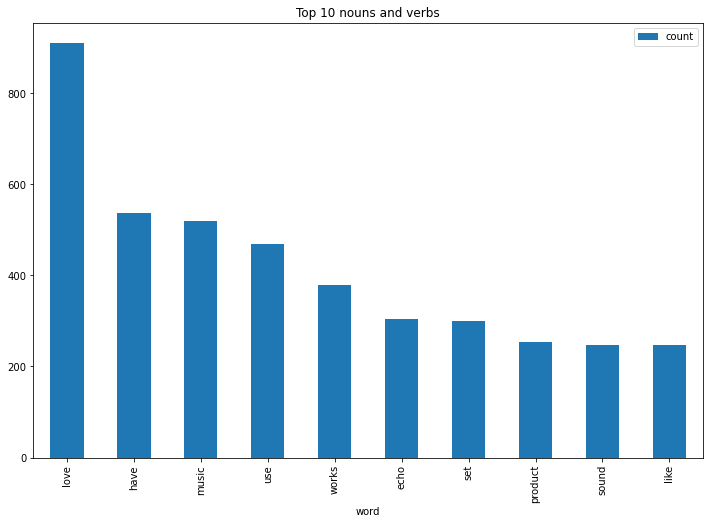

In [54]:
# Visualizing results (Barchart for top 10 nouns + verbs)
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs');

### Emotion mining

In [55]:
sentences=tokenize.sent_tokenize(' '.join(data))
sentences

['Love my Echo!',
 'Loved it!',
 'Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.',
 'I like being able to turn lights on and off while away from home.',
 'I have had a lot of fun with this thing.',
 'My 4 yr old learns about dinosaurs, i control the lights and play games like categories.',
 'Has nice sound when playing music as well.',
 'Music I received the echo as a gift.',
 'I needed another Bluetooth or something to play music easily accessible, and found this smart speaker.',
 'Can’t wait to see what else it can do.',
 'Without having a cellphone, I cannot use many of her features.',
 'I have an iPad but do not see that of any use.',
 'It IS a great alarm.',
 'If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.',
 'She does not seem to be very smartbon politics yet.',
 "I th

In [56]:
sent_df=pd.DataFrame(sentences,columns=['sentence'])
sent_df

sentence
0                                         Love my Echo!
1                                             Loved it!
2     Sometimes while playing a game, you can answer...
3     I like being able to turn lights on and off wh...
4              I have had a lot of fun with this thing.
...                                                 ...
6175  I named mine computer to get the feel... but i...
6176  Only complaint I have is that the sound qualit...
6177  I mostly use it for commands though, and I hav...
6178  I have a couple friends that have a dot and do...
6179                                               Good

[6180 rows x 1 columns]

In [57]:
# Emotion Lexicon - Affin
affin=pd.read_csv("D:\\Downloads\\Afinn.csv",encoding = 'latin1')
affin.head(20)

word  value
0      abandon     -2
1    abandoned     -2
2     abandons     -2
3     abducted     -2
4    abduction     -2
5   abductions     -2
6        abhor     -3
7     abhorred     -3
8    abhorrent     -3
9       abhors     -3
10   abilities      2
11     ability      2
12      aboard      1
13    absentee     -1
14   absentees     -1
15     absolve      2
16    absolved      2
17    absolves      2
18   absolving      2
19    absorbed      1

In [58]:
affin.shape

(2477, 2)

In [59]:
affinity_scores=affin.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [60]:
sentiment_lexicon=affinity_scores

def calculate_sentiment(text:str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [61]:
# manual testing
calculate_sentiment(text='love')

3

In [62]:
# Calculating sentiment value for each sentence
sent_df['sentiment_value']=sent_df['sentence'].apply(calculate_sentiment)
sent_df['sentiment_value']

0       3
1       3
2      -2
3       2
4       4
       ..
6175    5
6176    3
6177    0
6178    0
6179    3
Name: sentiment_value, Length: 6180, dtype: int64

In [63]:
# how many words are there in a sentence?
sent_df['word_count']=sent_df['sentence'].str.split().apply(len)
sent_df['word_count']

0        3
1        2
2       24
3       14
4       10
        ..
6175    21
6176    11
6177    22
6178    43
6179     1
Name: word_count, Length: 6180, dtype: int64

In [64]:
sent_df.sort_values(by='sentiment_value')

sentence  sentiment_value  \
2553  YES, you can manually swipe up on the alarm fa...              -10   
1203  Wish alarms could be set a bit further out but...               -8   
1763  Didn't come in packaging, but it was sealed up...               -6   
943   Was a little hard to get it to pare up with th...               -6   
452   Didn't come in packaging, but it was sealed up...               -6   
...                                                 ...              ...   
2677  What a wonderful little Alexa enabled gadget a...               18   
5619  Love this thing works great and kids love it t...               18   
1182  Love Alexa these are the best thing I have eve...               18   
852   LOVE Alexa Works perfect no wear and tear on t...               20   
4315  Alexa helps with more than just lights or musi...               21   

      word_count  
2553         111  
1203          34  
1763          17  
943           44  
452           17  
...          ...  
2677          21  
5619          43  
1182          55  
852           57  
4315         141  

[6180 rows x 3 columns]

In [65]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    6180.000000
mean        1.790129
std         2.646601
min       -10.000000
25%         0.000000
50%         1.000000
75%         3.000000
max        21.000000
Name: sentiment_value, dtype: float64

In [66]:
# negative sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0]

sentence  sentiment_value  \
2     Sometimes while playing a game, you can answer...               -2   
9                Can’t wait to see what else it can do.                0   
10    Without having a cellphone, I cannot use many ...                0   
11       I have an iPad but do not see that of any use.                0   
14    She does not seem to be very smartbon politics...                0   
...                                                 ...              ...   
6170  Listening to music, searching locations, check...                0   
6171                 There are many more task to learn.                0   
6172                           It was simple to set up.                0   
6177  I mostly use it for commands though, and I hav...                0   
6178  I have a couple friends that have a dot and do...                0   

      word_count  
2             24  
9              9  
10            11  
11            12  
14            10  
...          ...  
6170          10  
6171           7  
6172           6  
6177          22  
6178          43  

[2590 rows x 3 columns]

In [67]:
# positive sentiment score of the whole review
sent_df[sent_df['sentiment_value']>0]

sentence  sentiment_value  \
0                                         Love my Echo!                3   
1                                             Loved it!                3   
3     I like being able to turn lights on and off wh...                2   
4              I have had a lot of fun with this thing.                4   
5     My 4 yr old learns about dinosaurs, i control ...                2   
...                                                 ...              ...   
6173  I do love these things, i have them running my...                3   
6174  these things are well worth the value and they...                5   
6175  I named mine computer to get the feel... but i...                5   
6176  Only complaint I have is that the sound qualit...                3   
6179                                               Good                3   

      word_count  
0              3  
1              2  
3             14  
4             10  
5             16  
...          ...  
6173          31  
6174          31  
6175          21  
6176          11  
6179           1  

[3590 rows x 3 columns]

In [68]:
# Adding index cloumn
sent_df['index']=range(0,len(sent_df))
sent_df

sentence  sentiment_value  \
0                                         Love my Echo!                3   
1                                             Loved it!                3   
2     Sometimes while playing a game, you can answer...               -2   
3     I like being able to turn lights on and off wh...                2   
4              I have had a lot of fun with this thing.                4   
...                                                 ...              ...   
6175  I named mine computer to get the feel... but i...                5   
6176  Only complaint I have is that the sound qualit...                3   
6177  I mostly use it for commands though, and I hav...                0   
6178  I have a couple friends that have a dot and do...                0   
6179                                               Good                3   

      word_count  index  
0              3      0  
1              2      1  
2             24      2  
3             14      3  
4             10      4  
...          ...    ...  
6175          21   6175  
6176          11   6176  
6177          22   6177  
6178          43   6178  
6179           1   6179  

[6180 rows x 4 columns]

<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

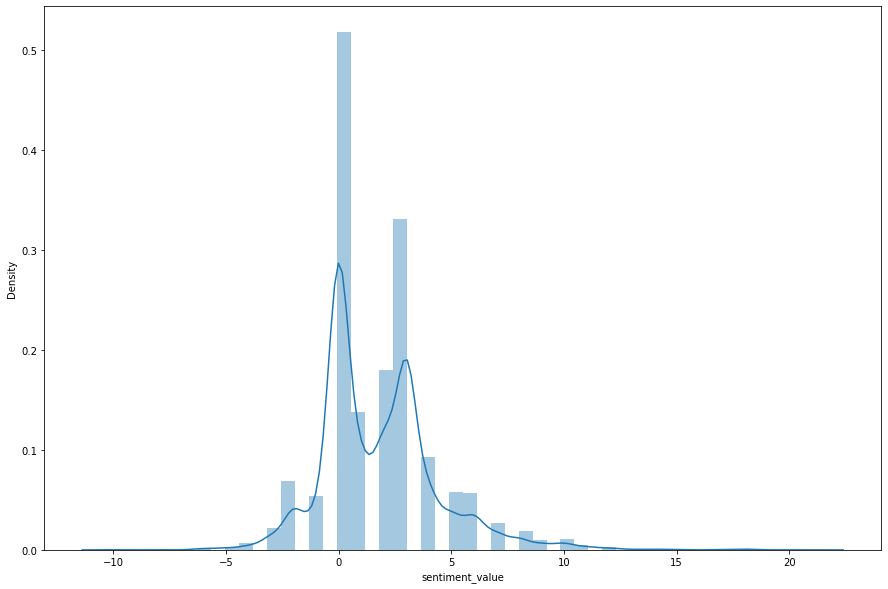

In [69]:
# Plotting the sentiment value for whole review
plt.figure(figsize=(15,10))
sns.distplot(sent_df['sentiment_value'])

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

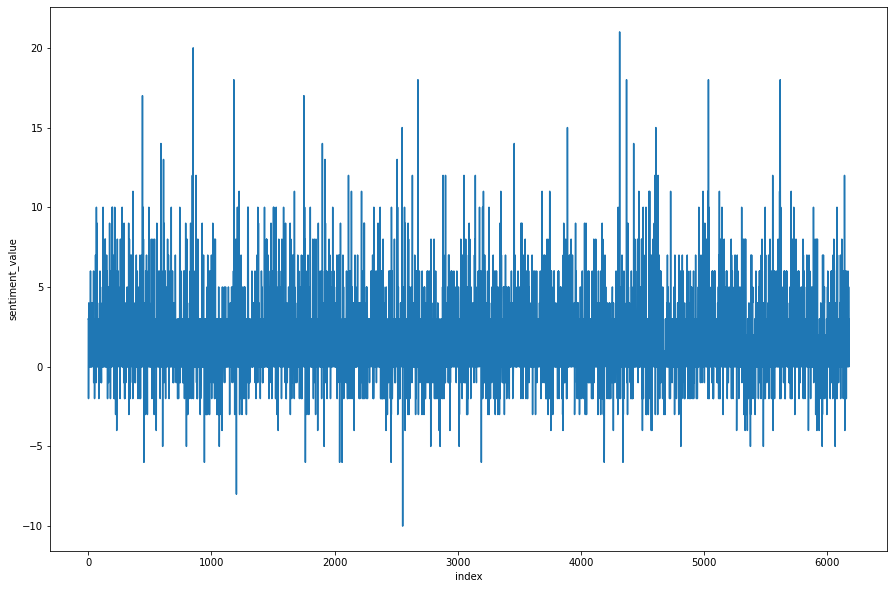

In [70]:
# Plotting the line plot for sentiment value of whole review
plt.figure(figsize=(15,10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

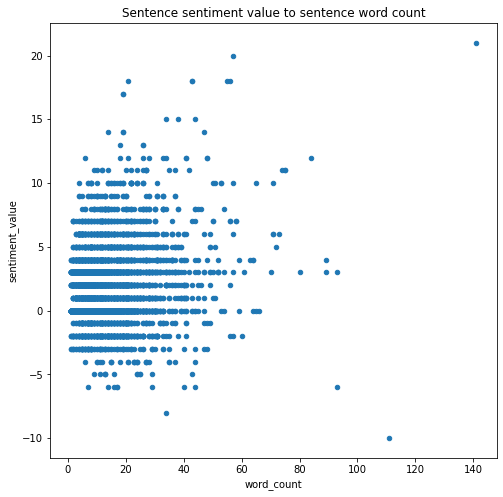

In [71]:
# Correlation analysis
sent_df.plot.scatter(x='word_count',y='sentiment_value',figsize=(8,8),title='Sentence sentiment value to sentence word count')